In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(threshold=sys.maxsize)
from scipy import stats
from scipy.stats import mannwhitneyu

# **BASIC**

## **Generales**

### **NCCT a FLAIR**

#### SSIM

In [10]:
none = [0.8742441050696927, 0.885135862744436, 0.87768344002703, 0.861396770540567, 0.8420852661796275, 0.879385049039446, 0.8873250839144629, 0.8841204748435405, 0.8557389932668599, 0.8554675431943779, 0.8844667331541103, 0.8511693581869436, 0.8612624548456737, 0.9088449280691302, 0.8765920781610645, 0.7736865177555748, 0.8764907848447794, 0.8710850237541378, 0.8889773853748482, 0.8812114749566954, 0.870793719562322, 0.8622369880793944, 0.8843644836110026, 0.8830137316737144, 0.8989982902628679, 0.8629243353384832, 0.8918633012530635, 0.8440601899887477, 0.8813969925937768, 0.8694047444955494, 0.8626894877415815, 0.8900056418910397, 0.8866267087871537, 0.8735194457118385, 0.849050387314585]
binary = [0.8810299976765771, 0.8888370181130932, 0.8839737724254301, 0.865981989581028, 0.8480092992534518, 0.8811919758450477, 0.8857622472403619, 0.8862559629183302, 0.8532272007437032, 0.858490192820479, 0.879950821009985, 0.8479540543081572, 0.8700542261717304, 0.9059315289266673, 0.8787044688601987, 0.7711018418683372, 0.874517048699885, 0.874797454693344, 0.892467795546168, 0.8876916535973862, 0.8756222214583813, 0.875083978400679, 0.8974951905347202, 0.8896046990876403, 0.8962104941205536, 0.8632694977466777, 0.8924642791301273, 0.859630900792077, 0.876738088687355, 0.8709931777714737, 0.8688916740099643, 0.8939666298233584, 0.8852910653644063, 0.8843981554537237, 0.8573730628993816]
dilated = [0.8805468648639666, 0.8908397694538478, 0.8820897027549589, 0.8589298471564892, 0.8449947139949161, 0.8840201921616486, 0.8891534046500269, 0.8764508562687282, 0.8581547101149571, 0.8565363284175055, 0.8784792211879682, 0.8399267850634856, 0.8656459087226185, 0.904812495894454, 0.8815212179561482, 0.7693222536752924, 0.8715321185453017, 0.8725158056629984, 0.8831456029733945, 0.8840825822858553, 0.8722149970018126, 0.8776289012624383, 0.9032406602069986, 0.890980580398519, 0.8964108286036798, 0.8707716439173571, 0.8942535027857605, 0.8650699604467338, 0.8690606876472745, 0.8730546988534335, 0.8700711451525829, 0.8940366794364346, 0.8863604163664507, 0.8782824972461265, 0.8567476951787221]

#### PSNR

In [ ]:
none = [21.824251315624984, 22.079426054197533, 22.745100528603714, 21.756438137449106, 21.85343298732787, 22.500911258767893, 23.069511372024266, 22.866121804233323, 22.161842053203763, 21.378988116051993, 22.387931947249903, 21.30851381819634, 22.89447018795999, 23.52757959131194, 22.273255230374154, 18.003285260408234, 22.423714568088865, 22.621582911476644, 23.244456551955004, 23.226132281369928, 21.581145256645723, 22.25826072965157, 23.20435896175087, 22.428912543748467, 23.4942753576637, 22.32185064972978, 22.918763800629222, 21.40352162952604, 22.89071295946229, 22.761233303347662, 21.65993356531397, 23.07185418411667, 22.10474978528925, 23.16528727310889, 21.38663794252496]
binary = [22.47283837316814, 22.247624377665232, 22.763255140195845, 21.889258095406507, 21.96371612317869, 22.6359126221338, 23.22499439378167, 23.095157952486037, 22.296912182928722, 21.768566309136833, 22.54548320305695, 21.191831191991795, 23.40162462766576, 23.507644068205835, 22.447545390682663, 18.106509019433194, 22.499158256179253, 22.606429147744972, 23.02637301041174, 23.355685597576876, 21.912055814191476, 22.794043070446598, 23.513508136561356, 22.852844328051333, 23.55669494226575, 22.464454910745463, 23.15416651439702, 21.74100073742389, 23.01432027574101, 22.963377746620303, 21.81757409134253, 23.348707872120386, 22.206913663170745, 23.489533252035415, 21.54478357947913]
dilated = [22.1064388391364, 22.44519009187708, 22.909280833858215, 21.54078146537451, 21.771527104655256, 22.838212383237714, 23.26489841266931, 22.793971476953775, 22.358492116172307, 21.5464437702233, 22.124872476533945, 20.995242617889076, 23.404182482928665, 23.20599985628554, 22.588357204649295, 17.931121432164677, 22.12207986134075, 22.734814981768707, 22.82202778987001, 23.373237258049414, 21.593491141643778, 22.90864316621912, 23.852935268182858, 22.817781030545845, 23.512840102533143, 22.809679125484898, 23.15450312951687, 22.098351109010647, 22.846926901741405, 22.90966400415797, 21.865701274239782, 23.320612242048885, 22.06171293534915, 23.387843688594067, 21.518069439472242]

#### MS-SSIM

In [ ]:
none = [0.883821427822113, 0.8729862570762634, 0.8766608834266663, 0.8420519232749939, 0.8338289856910706, 0.8779467940330505, 0.892297625541687, 0.8797008395195007, 0.8743534684181213, 0.8585430979728699, 0.8782266974449158, 0.8476995825767517, 0.8819825053215027, 0.8815722465515137, 0.838436484336853, 0.7097358107566833, 0.8600502014160156, 0.8599959015846252, 0.8952902555465698, 0.8753484487533569, 0.8819169402122498, 0.8766819834709167, 0.8802048563957214, 0.8707291483879089, 0.8870077729225159, 0.8594897389411926, 0.8843838572502136, 0.853829026222229, 0.8624102473258972, 0.8719988465309143, 0.8457667231559753, 0.887885332107544, 0.8610625863075256, 0.8801693320274353, 0.8440554141998291]
binary = [0.8982069492340088, 0.8877480030059814, 0.8701571822166443, 0.8432089686393738, 0.8438720107078552, 0.8830859065055847, 0.8939303159713745, 0.8873722553253174, 0.8772605657577515, 0.8744745254516602, 0.8803065419197083, 0.8496538996696472, 0.8913032412528992, 0.8795951008796692, 0.8529176712036133, 0.7079530358314514, 0.8629728555679321, 0.8563422560691833, 0.8907492756843567, 0.8809972405433655, 0.8896060585975647, 0.8855111002922058, 0.8866004943847656, 0.8750484585762024, 0.8892555236816406, 0.8633012771606445, 0.8890793919563293, 0.8671203851699829, 0.8670907616615295, 0.8730615377426147, 0.8492531180381775, 0.8945426940917969, 0.8682159781455994, 0.8823356032371521, 0.8441553711891174]
dilated = [0.8899092674255371, 0.8917357921600342, 0.8803175687789917, 0.8466606140136719, 0.8413511514663696, 0.884052038192749, 0.8943312764167786, 0.8818438053131104, 0.883018434047699, 0.8715329766273499, 0.88351970911026, 0.8483529686927795, 0.8903241157531738, 0.8841575980186462, 0.8624801635742188, 0.7143896818161011, 0.856985330581665, 0.8629526495933533, 0.8937011361122131, 0.8834924697875977, 0.8887143135070801, 0.8882945775985718, 0.8848642110824585, 0.8847119212150574, 0.8881630897521973, 0.8765794634819031, 0.8908353447914124, 0.8719221949577332, 0.8687521815299988, 0.8763319253921509, 0.8614915013313293, 0.8975307941436768, 0.8656138777732849, 0.8891873955726624, 0.8623451590538025]

#### LPIPS

In [ ]:
none = [0.198945816892844, 0.17263177673642835, 0.1879195201282318, 0.20370141913493475, 0.2143374910721412, 0.19092128276824952, 0.23167746227521163, 0.21371379838540003, 0.20332899861610854, 0.20345163562645516, 0.1945185007957312, 0.22283624671399593, 0.2008409984409809, 0.19387574321948564, 0.22040198399470404, 0.20633099026357135, 0.18002314106203043, 0.1763126888871193, 0.2167777785888085, 0.2330375978579888, 0.1990137261648973, 0.20884873500714699, 0.21221855406959853, 0.22799852620000424, 0.23564475087019113, 0.20130917730812842, 0.1938531364624699, 0.20217580620486003, 0.21175158740236208, 0.1995404654970536, 0.1996760986124476, 0.22302337363362312, 0.21475028705138427, 0.24315843420724073, 0.17070668033109263]
binary = [0.20150606448833758, 0.17406740536292395, 0.18643850460648537, 0.20304292036841312, 0.21584732529635614, 0.18627831029395261, 0.23054238609396493, 0.21396843917094743, 0.2019287021114276, 0.20314424143483242, 0.19528879741063485, 0.22191825384895006, 0.20021157138622725, 0.19239707405750567, 0.2214721584549317, 0.2060989549693962, 0.18055763324865928, 0.18140989107390246, 0.21702220290899277, 0.2323517991373172, 0.19797062408179045, 0.2093109559888641, 0.21119662389780083, 0.22676167604715927, 0.23669491450373942, 0.20118712046398565, 0.19537058472633362, 0.20196358401041764, 0.2107078699538341, 0.19797965368399253, 0.20039273208628097, 0.22292168935139975, 0.21603125763627198, 0.24091224682827792, 0.17215103512773147]
dilated = [0.20090079937989896, 0.1712334887124598, 0.18652576193786585, 0.20229524668926993, 0.21538057694068322, 0.18679935888697705, 0.22935648377125079, 0.2107789906171652, 0.200424946558017, 0.2032216206813852, 0.19352618060432947, 0.22067776074012121, 0.1989890652207228, 0.19157148152589798, 0.22084906009527352, 0.20377786364406347, 0.17888765294964498, 0.17923759731153646, 0.21664919589574522, 0.23105467941898566, 0.19724516353259483, 0.20973635340730348, 0.20789648840824762, 0.22652686160543692, 0.23452547565102577, 0.19865841447160795, 0.19412584199259678, 0.20418465939851907, 0.2094943322814428, 0.19665746620068184, 0.19971407887836298, 0.22292792362471422, 0.2163582782332714, 0.2408868558704853, 0.16944779871174923]


### **DWI a FLAIR**

#### SSIM

In [10]:
none = [0.9121047591877708, 0.9131773431979966, 0.9024257489046801, 0.9010977133419726, 0.8698825086363774, 0.9071221663643312, 0.9178477977630792, 0.893779942838343, 0.8667033114012896, 0.9051256299143051, 0.9075133202592881, 0.8512875487913012, 0.8928581630288843, 0.9219685217922028, 0.908117257638276, 0.7841053420799536, 0.8998588599439654, 0.9031313521382839, 0.9192258272360524, 0.8797981744355656, 0.9057669529293917, 0.9046927928686443, 0.8825173637369566, 0.9127737976814326, 0.9133153823296931, 0.8873019825741266, 0.9074844321398065, 0.8848751155326369, 0.8893135303071317, 0.8943003128468733, 0.8900667588273172, 0.8948346220136506, 0.9039007824867213, 0.8911270506793652, 0.8996871014904364]
binary = [0.9216633605620353, 0.9254590307902839, 0.9016792940379016, 0.9014909595944051, 0.8751920075745918, 0.914764065042229, 0.9192059046606457, 0.8947094637989738, 0.8753312985398827, 0.9089965738104431, 0.9135333760683686, 0.8527790481477918, 0.9110574274596384, 0.926173518606221, 0.9148234018140403, 0.7922789382116827, 0.904218533402886, 0.9041197930145968, 0.92842760423332, 0.8905055229138773, 0.9210162359086838, 0.9185583718252791, 0.8986693565102934, 0.919262552361378, 0.9247938542626857, 0.8849765437023873, 0.9082483261292364, 0.9009910712537251, 0.8884793416898972, 0.8939264441914225, 0.9022900570105171, 0.9102955237400197, 0.9165710875740144, 0.8996730671817865, 0.9028430468822953]
dilated = [0.9220287519594719, 0.9178380280096892, 0.8977309277755171, 0.8975616716241546, 0.8654149582958051, 0.9080783825223858, 0.9047092628062187, 0.8834881081541618, 0.8793781194778183, 0.9018475299811458, 0.9112155944411143, 0.84362658352203, 0.9001090683668528, 0.9190332665207182, 0.9041110757199429, 0.785056866501988, 0.9035995845387583, 0.9051774129644667, 0.9223941341242052, 0.8740958797101133, 0.9109827921086198, 0.916094842846715, 0.8875651023656057, 0.9178930929550465, 0.9238097025164439, 0.8904613528797565, 0.9110014205741737, 0.8951124092483258, 0.895562871112084, 0.889124042932542, 0.8980532570810515, 0.9021975781639976, 0.9072744463984996, 0.8952499981317755, 0.9035394059818727]

#### PSNR

In [ ]:
none = [24.38219075478587, 24.137842604582495, 24.28421680401888, 23.13005330413427, 21.906515144341505, 23.78759712915386, 24.939875580783863, 23.844887399909005, 23.37594668431916, 23.600250419210397, 23.710599597289406, 21.95848450286381, 23.977373703892056, 24.16664721576264, 24.218270856430845, 19.00678534510444, 24.091782591621257, 22.99369852934863, 24.443551672603352, 23.761016754017398, 23.48471853818889, 24.0605573408795, 23.407897170075437, 24.516184184134374, 25.10742503384209, 23.46897313855702, 23.961691173529616, 22.30321676695194, 24.022428600385282, 23.891704546628, 23.25332988785486, 24.165241066498517, 23.50803030629772, 24.038095055302804, 23.869966579118973]
binary = [24.795064983178925, 24.641223844282756, 24.433627358543575, 23.750848877568075, 22.302265183437417, 24.145970716767696, 24.965174776625723, 23.519003954805516, 23.68001276186037, 23.59178670872646, 23.984416788079322, 22.338667498991235, 25.121119204975997, 24.600159965923233, 24.85716288493571, 19.16641792319277, 24.29182946531684, 23.112266360332697, 25.630085404889332, 24.011858561275798, 24.16640315585031, 24.916892977854708, 24.173011158205217, 24.865904840993927, 25.68752467550782, 23.390037029898153, 23.762359728593005, 23.274504254561744, 24.408004926876387, 23.302513778028345, 23.93885597922199, 24.873854127329, 24.148815615692072, 24.368753483456555, 23.898024408037806]
dilated = [24.856844188430422, 24.625969187243264, 24.539050562690598, 23.360002271820733, 22.014063274327917, 23.773203009330754, 24.35287128211826, 23.243439624554284, 23.920967761492772, 23.491704624172232, 23.92920895018717, 21.87847105233699, 24.783214478560545, 24.15960762651658, 24.20924680516865, 18.965056461204583, 24.210788819469244, 23.301869121685236, 25.018531471082884, 23.550433404826467, 24.147030069791192, 24.5069040781119, 23.643895931578584, 24.791307149082122, 25.682187812047825, 23.636038568610754, 23.981113333828482, 22.912181415891986, 24.465821189480526, 23.396304281116805, 23.705965503987013, 24.76993735921219, 23.800828437722625, 24.199884919028317, 23.837761375940545]

#### MS-SSIM

In [ ]:
none = [0.9245071411132812, 0.9122257232666016, 0.9054944515228271, 0.8768976926803589, 0.8712037801742554, 0.9090960621833801, 0.932307243347168, 0.9061484932899475, 0.8989078402519226, 0.9154900908470154, 0.9098157286643982, 0.8752484917640686, 0.921627938747406, 0.9157763123512268, 0.9007807374000549, 0.7348489165306091, 0.9008102416992188, 0.897472083568573, 0.898186445236206, 0.8870247602462769, 0.9202052354812622, 0.9119611978530884, 0.883867621421814, 0.9048534035682678, 0.9215602278709412, 0.8896902203559875, 0.9116639494895935, 0.8842556476593018, 0.9020990133285522, 0.9070589542388916, 0.9019967913627625, 0.8953366875648499, 0.8858029842376709, 0.9008135199546814, 0.8922119736671448]
binary = [0.9322057366371155, 0.924772322177887, 0.907241940498352, 0.9041181802749634, 0.8842897415161133, 0.9073777794837952, 0.9308844208717346, 0.9088442325592041, 0.9022325277328491, 0.9212236404418945, 0.9074132442474365, 0.8843556642532349, 0.9289584159851074, 0.9266447424888611, 0.9110745191574097, 0.7461211681365967, 0.9044176936149597, 0.8920329809188843, 0.9199110269546509, 0.8918482661247253, 0.9297194480895996, 0.922890305519104, 0.8974525928497314, 0.9097313284873962, 0.9331333041191101, 0.8972683548927307, 0.9070962071418762, 0.89360511302948, 0.9089359641075134, 0.8980206251144409, 0.9126124382019043, 0.9064760804176331, 0.8996462225914001, 0.9154743552207947, 0.890321671962738]
dilated = [0.924548864364624, 0.9139983654022217, 0.9087444543838501, 0.8890721201896667, 0.877110481262207, 0.9019424915313721, 0.9257348775863647, 0.9052901268005371, 0.8963783979415894, 0.9151292443275452, 0.9077465534210205, 0.8732888102531433, 0.9282550811767578, 0.9178169369697571, 0.8922255635261536, 0.7476866245269775, 0.9005430936813354, 0.9115081429481506, 0.9136657118797302, 0.8870988488197327, 0.9216263890266418, 0.9175694584846497, 0.8915024995803833, 0.906536877155304, 0.9305706024169922, 0.8973061442375183, 0.9053472876548767, 0.8874982595443726, 0.9122644066810608, 0.9004433751106262, 0.9026268124580383, 0.9046120047569275, 0.8870704174041748, 0.9058791399002075, 0.8899269700050354]

#### LPIPS

In [ ]:
none = [0.19878464220808104, 0.16792635650684437, 0.18320631579710886, 0.20496536046266556, 0.2144413826843867, 0.18836402803659438, 0.232767950456876, 0.213649455171365, 0.2003944370035942, 0.2009216664979855, 0.19067711755633354, 0.22105855805178484, 0.19427413321458376, 0.19257033043182814, 0.21778223319695547, 0.20973426289856434, 0.17624142479438049, 0.1779186037989954, 0.21222502279740113, 0.2317776935031781, 0.20154246812065443, 0.2094370825216174, 0.21016932542746267, 0.23006058905435645, 0.2363858030965695, 0.19800967909395695, 0.19266152599205574, 0.20186630378548914, 0.20611417623093495, 0.19225360453128815, 0.20376807947953543, 0.22128398095568022, 0.21198725299193308, 0.24182701390236616, 0.16896754130721092]
binary = [0.1993808041398342, 0.16762634677191576, 0.18424290590561354, 0.2023194469511509, 0.21497117255169612, 0.18231901029745737, 0.23189212783024862, 0.21543720593819252, 0.20330338237377313, 0.20250206223378578, 0.19282505403344447, 0.2184505257755518, 0.19271009415388107, 0.19425273228150147, 0.2171881032677797, 0.2091664335069557, 0.17769329163890618, 0.1802300295482079, 0.21358395625765508, 0.23293434370022553, 0.19952258514240384, 0.20817856894185147, 0.21101805847138166, 0.23116403235041577, 0.2357680910768417, 0.19589104904578283, 0.1922085884337624, 0.20125238239192045, 0.20630612310308677, 0.19361264889056867, 0.20451674362023672, 0.22062571129451194, 0.21171228129130143, 0.23947443875173727, 0.1679192457634669]
dilated = [0.20189421967818186, 0.16980291592578092, 0.18553394795610353, 0.20582435528437296, 0.21686599468095943, 0.18526994499067465, 0.23075373298846757, 0.21573996801788992, 0.20548153296113014, 0.20557891204953194, 0.19421499222517014, 0.21957542560994625, 0.19456652122048232, 0.1948549455175033, 0.22132504387543753, 0.21142026285330454, 0.17885602537829143, 0.1806004267806808, 0.21544010736621344, 0.23272481675331408, 0.20169514184817672, 0.20854758253941932, 0.2101031979545951, 0.23220048520876013, 0.23918030668909734, 0.19873898333081833, 0.19323954824358225, 0.20358229543154055, 0.20801711082458496, 0.1945894996707256, 0.20430082455277443, 0.2222261301552256, 0.21453095628665045, 0.2407366925229629, 0.1695598322325028]

### **ADC a FLAIR**

#### SSIM

In [10]:
none = [0.8888211617022754, 0.8855457028685548, 0.8825589160455115, 0.8894465022133581, 0.8816036968475107, 0.8874688149347498, 0.8974606931287542, 0.8949126662431441, 0.8612215390733439, 0.8780518755736881, 0.894358035835639, 0.8559123319012468, 0.8831124600234496, 0.9087411185607256, 0.887210387276133, 0.7858400040467607, 0.8928494538969004, 0.8932192290540293, 0.9008396113915182, 0.882730427589358, 0.890600375166644, 0.8866508087576531, 0.8901081545444771, 0.9002767027905115, 0.9007806321433265, 0.8625617952453981, 0.899613866170396, 0.876049478874385, 0.8874574467936507, 0.8821341906550361, 0.8684513161218615, 0.8909533849869855, 0.8986532519065823, 0.8806185480995532, 0.9039255465012446]
binary = [0.8946628979048622, 0.8970019034862112, 0.8873112882936872, 0.8882342271016178, 0.902036504029962, 0.8979195994099718, 0.9001750565046522, 0.9010234792373493, 0.8607924204912685, 0.8834952411206152, 0.8962513987187887, 0.864058243815023, 0.8884401644930011, 0.9125228120112545, 0.8999149965263001, 0.7839218858738367, 0.8966068983784296, 0.8987209060454121, 0.9046025878711413, 0.8924243894558035, 0.8940220531406662, 0.8998259039642503, 0.9009545506745842, 0.9026445432889002, 0.9094600255123727, 0.871609858840002, 0.9041307140928676, 0.8827486841811198, 0.8773151381604366, 0.8875468741968437, 0.8850464030758854, 0.8983317233853407, 0.8984255720041646, 0.8867608235595081, 0.9069737912508978]
dilated = [0.8934097426844079, 0.8935079789159398, 0.8889242113781203, 0.8943236875926052, 0.9004847718188058, 0.8969787453489202, 0.8997409996279526, 0.8971800982647595, 0.863507102891591, 0.8858631752265191, 0.8984071145321503, 0.8611048719085231, 0.8811271873432722, 0.9154391257469804, 0.8999689429979346, 0.7816422787744014, 0.8959424176123884, 0.898653184507443, 0.9111123848788721, 0.889416572874229, 0.8927579640110139, 0.8990489593260104, 0.9011893684903007, 0.9005858519690011, 0.9085132917741872, 0.8802534942317896, 0.9074243965000812, 0.8869054215539399, 0.8879638813845403, 0.8844039344918989, 0.8884820149070662, 0.8937566742910859, 0.9017811551633179, 0.8876484075331733, 0.9066690336087377]

#### PSNR

In [ ]:
none = [23.044942455084833, 23.19534495709402, 23.186783080183176, 23.67958284034074, 24.29492946747, 23.025893349359148, 24.009021828190157, 23.61869302566226, 22.57779456139934, 22.309284593718385, 23.25960318025658, 22.281071935684984, 23.55360266457478, 23.75693385092778, 23.140560450553657, 19.128837218530037, 23.291406970842324, 22.90759705341962, 24.266154777072483, 24.052064119238352, 22.030843993413196, 23.692402789784914, 23.895022200439605, 23.41312017276415, 23.98191276789932, 22.548458110761885, 23.489650837143316, 23.289338648060365, 23.121703482111336, 23.133440678241758, 22.340380314583562, 24.15475632505725, 23.552690979960033, 23.35536257824979, 24.035250678873318]
binary = [23.393421905162267, 23.66617664583162, 23.490056875344983, 23.75614566466187, 25.563838123400764, 23.453716397995585, 24.23227443796165, 23.936071444226638, 23.136178536100967, 22.773970355310436, 23.354508730740577, 22.727831188407414, 24.340764225646822, 24.178512393482137, 24.14501238474983, 19.142450434916395, 23.710328451936405, 23.388241523322296, 24.71028476836402, 24.27886605792643, 21.72065211001591, 24.445301635011205, 24.259795769839805, 23.411561145439425, 24.72612546418018, 23.230713075344056, 23.57347162553178, 23.436745226220754, 23.106097756785378, 23.634999030964856, 23.097660688691512, 24.362155531307096, 23.640304053216695, 23.808170488665027, 24.60947897223715]
dilated = [23.306530821982747, 23.47520326257844, 23.686900417765383, 24.01241028103645, 25.609630187482182, 23.487783545719463, 24.2066222833008, 23.95649100778309, 22.90755917609992, 22.90837533312017, 23.48912263549281, 22.97238211916536, 24.225842507115793, 24.243683316924887, 23.828090149452365, 18.780302425018725, 23.61119095682885, 23.41344998224601, 24.781009471411338, 24.259910190296054, 21.564480202419652, 24.51693970472819, 24.378781785367533, 23.298794141181894, 24.481727445671346, 23.15900495030587, 23.87285251407984, 23.86559095973847, 23.397228901801675, 23.580935979446792, 23.136864288545592, 24.3330651063555, 23.803354056521826, 23.914230471751146, 24.542220882794137]

#### MS-SSIM

In [ ]:
none = [0.9092128276824951, 0.9071664810180664, 0.886784017086029, 0.8773043751716614, 0.8893765807151794, 0.8804234862327576, 0.9033473134040833, 0.9066951274871826, 0.877918004989624, 0.888338029384613, 0.891796350479126, 0.8536155223846436, 0.8954151272773743, 0.9014490246772766, 0.8887180685997009, 0.7191351652145386, 0.8820846080780029, 0.8911107778549194, 0.9047468900680542, 0.8891661167144775, 0.8891032934188843, 0.8973519206047058, 0.8872356414794922, 0.8861403465270996, 0.9032588005065918, 0.8669283986091614, 0.9001819491386414, 0.8759759664535522, 0.8691661357879639, 0.8835362195968628, 0.8776051998138428, 0.8937488198280334, 0.8914552927017212, 0.8771448731422424, 0.9054974913597107]
binary = [0.9143778681755066, 0.9128272533416748, 0.8937431573867798, 0.8800147771835327, 0.907180666923523, 0.8883459568023682, 0.9090604782104492, 0.9110512733459473, 0.8857746124267578, 0.9012482762336731, 0.8944460153579712, 0.8615398406982422, 0.910658597946167, 0.9104301333427429, 0.9022398591041565, 0.7193018794059753, 0.8902015089988708, 0.8930848836898804, 0.9056008458137512, 0.8933477401733398, 0.8947351574897766, 0.9074280261993408, 0.895143449306488, 0.8871703147888184, 0.9170826077461243, 0.8811445236206055, 0.9035462737083435, 0.8747731447219849, 0.8698977828025818, 0.8955892324447632, 0.8883898854255676, 0.8956015110015869, 0.8913044333457947, 0.881578803062439, 0.9129106402397156]
dilated = [0.914426863193512, 0.9119388461112976, 0.8954891562461853, 0.886284589767456, 0.9076271057128906, 0.8921089768409729, 0.9080252051353455, 0.9123234748840332, 0.8782177567481995, 0.9034904837608337, 0.8978529572486877, 0.8634622097015381, 0.9106672406196594, 0.9092000126838684, 0.899882972240448, 0.7179957628250122, 0.88792484998703, 0.8962622284889221, 0.9091975688934326, 0.8949581980705261, 0.888727605342865, 0.9109063744544983, 0.8971419930458069, 0.8883374333381653, 0.9161107540130615, 0.8771694302558899, 0.9062206745147705, 0.8862975239753723, 0.8765931725502014, 0.8959531188011169, 0.890820324420929, 0.8978704214096069, 0.8967477083206177, 0.8868744373321533, 0.9123468399047852]

#### LPIPS

In [ ]:
none = [0.19611542041485125, 0.17268483495960632, 0.18772333989349696, 0.20408263088514408, 0.21352161538715547, 0.18982795536518096, 0.23239623927153075, 0.2154236169388661, 0.20209655652825648, 0.20375862438231707, 0.19476151666962183, 0.22379974089562893, 0.19716685523207372, 0.19315370286886507, 0.22129042217364678, 0.20891337360565862, 0.17729014659730288, 0.18596858779589334, 0.21806340478360653, 0.23109584187085813, 0.20099145888040462, 0.2084608031436801, 0.21421220091482004, 0.22430868641189908, 0.23558789606277758, 0.20004604799816242, 0.19467447698116302, 0.20212974141423518, 0.20634810425914252, 0.19686907443862695, 0.20085000277807316, 0.22116123139858246, 0.2108615536529284, 0.2431156470750769, 0.16961416057669199]
binary = [0.19803348728097403, 0.17005009235193333, 0.18681739342327303, 0.2044267182548841, 0.21526273827140147, 0.18582471491148075, 0.23109571950939986, 0.21492362681489724, 0.2016842565857447, 0.2046877242003878, 0.1933009813611324, 0.22389648047586283, 0.19835277675436094, 0.19331247646075028, 0.22180808134950125, 0.20787583322574696, 0.17930464618481123, 0.1858440750899414, 0.21707052737474442, 0.2334592522910008, 0.20030722208321095, 0.20908649048457542, 0.2113309862713019, 0.22670794764290686, 0.23616181084742913, 0.20032579093598402, 0.19558122319479784, 0.20296921939230883, 0.20794619992375374, 0.1974757803747287, 0.20335282726834217, 0.2231529519582788, 0.209611214697361, 0.24315436525891224, 0.1708400005904528]
dilated = [0.19784035447698373, 0.1705865260834495, 0.1852979654302964, 0.20366398710757494, 0.2149330499367072, 0.1865343740209937, 0.22927065709462532, 0.21459796365637046, 0.20139046099323493, 0.2037856218715509, 0.19167730298179847, 0.22323243164767823, 0.19597474972789103, 0.19361807549229035, 0.21962309657381132, 0.20630201495562991, 0.17808959661768034, 0.18455321652193865, 0.21747803057615572, 0.23221941120349443, 0.20033630449324846, 0.20805420509229103, 0.20980379187191525, 0.22914446501628213, 0.2356615997850895, 0.20119393000809047, 0.19447890498364964, 0.2024126104437388, 0.20900878568108266, 0.19789781564703354, 0.2015714986870686, 0.22162077327569327, 0.20921714288684037, 0.23947756178677082, 0.17060385415187249]

### **NCCT a ADC**

#### SSIM

In [10]:
none = [0.8591210441651903, 0.8409325734000435, 0.8509629485842523, 0.8280095634313162, 0.8434685473145946, 0.8036444893485747, 0.8558797167436865, 0.8614719921943881, 0.8403590651798961, 0.847823690933225, 0.8720554350155469, 0.837917235350926, 0.8667776630262655, 0.8430529318532523, 0.828721479850012, 0.85940792574304, 0.8464674349062122, 0.8490627120650625, 0.8550235099935429, 0.8498751466526946, 0.8694129219698077, 0.8417389443426225, 0.8407411767381506, 0.8549725009632623, 0.8398784493117027, 0.8471790688873775, 0.8494792041859295, 0.8148217707277087, 0.8578586694340397, 0.8492920173216238, 0.8417052766071383, 0.816846271006135, 0.827230132920496, 0.8397292170493187, 0.8385493668610678, 0.8603106255393993, 0.8312275822235385, 0.7975648882505099]
binary = [0.8901857528383958, 0.870467635768984, 0.8755161863853007, 0.8509604937747086, 0.8588234253881172, 0.8194561081356352, 0.8879294259778276, 0.8907354765375491, 0.8583566405290148, 0.8699679841644791, 0.9049354539005915, 0.8658295564263041, 0.8904314652747027, 0.8709389632455315, 0.8515564522217607, 0.8853536707423673, 0.8715268011846121, 0.8757800710467167, 0.8751404444758706, 0.8703450517631665, 0.8901329134718302, 0.8628835539400347, 0.8641550947647683, 0.8851715554601032, 0.8685082565876965, 0.8765144028337414, 0.8710247990855575, 0.8281971176588334, 0.8840572154771752, 0.870901232216403, 0.8557781166745462, 0.8336630607186956, 0.8493103628628863, 0.8616177754010178, 0.8630674630457124, 0.8938737918809183, 0.8515664607772399, 0.813165756853816]
dilated = [0.8853384948509112, 0.8718838483895167, 0.8795037741635431, 0.851133756959653, 0.8638299781028703, 0.8242208571086052, 0.8878947958978582, 0.8939515777080569, 0.8595378417621048, 0.8670330646428683, 0.9058426302419788, 0.865430846537596, 0.8918223036219519, 0.8737423281872354, 0.8553680708661756, 0.8886710708380433, 0.8760921071156751, 0.877916479463659, 0.8814117428008414, 0.8701278442621585, 0.8925282536633603, 0.8665371534577949, 0.8653686817003243, 0.8862156116172147, 0.871726814953427, 0.8784130963660541, 0.8755739745222463, 0.8351021139508594, 0.8850901843103135, 0.8723430876757317, 0.8609605486573577, 0.8335784656226732, 0.849519571885306, 0.8649474739120245, 0.8623292905173147, 0.8928691576402054, 0.8548149757969856, 0.8165987992140409]

#### PSNR

In [ ]:
none = [22.271722029815663, 22.404617592641078, 20.73419146967504, 20.902878844992365, 21.08348888539979, 20.689801890696174, 21.112749713733233, 21.637379676927665, 21.836913956999062, 21.956645435353952, 21.794548026947815, 20.884018681896404, 21.199682186649554, 21.660330648082358, 23.075725988456487, 20.946706128669067, 22.138377658048185, 22.10648833549031, 21.644662279711486, 22.61494003848837, 22.33710167363689, 22.767313475182696, 21.710107660708506, 21.31010962083281, 21.984271649850786, 21.83023140411812, 21.307056744047365, 20.567274688388814, 21.68673886913102, 21.084455096326145, 22.842341080983463, 20.304947088520066, 19.907179487078707, 22.442196764416742, 20.733956407465023, 22.09321168648124, 22.616222994715546, 20.434126887274648]
binary = [23.63184282289762, 23.559031092196285, 21.652973633789014, 21.86845109296824, 21.846988021153066, 21.367660233827138, 22.3358131253697, 23.034914871374077, 22.77335572968714, 23.038337357125084, 23.35888253629716, 22.019000211106793, 22.410035710815038, 22.785904541060926, 24.52692296563679, 22.12657820736212, 23.384905436639293, 23.432998901293022, 22.53750105110887, 23.93453906084884, 23.91481587753459, 23.970039918811313, 22.854346213692548, 22.848748509689884, 23.22629611025022, 23.107755475866497, 22.380134414205695, 21.031131406895867, 22.983545182566615, 22.031665320524976, 23.462010640469842, 21.02790707030728, 20.43237555132336, 23.741313019554973, 21.519241109438298, 23.945102385467777, 23.963939717427102, 21.3664663823582]
dilated = [23.480427600240894, 23.832762169210817, 21.895233551364207, 21.962620644816518, 22.110891715809665, 21.496792769821308, 22.512405554090392, 23.43556698823201, 23.086465244726075, 22.984689349000917, 23.50922190309661, 22.05433030852906, 22.609953992817438, 23.112864130125175, 24.798714762257667, 22.279584894854313, 23.64866588235467, 23.594646378075485, 22.896440930401685, 24.061483878340773, 24.15152432822544, 24.220269574271605, 23.095254604596743, 22.937759446473954, 23.32104010912962, 23.421669762087454, 22.70125288487142, 21.428094243840707, 23.083274199229265, 22.234426019912267, 23.803644530267785, 21.07364563945162, 20.5470333265735, 23.874243488291, 21.60560933118412, 24.047837408023266, 24.107716872729, 21.423689696224642]

#### MS-SSIM

In [ ]:
none = [0.8636925220489502, 0.8226667046546936, 0.8572672605514526, 0.8181426525115967, 0.8473902344703674, 0.7876523733139038, 0.8583884835243225, 0.8535651564598083, 0.8381564021110535, 0.8393480181694031, 0.8595011830329895, 0.8360349535942078, 0.8638845682144165, 0.8421837687492371, 0.8373551368713379, 0.8437325358390808, 0.84839928150177, 0.8518747091293335, 0.8478942513465881, 0.8507893681526184, 0.8550080060958862, 0.8400275707244873, 0.823094367980957, 0.8520116209983826, 0.8468459844589233, 0.8371371626853943, 0.8365079760551453, 0.8054776191711426, 0.8480114340782166, 0.8498378992080688, 0.8499599099159241, 0.8052247166633606, 0.7922338843345642, 0.8358050584793091, 0.8497965335845947, 0.8590573072433472, 0.8451464772224426, 0.7517977356910706]
binary = [0.9049404263496399, 0.8685526847839355, 0.8942746520042419, 0.8549456596374512, 0.8722214102745056, 0.82052081823349, 0.9005733132362366, 0.8944098949432373, 0.87070631980896, 0.8825527429580688, 0.9090997576713562, 0.8707579970359802, 0.9012301564216614, 0.8855164051055908, 0.8731119632720947, 0.8908751606941223, 0.8818902373313904, 0.8882556557655334, 0.8790335059165955, 0.8879022002220154, 0.894166886806488, 0.8758885860443115, 0.8617556095123291, 0.903698205947876, 0.8952322602272034, 0.8759198784828186, 0.8712838292121887, 0.8344447612762451, 0.8917252421379089, 0.8797511458396912, 0.8809611797332764, 0.8443686962127686, 0.8275986313819885, 0.878146767616272, 0.8783912658691406, 0.907340943813324, 0.8831812143325806, 0.7881579399108887]
dilated = [0.8964491486549377, 0.869906485080719, 0.8961272835731506, 0.8578503131866455, 0.8795672059059143, 0.8252211213111877, 0.901013195514679, 0.9043313264846802, 0.8784919381141663, 0.8816314935684204, 0.9094341993331909, 0.8778934478759766, 0.905878484249115, 0.8890341520309448, 0.8769559264183044, 0.8916782736778259, 0.8987588882446289, 0.8945661783218384, 0.8877220153808594, 0.8879238963127136, 0.8965723514556885, 0.8806852698326111, 0.8688867688179016, 0.906874418258667, 0.8962948322296143, 0.8889983296394348, 0.8827888369560242, 0.8415951728820801, 0.8910195231437683, 0.8815904259681702, 0.8871988654136658, 0.8449651002883911, 0.8327807784080505, 0.8814182281494141, 0.8760932683944702, 0.9140555262565613, 0.8863491415977478, 0.7827606201171875]

#### LPIPS

In [ ]:
none = [0.19069026983701265, 0.1666618736150364, 0.18091648444533348, 0.19316828592369953, 0.2135104714677884, 0.1812052776416143, 0.2438365209561128, 0.21886945659151444, 0.21170703063790614, 0.20459884280959764, 0.19977929127904084, 0.22891555602351824, 0.2049997400922271, 0.19182003375429374, 0.22237009540773356, 0.20728918444365263, 0.1757718167052819, 0.17560341084996858, 0.20893524451038012, 0.2221106173327336, 0.1999681188414494, 0.20173284721871218, 0.21236324372390905, 0.19869933763275976, 0.22898739404403246, 0.19065723167015955, 0.184160420527825, 0.19879219179543164, 0.20268266476117647, 0.15946672037243842, 0.20010144406786332, 0.19021954416082457, 0.19948736547182003, 0.22276511757324138, 0.213418104327642, 0.19940833312769732, 0.23579865414649248, 0.16313962120001307]
binary = [0.18895685930664724, 0.16161517550547919, 0.17702414826131785, 0.1908551862773796, 0.20931620236772758, 0.17587740253657103, 0.2438168004155159, 0.21628666841066801, 0.21083464960639292, 0.20227243099361658, 0.19653748692228243, 0.22723992199947438, 0.2034990952278559, 0.19096344193586937, 0.22188105763724217, 0.20702965984431407, 0.17392152032026878, 0.17247356567531824, 0.2080799240189103, 0.22008327566660368, 0.19688561713943878, 0.19885181992625198, 0.2100723326827089, 0.1959444699080094, 0.22840953847536674, 0.1928544967203589, 0.1857056813314557, 0.20133008564320895, 0.200177988753869, 0.15332909375429155, 0.19706805136341315, 0.18795810324641374, 0.19789072033017874, 0.2211052936812242, 0.212483433003609, 0.1962349689565599, 0.2335824171702067, 0.16140618846223403]
dilated = [0.1885574356867717, 0.16310461952040592, 0.17579911849819696, 0.19147779373452067, 0.2106342765574272, 0.17668747312078872, 0.24280075671581122, 0.21659352802313292, 0.21046886335198695, 0.20109235619505247, 0.1972613807481069, 0.22583250949780145, 0.2042271762083356, 0.19046235285126245, 0.2208448492277127, 0.20739917915003994, 0.17308192413586837, 0.17167897894978523, 0.20902212530087966, 0.2201462620152877, 0.19756564622124037, 0.1998390144047638, 0.20805770655473074, 0.1953528510487598, 0.22727747376148516, 0.19244723574032954, 0.1864149278650681, 0.20124978113632935, 0.19952269586232993, 0.1538812756538391, 0.1957766804844141, 0.18730009547792947, 0.19763898694266877, 0.22114926762878895, 0.21139063514195955, 0.19610318324218193, 0.23404872262229523, 0.16062459065662]

### **NCCT a DWI**

#### SSIM

In [10]:
none = [0.8761647683109534, 0.8566390575617577, 0.8445692904241953, 0.846855226400339, 0.8645877999284077, 0.8252983496230274, 0.8593134809330585, 0.8785786287764525, 0.8393771531297441, 0.850698955694072, 0.878321011893448, 0.8711564903184781, 0.8886643142940974, 0.868419943035844, 0.8696235941657608, 0.8942513684908001, 0.8676133775834884, 0.8576649044801299, 0.8748633585077723, 0.8517667900216144, 0.8516318394784652, 0.8646323768500274, 0.8758217512000439, 0.729334219068142, 0.888704101646148, 0.8471968156302205, 0.8508647326121261, 0.7047163070370779, 0.8840009131868988, 0.8779330509264417, 0.840377314091364, 0.8499130646022748, 0.8521793546284214, 0.8577178708787668, 0.8635672503391377, 0.7717536350793266, 0.8794819011159218, 0.8587824693268356]
binary = [0.8699060212470179, 0.8744528390971856, 0.8598355469343675, 0.8389645934067927, 0.8920317309930605, 0.8659773205847975, 0.8826657621595899, 0.8850098653398533, 0.8682612939915297, 0.8272907657042304, 0.8190502028981288, 0.8709503810874911, 0.9072311143979838, 0.8834850464592453, 0.8787090628645949, 0.891964672620298, 0.889182614914596, 0.8554255759253763, 0.8808318110412572, 0.8584692280542892, 0.8698973340114403, 0.9078930197777908, 0.8905047692825796, 0.8809346812506214, 0.9123421680917189, 0.869556962097944, 0.9050893992222812, 0.829790261073768, 0.9068835365128297, 0.8930708496910941, 0.8579704333065923, 0.8664167113064823, 0.8520650129492343, 0.8908445381883499, 0.8827293872545234, 0.8767452231967671, 0.8957115982696462, 0.814140983827868]
dilated = [0.8793960378987541, 0.8632438322356053, 0.8681333408028332, 0.8692638907299286, 0.8887307658543668, 0.8734591708491456, 0.9057994214008289, 0.8850197568868592, 0.8820357389936828, 0.839566361814581, 0.8162939260875328, 0.8746885274512801, 0.907835634311109, 0.8915301671588609, 0.8500569636416061, 0.9048803390003894, 0.9002237362474423, 0.8706849193986745, 0.8751541574638154, 0.8720297163653489, 0.8597075404344435, 0.8769094240623325, 0.8912610705102518, 0.8809896507734553, 0.9009853486853933, 0.872542510759685, 0.9161677148119906, 0.8450885105556007, 0.9047354714328083, 0.901211862509149, 0.882012731671169, 0.8721132326189336, 0.8667501755296622, 0.876852702276748, 0.8867814014659436, 0.8710839528491974, 0.9021375571448998, 0.8312560790540595]

#### PSNR

In [ ]:
none = [19.842598495872398, 20.53673753875279, 21.142215293695475, 19.97233832461934, 20.982150788866527, 21.62681028072951, 21.69862610450785, 21.39319708096567, 20.683525432154063, 20.798020935391758, 21.026151711741452, 21.71167908081901, 21.756288898583357, 21.896124005149765, 22.074096537276574, 22.225913282066635, 21.91571289738195, 20.90746708838751, 22.126448740008016, 21.873079198445357, 20.13234255485215, 21.78236380538892, 21.182097028101005, 13.677499784666502, 22.444116245364786, 19.939958608870175, 20.800451665540713, 13.075381951578983, 22.216699107004203, 22.43802129797308, 20.904774663608727, 21.479566473987322, 20.67885367509103, 20.41085651396625, 21.41140182006474, 14.06965823340412, 22.581191619124553, 21.178970298531464]
binary = [20.293290410587854, 20.508973223221428, 21.06515842122573, 20.11789346167553, 22.219286129580237, 22.714097580922967, 22.75554107069441, 21.2760061203142, 21.87759564465816, 19.82649818305369, 17.87975250864951, 21.58703859394037, 22.869641245131636, 22.040484692707185, 21.148436969120887, 22.270884683311213, 22.951512882211638, 20.242422562084702, 22.093894043679203, 21.31547312358827, 21.56277421068303, 23.79896939384633, 22.7192228295379, 20.693366561798378, 23.504730812627717, 20.12243635850048, 23.040964769672982, 18.90800895038848, 23.634246260190398, 22.645407606206614, 22.086558989834117, 21.1493128923332, 20.672919776448158, 21.651778099825684, 22.00897307702342, 19.9639717392146, 23.267378917618267, 19.43801430861624]
dilated = [20.438978347542406, 20.006962220588264, 21.38549625350222, 20.841072485253523, 21.62417044035926, 22.182966909185122, 23.64556989048163, 21.397950758114007, 22.457234833374784, 20.78091955966601, 17.90210585728036, 21.69511115198143, 22.82935865802246, 22.519624093212926, 20.44396144742061, 22.575935798097483, 22.834813209002917, 20.7130177544828, 21.716032429869028, 22.25537334889189, 20.891642766298126, 22.724200520276348, 22.490489420702264, 20.648218545306833, 23.163780834634537, 19.6147960807699, 23.40907160161453, 19.62204623741914, 23.375132191626385, 22.783267276593907, 22.266080909753533, 22.03546919964557, 21.52220860914897, 21.073989964776075, 22.142233960991152, 19.82488613524614, 23.14222093910439, 20.540129133558985]

#### MS-SSIM

In [ ]:
none = [0.8585858345031738, 0.8503183126449585, 0.8688163161277771, 0.8440001606941223, 0.8575388193130493, 0.8367621898651123, 0.8723533749580383, 0.8885195851325989, 0.8459389209747314, 0.8567752838134766, 0.8806251287460327, 0.8694797158241272, 0.8939856290817261, 0.8846642971038818, 0.8714008927345276, 0.8903915286064148, 0.8765203952789307, 0.86728435754776, 0.8747607469558716, 0.8685172200202942, 0.8605083227157593, 0.8655936121940613, 0.8584825396537781, 0.6710153222084045, 0.8815030455589294, 0.8603547215461731, 0.8668786883354187, 0.6311390995979309, 0.8809723258018494, 0.877181887626648, 0.8568324446678162, 0.8546189069747925, 0.8272895216941833, 0.8685550093650818, 0.8599008321762085, 0.669776201248169, 0.8823229074478149, 0.8265969753265381]
binary = [0.8819302916526794, 0.8654058575630188, 0.8571820855140686, 0.8518155217170715, 0.8603445887565613, 0.8419735431671143, 0.8968461155891418, 0.8834103345870972, 0.8609061241149902, 0.8257643580436707, 0.741928219795227, 0.8719739317893982, 0.9072924852371216, 0.867900550365448, 0.8741509914398193, 0.8713517785072327, 0.8963894248008728, 0.8696473836898804, 0.8646312355995178, 0.8423635959625244, 0.8627481460571289, 0.8957680463790894, 0.8800678253173828, 0.8807348012924194, 0.8748193979263306, 0.8588512539863586, 0.8960167765617371, 0.8389390110969543, 0.8983713984489441, 0.8855078816413879, 0.8437337279319763, 0.8648322224617004, 0.8433456420898438, 0.8883379697799683, 0.8535884022712708, 0.8434606790542603, 0.8765922784805298, 0.8077787756919861]
dilated = [0.8820080161094666, 0.8452408909797668, 0.8504400849342346, 0.8644967079162598, 0.8494905829429626, 0.8530000448226929, 0.9043700098991394, 0.8878997564315796, 0.8761186599731445, 0.8358584046363831, 0.744233250617981, 0.8710945248603821, 0.9030790328979492, 0.8747808933258057, 0.8657887578010559, 0.8773770332336426, 0.8893666863441467, 0.8755927681922913, 0.8599792122840881, 0.862166702747345, 0.8570864796638489, 0.8697995543479919, 0.8714262843132019, 0.8782657384872437, 0.8790541887283325, 0.8601863980293274, 0.8923665881156921, 0.8500825762748718, 0.8972160220146179, 0.8902989029884338, 0.8449808359146118, 0.8683910965919495, 0.8488773703575134, 0.884219765663147, 0.8515350818634033, 0.8371661901473999, 0.8696407675743103, 0.818446695804596]

#### LPIPS

In [ ]:
none = [0.18606849673848885, 0.161467045545578, 0.1945899805197349, 0.20249538943171502, 0.21175091412778085, 0.17461233492940664, 0.22933303736723387, 0.20912206889345095, 0.2014694563471354, 0.19731786257276931, 0.22089432609769014, 0.2555606532841921, 0.19826944466107166, 0.18932801513717726, 0.2153964902345951, 0.20243055295820037, 0.1722414857492997, 0.1670145122334361, 0.2016054238550938, 0.217593986254472, 0.20379387882227698, 0.21166666938612858, 0.2016817486534516, 0.19542106986045837, 0.21280117676808283, 0.1898124897136138, 0.18239055663347245, 0.1915782098300182, 0.19761300631440604, 0.15973459305241705, 0.1911395934338753, 0.18980930401728704, 0.19517772117008766, 0.21307889154801765, 0.20110340788960457, 0.19932750953982273, 0.23179323505610228, 0.15159554704989595]
binary = [0.18359781830356672, 0.16073244266832867, 0.17181683962161726, 0.1918508963038524, 0.2032437868989431, 0.1761541369681557, 0.22790166850273424, 0.20414057316688392, 0.19397277413652494, 0.1918099739899238, 0.18749827733979776, 0.21886483455697694, 0.18963522635973418, 0.18424058791536552, 0.21052646579650733, 0.19564559388284883, 0.1726204638297741, 0.17718240711838007, 0.20169365248427942, 0.22094597180302328, 0.19868428849925598, 0.20321725479637584, 0.2063805889338255, 0.1942665784255318, 0.21188543393061712, 0.19406152000794044, 0.18345419721057019, 0.18862718200454345, 0.19605036108539656, 0.16541090775281192, 0.18960600604231542, 0.18750591633411554, 0.190960380093505, 0.21305716130882502, 0.20460146035139376, 0.19145596151550612, 0.23558322743823132, 0.15740618897745243]
dilated = [0.18587198223058993, 0.1591027562196056, 0.17315739952027798, 0.19229186543573937, 0.20578099357394072, 0.17732138155649105, 0.2267495095729828, 0.20444588764355734, 0.19475275077498877, 0.19404276832938194, 0.1888311694447811, 0.22193474632998308, 0.19005475393854654, 0.18594465175500283, 0.20933465301417387, 0.19653222306321064, 0.17164898477494717, 0.17140609150131544, 0.20338690295242345, 0.22125114787083405, 0.1959352738534411, 0.20491172249118486, 0.20629926087955633, 0.1955551508328189, 0.21032622227301964, 0.18781329748722222, 0.18501378130167723, 0.19079309057157773, 0.1957541096668977, 0.16352449357509613, 0.19144604527033293, 0.1863533937587188, 0.19035672272245088, 0.21151180813709894, 0.20773520406622153, 0.19407837372273207, 0.23323986306786537, 0.15566149439949256]

## **A nivel de lesión**

### **NCCT a FLAIR**

#### SSIM

In [10]:
none = [0.5760875482603484, 0.48009569931050255, 0.49706258482599075, 0.42057700064793835, 0.5304186799904039, 0.4010705912170622, 0.4391385266817072, 0.504316080466561, 0.43419512940300475, 0.49808561783868166, 0.5408292488748869, 0.3621211585820907]
binary = [0.538753729112297, 0.4968944448274119, 0.5013974241214522, 0.4486611003702702, 0.5933394198866644, 0.3875759290115645, 0.42225238927986747, 0.5098105114044782, 0.42603946516005003, 0.5219168228476238, 0.5307165404024121, 0.4086869679106279]
dilated = [0.561437643169421, 0.4971957566315724, 0.46007248216311175, 0.43766474748524803, 0.5890244399433989, 0.3541301449712949, 0.4814932412260144, 0.4912830290519235, 0.4347282753982086, 0.5211287896982555, 0.4660807160795324, 0.42487683557524875]

#### PSNR

In [ ]:
none = [16.172896406789707, 15.956416798242309, 10.682972378928177, 12.026137536585834, 15.919873499597443, 13.892623362360835, 15.559961904209652, 15.813978396093924, 15.579254165749816, 14.354495182741148, 14.013796410073965, 14.612826661879952]
binary = [16.080487366539085, 16.39510370141311, 12.836020248393364, 13.432243441472574, 17.59346766446485, 15.432010257500758, 16.120885681850236, 16.396293597719463, 16.114571674305388, 14.01841150685311, 15.962562559172074, 14.901073245675416]
dilated = [16.66864070840489, 16.412054081742173, 12.87472403660952, 12.836465162046057, 17.64478197074697, 14.157624971975011, 16.56100161900307, 15.995425901116652, 15.320364288621017, 13.821291367576382, 13.887337197343786, 15.111945823434322]

#### MS-SSIM

In [ ]:
none = [0.5377935469150543, 0.45710489153862, 0.4093310981988907, 0.4873177111148834, 0.4649277627468109, 0.3870861306786537, 0.4005472684899966, 0.5066918879747391, 0.46955390913145884, 0.5238103792071342, 0.5566709935665131, 0.40952124274694]
binary = [0.49627577265103656, 0.4537079135576884, 0.46450212597846985, 0.5275169253349304, 0.5613691806793213, 0.3808175027370453, 0.39929171403249103, 0.5220359042286873, 0.47900704400879995, 0.5518705099821091, 0.5375163108110428, 0.4392231989365358]
dilated = [0.5106200377146403, 0.46118926008542377, 0.388135701417923, 0.49974060654640196, 0.5876114368438721, 0.30873354338109493, 0.4536580443382263, 0.49550163745880127, 0.4956834784575871, 0.5270447731018066, 0.4394361525774002, 0.46586333559109616]

#### LPIPS

In [ ]:
none = [0.17263177673642835, 0.20332899861610854, 0.20345163562645516, 0.1945185007957312, 0.2008409984409809, 0.18002314106203043, 0.1763126888871193, 0.2330375978579888, 0.22799852620000424, 0.23564475087019113, 0.1995404654970536, 0.1996760986124476, 0.17070668033109263]
binary = [0.17406740536292395, 0.2019287021114276, 0.20314424143483242, 0.19528879741063485, 0.20021157138622725, 0.18055763324865928, 0.18140989107390246, 0.2323517991373172, 0.22676167604715927, 0.23669491450373942, 0.19797965368399253, 0.20039273208628097, 0.17215103512773147]
dilated = [0.1712334887124598, 0.200424946558017, 0.2032216206813852, 0.19352618060432947, 0.1989890652207228, 0.17888765294964498, 0.17923759731153646, 0.23105467941898566, 0.22652686160543692, 0.23452547565102577, 0.19665746620068184, 0.19971407887836298, 0.16944779871174923]

### **DWI a FLAIR**

#### SSIM

In [10]:
none = [0.5892647861697008, 0.5200756657800325, 0.6431174833520943, 0.437668413168861, 0.6382577738649599, 0.4961916409607541, 0.5079802222438824, 0.6009412978506006, 0.5156101964305698, 0.5747132023270933, 0.6042753341342568, 0.5058459713762872]
binary = [0.5742832711655542, 0.5536357509444781, 0.618927729138514, 0.5331618164580877, 0.5116355208804602, 0.545381555191373, 0.5092591635383958, 0.6032286862483502, 0.5422710249647337, 0.5803176418228724, 0.5987082687894223, 0.4988173130925503]
dilated = [0.5996338575616842, 0.5759342908890511, 0.6572230809899282, 0.4965066151029644, 0.566293098003047, 0.5053604556947744, 0.5324366745317722, 0.6161834488873092, 0.5495796330967904, 0.5732427929087432, 0.5722177295193869, 0.5103127716796465]

#### PSNR

In [ ]:
none = [17.451194711070944, 16.395538114999283, 13.41586950533329, 13.921340459229707, 17.79240613650253, 14.455010150212388, 17.273349800329502, 16.451345734744255, 17.387240979972464, 16.816049059826444, 17.499529843990032, 17.31274993007201]
binary = [18.51459273153206, 16.999932237489986, 15.284485115197768, 14.665467702843486, 13.29501394866652, 14.804055188727306, 16.840581065540906, 16.849948364668553, 18.569357652472302, 17.728926581576367, 17.11319834129785, 17.276858476643152]
dilated = [18.41533417226876, 16.859451993786497, 13.462377387882285, 14.826645503778517, 14.942456725196966, 13.852067883520451, 16.81051584282261, 16.82784453046041, 18.872981897564603, 16.61754998568185, 16.895460329877835, 17.220598787756725]

#### MS-SSIM

In [ ]:
none = [0.5690273344516754, 0.5289877206087112, 0.6605692207813263, 0.5060727179050446, 0.585582435131073, 0.5834292471408844, 0.5203942706187566, 0.6429571484525999, 0.5715351956231254, 0.6250832974910736, 0.6328728497028351, 0.5814787974724402]
binary = [0.5640770693620046, 0.5609524250030518, 0.6505458056926727, 0.6159404754638672, 0.39466923475265503, 0.6216966807842255, 0.4971614480018616, 0.654436856508255, 0.5965822168758937, 0.6464423835277557, 0.6382492780685425, 0.5733130459602063]
dilated = [0.6071500678857168, 0.5796014467875162, 0.7077438831329346, 0.5886168122291565, 0.5277509689331055, 0.5939195491373539, 0.5499875644842783, 0.670467788974444, 0.6178305489676339, 0.6219203919172287, 0.6092387139797211, 0.5777994027504554]

#### LPIPS

In [ ]:
none = [0.16792635650684437, 0.2003944370035942, 0.2009216664979855, 0.19067711755633354, 0.19427413321458376, 0.17624142479438049, 0.1779186037989954, 0.2317776935031781, 0.23006058905435645, 0.2363858030965695, 0.19225360453128815, 0.20376807947953543, 0.16896754130721092]
binary = [0.16762634677191576, 0.20330338237377313, 0.20250206223378578, 0.19282505403344447, 0.19271009415388107, 0.17769329163890618, 0.1802300295482079, 0.23293434370022553, 0.23116403235041577, 0.2357680910768417, 0.19361264889056867, 0.20451674362023672, 0.1679192457634669]
dilated = [0.16980291592578092, 0.20548153296113014, 0.20557891204953194, 0.19421499222517014, 0.19456652122048232, 0.17885602537829143, 0.1806004267806808, 0.23272481675331408, 0.23220048520876013, 0.23918030668909734, 0.1945894996707256, 0.20430082455277443, 0.1695598322325028]

### **ADC a FLAIR**

#### SSIM

In [10]:
none = [0.5697066334889103, 0.5070908477837927, 0.46491858687686294, 0.44132419805108325, 0.654135691998503, 0.4045992871707701, 0.4639506536278864, 0.5316314114211741, 0.483425280313746, 0.493752373584736, 0.5507641036675693, 0.4924285499657657]
binary = [0.5728959789357557, 0.5390627594907029, 0.463437112020451, 0.4680509180473697, 0.656420996021784, 0.46860286996573364, 0.5038005145108445, 0.5736047984527084, 0.5036105882335324, 0.5320623739611412, 0.5738212481699286, 0.5189295891207331]
dilated = [0.5624976184658559, 0.5157951433457546, 0.4930866747929459, 0.44409391639136225, 0.6744647596156681, 0.4729344114058007, 0.4850372574624964, 0.5553937118830876, 0.5069840250593961, 0.5154707245791544, 0.5653561723421039, 0.5203692451982784]

#### PSNR

In [ ]:
none = [16.860918794248263, 16.587869435909973, 12.861653793209072, 13.280916956638844, 19.318167562599083, 14.535013365281554, 16.553019140944276, 16.572730691855266, 17.40816966575608, 15.183171359881968, 16.51525511796788, 17.55500734959571]
binary = [17.997723550017177, 17.143281119567924, 15.480715512984276, 15.537369586895432, 19.587687979977837, 15.577145600174823, 18.102532248788794, 17.306370541006963, 18.54389605367147, 16.458979153405174, 16.147455145727946, 18.65419226412844]
dilated = [17.977162760788925, 16.839051030705928, 15.564295391741506, 14.62147113983887, 19.58308822850235, 15.141191704210438, 16.99041471482075, 17.336006173128357, 18.705177181923546, 15.692423277506418, 16.397727124757125, 18.17153993627595]

#### MS-SSIM

In [ ]:
none = [0.5619464417298635, 0.49308736125628155, 0.3637194186449051, 0.48827728629112244, 0.5796409845352173, 0.43944891914725304, 0.45568905770778656, 0.5692553172508875, 0.5512773650033134, 0.5257834047079086, 0.5522753596305847, 0.5803161974136646]
binary = [0.5546778837839762, 0.528544137875239, 0.41677311062812805, 0.5377566814422607, 0.6206610798835754, 0.5027568601071835, 0.4930194367965062, 0.6065958092610041, 0.5677761861256191, 0.5375178754329681, 0.57421013712883, 0.6046752012692965]
dilated = [0.5286925931771597, 0.5123666922251383, 0.44597792625427246, 0.5030799210071564, 0.6479532122612, 0.5112929120659828, 0.4670458634694417, 0.5887055744727453, 0.5729771171297345, 0.5281839147210121, 0.5651198923587799, 0.5998009534982535]

#### LPIPS

In [ ]:
none = [0.17268483495960632, 0.20209655652825648, 0.20375862438231707, 0.19476151666962183, 0.19716685523207372, 0.17729014659730288, 0.18596858779589334, 0.23109584187085813, 0.22430868641189908, 0.23558789606277758, 0.19686907443862695, 0.20085000277807316, 0.16961416057669199]
binary = [0.17005009235193333, 0.2016842565857447, 0.2046877242003878, 0.1933009813611324, 0.19835277675436094, 0.17930464618481123, 0.1858440750899414, 0.2334592522910008, 0.22670794764290686, 0.23616181084742913, 0.1974757803747287, 0.20335282726834217, 0.1708400005904528]
dilated = [0.1705865260834495, 0.20139046099323493, 0.2037856218715509, 0.19167730298179847, 0.19597474972789103, 0.17808959661768034, 0.18455321652193865, 0.23221941120349443, 0.22914446501628213, 0.2356615997850895, 0.19789781564703354, 0.2015714986870686, 0.17060385415187249]

### **NCCT a ADC**

#### SSIM

In [10]:
none = [0.5251424375787508, 0.5803736020737941, 0.6493391549093364, 0.44942302599779305, 0.46200983116160854, 0.5183823935506074, 0.7852737305896013, 0.5180264147909754, 0.5305161693970903, 0.709416552166266, 0.46163516302526386, 0.5667205867071679, 0.5704914193459947, 0.43444689410019294, 0.6102813731925814, 0.5025580311107041, 0.5186468364889752, 0.507820816121485, 0.4262629064784644, 0.6308777501754469, 0.5198834416731329, 0.5033541584258603, 0.46869947936083894, 0.5174352736314344, 0.440312640365874, 0.49127654199486864, 0.4548534993707655, 0.46493346453957957, 0.465652763383499, 0.4219213267996412, 0.4350408770154697, 0.41085316759055, 0.577914714443913, 0.34724538544977396]
binary = [0.5326536257611382, 0.5736656186827108, 0.681046241923409, 0.47759168346676556, 0.5759450390388042, 0.6408654809542191, 0.8170672054400782, 0.611709698378692, 0.672101642105591, 0.759576287056698, 0.503942620748571, 0.5835035994619788, 0.6273194201985635, 0.5928585958311154, 0.6711862517454841, 0.5347406582640983, 0.6159103467378196, 0.5845587331021682, 0.4943990699774647, 0.6727176425327028, 0.6074041971695989, 0.622446174286998, 0.5744679835715651, 0.5401980462139937, 0.5762788872194144, 0.5677692666681442, 0.6006987384735879, 0.5022478237293891, 0.49751914845759027, 0.4255983607233876, 0.5008837914297486, 0.5198789693900723, 0.5947640885220308, 0.41010645857707567]
dilated = [0.5101162382948717, 0.5569908348394648, 0.662327805891405, 0.4607885568032971, 0.5233090898782568, 0.6295362152284311, 0.7943836874591856, 0.5971904384556819, 0.6366649623665687, 0.7814613838092015, 0.5241583319868883, 0.5751659642345219, 0.6150711041497054, 0.554865711997108, 0.6588243252313913, 0.5500275625780869, 0.6226745948924827, 0.5800979643139325, 0.5061551531040412, 0.6640038660673124, 0.6056678288743782, 0.595387394979181, 0.5616236389093844, 0.5520215651269843, 0.5673900120269824, 0.542600516939859, 0.5746925176700194, 0.5005559300492609, 0.5138987959859033, 0.4249200966121266, 0.4913504176935186, 0.5635176682426862, 0.5909081441333347, 0.4043138902227255]

#### PSNR

In [ ]:
none = [17.119025160105462, 15.177033827753377, 15.309086090459793, 14.093504894943214, 13.890723973952703, 14.579720357033132, 21.341914620508646, 16.241593299814827, 13.452702177681518, 18.113891568853912, 14.781643409077658, 17.173826449555232, 15.483166654274289, 13.633148068839622, 17.887914794939952, 17.18888466094322, 15.991074008545246, 16.84770549039953, 15.573717507197705, 18.31079409468524, 16.448998080138743, 12.215180712385338, 14.118227910275564, 15.43142789757561, 15.112604432887643, 15.483296216451926, 14.994867153429004, 15.929290153440435, 14.922238716363347, 13.0067999528675, 14.747258215078965, 12.545337530627712, 18.9184695213259, 13.198869277586029]
binary = [14.4039716552989, 14.467006330764995, 16.35015413762811, 14.27229532873947, 16.155944108853536, 18.40769405180722, 22.294434345224587, 17.774072602363404, 18.277834015113285, 19.26217313746465, 14.481921366506626, 17.071868853876865, 16.573795057279, 16.27009543466194, 19.932090239818933, 18.185143582991948, 17.695057690727698, 18.54806265232894, 17.554766296538254, 18.769605496248733, 18.37166032783259, 14.266321408145895, 15.710749453935849, 14.908270690241748, 17.188683285156692, 16.628960343244795, 19.246430065843324, 16.285349404761185, 15.51775783873427, 15.405396874782152, 15.751096257543132, 14.535212083505083, 20.117458426077032, 14.39327021423472]
dilated = [14.833861135979472, 15.087083331495174, 15.70231123681508, 14.139046287179756, 15.75720869172408, 17.700895889224928, 21.68981502505108, 17.1825556506353, 17.43898230012609, 19.3887201883517, 14.900487859056323, 17.720093972077166, 15.617345409548516, 15.437374555735765, 19.283715387105335, 18.839232502758634, 18.036818782378226, 18.742004026351697, 17.761300127539467, 18.512683755348277, 18.593772053220228, 13.82966079649319, 15.681079435244493, 15.642250315278913, 17.691454379671466, 16.251820306955242, 18.327248809449923, 16.324410468271207, 16.12697017677518, 13.446448135122338, 15.857012171840088, 14.850105719320602, 20.052493206046123, 14.320040393093489]

#### MS-SSIM

In [ ]:
none = [0.5862409472465515, 0.532996416091919, 0.6395594477653503, 0.35989593118429186, 0.39857570827007294, 0.5119040608406067, 0.736629843711853, 0.49326713681221007, 0.6237411126494408, 0.6964604059855143, 0.35335099697113037, 0.4820455312728882, 0.7267453670501709, 0.3984974306076765, 0.6122820675373077, 0.4511626623570919, 0.4488801459471385, 0.4760061651468277, 0.44225200584956575, 0.6238148510456085, 0.4426013916730881, 0.4986494183540344, 0.43908130129178363, 0.42357930541038513, 0.4385118530346797, 0.467361951416189, 0.48510928948720294, 0.4391335959617908, 0.4284969170888265, 0.6830272078514099, 0.4190216500025529, 0.38541263341903687, 0.5455593033270403, 0.2736317595610252]
binary = [0.5087742209434509, 0.5223096410433451, 0.6594202220439911, 0.40491150617599486, 0.5263113528490067, 0.6392602920532227, 0.7919631004333496, 0.6128393411636353, 0.7535058706998825, 0.7459480166435242, 0.4777122139930725, 0.5232435613870621, 0.7737934589385986, 0.5780965648591518, 0.7019952535629272, 0.4948222227394581, 0.5804205437501272, 0.5647496158878008, 0.5352469597543988, 0.680871993303299, 0.5325897723436356, 0.6571071743965149, 0.5530653943618139, 0.46844493349393207, 0.6154910119680258, 0.5858163996176287, 0.6673097709814707, 0.4805734845308157, 0.4879427154858907, 0.7078534364700317, 0.5048663610449204, 0.5320311784744263, 0.583530458537015, 0.3619152926481687]
dilated = [0.40722668170928955, 0.5290928681691488, 0.6462357491254807, 0.3846936285495758, 0.47154417137304944, 0.651634156703949, 0.7716856598854065, 0.5904513597488403, 0.7151035368442535, 0.7746563951174418, 0.5096978545188904, 0.5162103921175003, 0.7798842787742615, 0.5329820234328508, 0.6680572926998138, 0.5352336429059505, 0.5873523354530334, 0.570634958644708, 0.5396062348570142, 0.6829916536808014, 0.5479583323001862, 0.6271529793739319, 0.5478233993053436, 0.4711087147394816, 0.6083667461688702, 0.5459181287071921, 0.640044093132019, 0.46891915568938625, 0.5023492729912201, 0.6749604344367981, 0.4949063865038065, 0.592047929763794, 0.5832506309856068, 0.35386548248621136]

#### LPIPS

In [ ]:
none = [0.324984073638916, 0.359651118516922, 0.31108077615499496, 0.3892060488462448, 0.38909334937731427, 0.35742175579071045, 0.2626972496509552, 0.3277853727340698, 0.2761577218770981, 0.27017178138097125, 0.44098493456840515, 0.344854511320591, 0.25939837098121643, 0.4024399593472481, 0.3793824836611748, 0.3769489787518978, 0.37089327971140545, 0.3208879232406616, 0.4188067742756435, 0.3526037633419037, 0.37385839223861694, 0.3621335029602051, 0.378021905819575, 0.34610454241434735, 0.3807728382257315, 0.36846612800251355, 0.3776929924885432, 0.3540189266204834, 0.36527834584315616, 0.27432042360305786, 0.36598474933550906, 0.41669633984565735, 0.29415014115246857, 0.39791964338375974]
binary = [0.34659528732299805, 0.3645208577315013, 0.2874050587415695, 0.3872000306844711, 0.33045827845732373, 0.30161938071250916, 0.23337098956108093, 0.29365563988685606, 0.2253514975309372, 0.2288974275191625, 0.43290001153945923, 0.33645909279584885, 0.20158055424690247, 0.3119034059345722, 0.3472253158688545, 0.36131202057003975, 0.3462473700443904, 0.3033841649691264, 0.37633825625692097, 0.3343789502978325, 0.3275038808584213, 0.29807183146476746, 0.32808031141757965, 0.3351476490497589, 0.3132508465876946, 0.33142120458863, 0.3284479131301244, 0.3426153499346513, 0.33878860125939053, 0.2882603406906128, 0.3356475532054901, 0.35458964109420776, 0.29141142151572486, 0.36384142820651716]
dilated = [0.35492247343063354, 0.35956040024757385, 0.28532613068819046, 0.38493447601795194, 0.34838594992955524, 0.29674695432186127, 0.2305271476507187, 0.30838668048381807, 0.23807861655950546, 0.21223618586858115, 0.41350120306015015, 0.33230049163103104, 0.22876329720020294, 0.33517057448625565, 0.352786622941494, 0.35052957758307457, 0.3401150057713191, 0.2962329313158989, 0.37279356377465384, 0.34391292929649353, 0.32763404548168185, 0.32538914680480957, 0.33629724383354187, 0.3312719961007436, 0.31942601387317365, 0.3364734243262898, 0.31154265999794006, 0.3429534870844621, 0.3287783662478129, 0.27210068702697754, 0.3376643520135146, 0.3385709524154663, 0.2817443907260895, 0.36339091108395505]

### **NCCT a DWI**

#### SSIM

In [10]:
none = [0.47931234788831917, 0.5277300170066171, 0.5692722109458996, 0.4489822152282488, 0.5240642707742414, 0.5211733700156824, 0.45013662762413714, 0.4803771508013129, 0.5343412694936823, 0.6540749593731414, 0.42170921785534676, 0.5015163180893107, 0.6396543434662515, 0.380340770940627, 0.38588585672956044, 0.4816629746543966, 0.5134100687207722, 0.5259002044522101, 0.41313933883957255, 0.49659841527512005, 0.5120653588022236, 0.47150497282400006, 0.5486884886428646, 0.4512857704993767, 0.4571845039137429, 0.5260324909224147, 0.44456399503063454, 0.4608448697495564, 0.45663147128372444, 0.6976143764533163, 0.44415423366250995, 0.35667366062192013, 0.5431656672057141, 0.4435772983114897]
binary = [0.5810832884300715, 0.5690625923487341, 0.6267747270258559, 0.46119192410106236, 0.5818641496179772, 0.4175807929971165, 0.5373277693011641, 0.5527098294720272, 0.42224734519190754, 0.688205703845688, 0.6005315373719523, 0.5749549486680312, 0.7406395041292974, 0.41681246751007583, 0.4560414450899755, 0.5618961011965972, 0.5560461821467843, 0.5399503459972116, 0.5046400101817684, 0.5966986408697545, 0.5606964079523629, 0.5023177330666209, 0.642114150973178, 0.625897389838851, 0.526924018430906, 0.5885596755167156, 0.5088390847552452, 0.5160667410522911, 0.523489983340957, 0.7466951239347266, 0.5106640859053306, 0.30802734124692344, 0.5900980688424516, 0.43636488976972243]
dilated = [0.6751728247301233, 0.6261408339140823, 0.6797572066703297, 0.4691360515445388, 0.6063372363750679, 0.42779678091708506, 0.619102911981418, 0.5207122724761456, 0.4452130862019829, 0.6572588567028775, 0.6101996096477661, 0.5439438922271606, 0.7257034692812953, 0.39544220561160387, 0.5361935330343418, 0.5793995412813313, 0.560910059901557, 0.5228534282171956, 0.4980576715873834, 0.5846679843565811, 0.5656989983973534, 0.43197457139748363, 0.6280457043952697, 0.6381279581634961, 0.5385327616585519, 0.6111085487859642, 0.4629380563360619, 0.5314573990106697, 0.527706995335216, 0.737777868928011, 0.5128119833350687, 0.4588665291621827, 0.5991439058371687, 0.4495167872689513]

#### PSNR

In [ ]:
none = [14.992588455605084, 15.865816178461246, 15.944999669384645, 14.713627703098627, 15.66393631848252, 12.124249425933359, 10.663779593151743, 11.493487487948974, 10.742330330817865, 16.09533196241061, 11.592423810260117, 14.284123038700258, 12.57644168966822, 12.849271276110375, 13.49529610643315, 14.102492347337112, 14.669539814567152, 16.07740401846316, 13.742333712430108, 14.787610677312454, 16.200429174593033, 13.561762245295052, 14.6318146725217, 6.71541655007321, 15.18172505436791, 14.982498081840612, 12.714007267806238, 15.415668050086241, 14.56671333118083, 19.494703205765692, 13.740908124272732, 6.9719490623433975, 16.734649242328743, 14.095061189746936]
binary = [13.775853096413735, 16.906999490862123, 14.320835294461059, 15.290844254441684, 15.30230334638712, 11.202276047746448, 14.963048620303, 12.87020170607605, 10.084953401482883, 15.601497156932803, 16.343679696012646, 14.156448426818823, 16.89503293886189, 13.763562061157533, 11.75470387716333, 14.696964029624818, 14.295323470831507, 15.115788073132903, 14.145748401586758, 16.02244431252062, 15.894298657334383, 12.674831144521487, 16.53028278534691, 15.25492506358239, 15.605075072509864, 15.709563108162667, 15.166855592108014, 15.342846908167948, 14.514238304900596, 12.12572591576168, 14.659441230037874, 8.939087636425938, 17.058482436488895, 13.081963514818215]
dilated = [16.71540408541938, 16.908816854931896, 15.972690879366633, 14.93008917770997, 16.165359623924598, 11.670787308334042, 16.32753849141251, 12.981196651193482, 10.352600076479781, 13.15388427789321, 16.04199216977348, 14.678215784825188, 17.764665509804686, 12.818890089751909, 14.197431127887882, 14.914542704628627, 13.781455652640204, 14.949293188562217, 13.948853442894137, 14.821481850474097, 15.95514066898886, 12.675941814526706, 16.64549539500142, 16.033794869749304, 15.816498593529786, 15.986937831189216, 14.231200317584479, 16.074510894046917, 15.364340779314356, 11.68817767852598, 15.110636998130936, 14.355819165478088, 17.772124620610736, 13.620694028704623]

#### MS-SSIM

In [ ]:
none = [0.5319390892982483, 0.4722205698490143, 0.5116249099373817, 0.346817284822464, 0.41473490248123807, 0.41921795904636383, 0.5508855581283569, 0.473416143655777, 0.6536090523004532, 0.6066908439000448, 0.35096174478530884, 0.376080647110939, 0.5801482796669006, 0.330297339707613, 0.4664451628923416, 0.4300284944474697, 0.39389170706272125, 0.4996246000130971, 0.4028883789266859, 0.4493648037314415, 0.4964298516511917, 0.48499296605587006, 0.4471830526987712, 0.28915126125017804, 0.46218730394656843, 0.4685648869384419, 0.40881488223870593, 0.44739728478284985, 0.4408735930919647, 0.6488825678825378, 0.4151089730171057, 0.24081577360630035, 0.5051228376952085, 0.4300432434448829]
binary = [0.4667881727218628, 0.5340192516644796, 0.5849455818533897, 0.3134281188249588, 0.4810880571603775, 0.3474669009447098, 0.46234869956970215, 0.5059360921382904, 0.5199435465037823, 0.6331508159637451, 0.536125898361206, 0.44210779666900635, 0.6475955843925476, 0.37632251158356667, 0.48717381805181503, 0.5025853142142296, 0.45036505659421283, 0.5015056803822517, 0.5012191108294896, 0.5580938458442688, 0.5324276447296142, 0.5083899199962616, 0.5571342955032984, 0.6487630407015482, 0.5167587193158957, 0.5467210547490553, 0.4751763939857483, 0.49159133205047023, 0.4932913730541865, 0.6649438142776489, 0.48626418297107404, 0.34440141916275024, 0.5524093075232073, 0.3708580835507466]
dilated = [0.5909180045127869, 0.590835432211558, 0.6511690765619278, 0.34112374633550646, 0.500799760222435, 0.3225575089454651, 0.5715616345405579, 0.46622879803180695, 0.5572625398635864, 0.5937961141268412, 0.5857527256011963, 0.3856531083583832, 0.6717640161514282, 0.342736653983593, 0.6190189123153687, 0.5186560265719891, 0.4687245786190033, 0.498329962293307, 0.5053544597966331, 0.5555274784564972, 0.5318490177392959, 0.43500350415706635, 0.5467645774284998, 0.6678344011306763, 0.5446719412620251, 0.5716184052554044, 0.42830190310875577, 0.5248805995170887, 0.4923093045751254, 0.6600313782691956, 0.505855143070221, 0.5350479483604431, 0.5651730028065768, 0.4042337089776993]

#### LPIPS

In [ ]:
none = [0.31262487173080444, 0.3605463107426961, 0.3605201095342636, 0.392992228269577, 0.38083792229493457, 0.40403883159160614, 0.34465545415878296, 0.3835890471935272, 0.3019729554653168, 0.3372340301672618, 0.4295419454574585, 0.39754094928503036, 0.3017430603504181, 0.43260229751467705, 0.4142831936478615, 0.38397250697016716, 0.38497096796830493, 0.3165085166692734, 0.43206216607775005, 0.4125223532319069, 0.36192781031131743, 0.3508535623550415, 0.3741549452145894, 0.478413462638855, 0.36757140434705293, 0.3692907392978668, 0.4012447992960612, 0.3604823671854459, 0.381469006339709, 0.28118225932121277, 0.37208805634425235, 0.5072749853134155, 0.2998328181830319, 0.3553462532850412]
binary = [0.33063483238220215, 0.32572684188683826, 0.3340126946568489, 0.3849451720714569, 0.3327847272157669, 0.42015355825424194, 0.3582220673561096, 0.333465513586998, 0.278522826731205, 0.2976461946964264, 0.34159159660339355, 0.36997364461421967, 0.23216842114925385, 0.3718317747116089, 0.3954504057765007, 0.35481446608901024, 0.3813927620649338, 0.3252688944339752, 0.3973695082323892, 0.33479177206754684, 0.3351829081773758, 0.3218277394771576, 0.30544393757979077, 0.2891768316427867, 0.3432223842694209, 0.3386129818179391, 0.35306452214717865, 0.3329088229399461, 0.3564116607109706, 0.35016727447509766, 0.3323406966832968, 0.42503252625465393, 0.29165795987302606, 0.3777502798117124]
dilated = [0.32584911584854126, 0.30819831291834515, 0.29296300560235977, 0.38126606941223146, 0.3138749599456787, 0.409039705991745, 0.3280913829803467, 0.34162609577178954, 0.27993352711200714, 0.3124876916408539, 0.32637906074523926, 0.3653919994831085, 0.25221115350723267, 0.3956802487373352, 0.34247198700904846, 0.3345503844320774, 0.3744499236345291, 0.31550825014710426, 0.3953160558428083, 0.3437996208667755, 0.3329686254262924, 0.3366410434246063, 0.3217693194746971, 0.28084730108579, 0.3395910056737753, 0.3388259925625541, 0.3622697740793228, 0.33318352928528416, 0.3482208177447319, 0.3297792077064514, 0.3302020820287558, 0.3568359911441803, 0.2920093536376953, 0.3622552420084293]

# **ESPECIAL**

## **Generales**

### NCCT a FLAIR

#### SSIM

In [10]:
none = [0.8985686937747811, 0.9108113981274822, 0.9084921869682454, 0.8844868715363485, 0.86457511980986, 0.9033492714142725, 0.9149494464665185, 0.8949735109946992, 0.8726435992239928, 0.8819674956206457, 0.8950517497706499, 0.8551284035024009, 0.8926195450788277, 0.915791170855458, 0.8975248208061971, 0.7765946838867274, 0.8961540733982083, 0.8906088741004724, 0.8956644082549841, 0.9125684636623338, 0.9036829528227984, 0.9067564137218399, 0.9094448294182181, 0.9113204191149691, 0.910688480911084, 0.8800229428043378, 0.9110733917283333, 0.8783052916507754, 0.8946957666866515, 0.8728505225574463, 0.8905615171300862, 0.9154467727632141, 0.9018205986387275, 0.8932486240976442, 0.8543339123457546]
binary = 
dilated = 

#### PSNR

In [ ]:
none = [23.19060299653017, 23.75790048199302, 24.302969060201384, 22.625646439507175, 22.880799307670905, 23.74346002385962, 24.558355815753483, 23.35524712889797, 23.340485732555006, 22.58072443038006, 22.71654671512043, 21.549171620092487, 25.063436458008603, 24.239365960497192, 23.607928863012987, 18.327947379663282, 23.654850730698705, 23.62515459431257, 23.174402387490275, 24.80803040827429, 22.91768731950929, 24.137194349444076, 24.755124632990245, 23.73171146695193, 24.469865889264494, 23.25535189484728, 24.425410541679074, 22.533858459975605, 23.745060888963806, 23.047672331675496, 22.616821946784395, 24.42788318717338, 22.91179501303294, 23.85995034070519, 21.5283576422946]
binary = 
dilated = 

#### MS-SSIM

In [ ]:
none = [0.918107271194458, 0.9043354988098145, 0.9075394868850708, 0.8612861633300781, 0.8528784513473511, 0.9052348732948303, 0.915714681148529, 0.8954235911369324, 0.8954504132270813, 0.8961225152015686, 0.892177164554596, 0.8676682710647583, 0.9168016314506531, 0.8999485969543457, 0.8829445242881775, 0.6953418254852295, 0.8900995850563049, 0.8823765516281128, 0.9001443386077881, 0.9066019654273987, 0.9066464900970459, 0.9085570573806763, 0.9191542267799377, 0.9051087498664856, 0.9048463702201843, 0.8786918520927429, 0.9166968464851379, 0.887816309928894, 0.8933687806129456, 0.8808943033218384, 0.8686795830726624, 0.9159695506095886, 0.8829536437988281, 0.8866819143295288, 0.8571622371673584]
binary = 
dilated = 

#### LPIPS

In [ ]:
none = [0.2040367266879632, 0.17506492044776678, 0.18810868435181105, 0.20725706328327456, 0.21870809249006784, 0.19164767426749071, 0.23395524059350675, 0.21733687502833512, 0.20700954301999167, 0.2075873234619697, 0.1971160932802237, 0.22644143489499888, 0.2001214735209942, 0.19626817508385733, 0.22462435983694518, 0.20891863604386648, 0.18494738581088874, 0.18189546062300602, 0.2204241706774785, 0.23571477773097846, 0.20318441341320673, 0.21516880889733633, 0.21993357501924038, 0.23436483935169553, 0.23660756475650346, 0.2025668270026262, 0.19948064318547645, 0.2063338650533786, 0.2152643407193514, 0.20289734922922575, 0.20614511333405972, 0.2272521418829759, 0.22159692043295273, 0.24575211511303982, 0.1750851494188492]
binary = 
dilated = 

### DWI a FLAIR

#### SSIM

In [10]:
none = 
binary = 
dilated = 

#### PSNR

In [ ]:
none = 
binary = 
dilated = 

#### MS-SSIM

In [ ]:
none = 
binary = 
dilated = 

#### LPIPS

In [ ]:
none = 
binary = 
dilated = 

### ADC a FLAIR

#### SSIM

In [10]:
none = 
binary = 
dilated = 

#### PSNR

In [ ]:
none = 
binary = 
dilated = 

#### MS-SSIM

In [ ]:
none = 
binary = 
dilated = 

#### LPIPS

In [ ]:
none = 
binary = 
dilated = 

### NCCT a ADC

#### SSIM

In [10]:
none = 
binary = 
dilated = 

#### PSNR

In [ ]:
none = 
binary = 
dilated = 

#### MS-SSIM

In [ ]:
none = 
binary = 
dilated = 

#### LPIPS

In [ ]:
none = 
binary = 
dilated = 

### NCCT a DWI

#### SSIM

In [10]:
none = 
binary = 
dilated = 

#### PSNR

In [ ]:
none = 
binary = 
dilated = 

#### MS-SSIM

In [ ]:
none = 
binary = 
dilated = 

#### LPIPS

In [ ]:
none = 
binary = 
dilated = 

## **A nivel de lesión**

### NCCT a FLAIR

#### SSIM

In [10]:
none = [0.6248437522272527, 0.5281453427017037, 0.49664579179292434, 0.4878649195500623, 0.5909388027639877, 0.4441193642165976, 0.5420963423780888, 0.5789383014251729, 0.5046752042677801, 0.580427587187933, 0.612884964796105, 0.42856731694429673]
binary = 
dilated = 

#### PSNR

In [ ]:
none = [17.652063375091345, 15.966326913749613, 14.872957866481094, 14.166030281266623, 16.370482037963715, 15.34208727358292, 17.262184475634875, 17.298931621159486, 15.386249482251728, 15.109937750597773, 17.461581939148367, 14.824023551490713]
binary = 
dilated = 

#### MS-SSIM

In [ ]:
none = [0.5815114577611288, 0.47772804896036786, 0.4397033005952835, 0.5424670875072479, 0.5583457946777344, 0.44555753469467163, 0.5264152536789576, 0.586627684533596, 0.5399856439658574, 0.6165177971124649, 0.6345234811306, 0.47169111783687884]
binary = 
dilated = 

#### LPIPS

In [ ]:
none = [0.17506492044776678, 0.20700954301999167, 0.2075873234619697, 0.1971160932802237, 0.2001214735209942, 0.18494738581088874, 0.18189546062300602, 0.23571477773097846, 0.23436483935169553, 0.23660756475650346, 0.20289734922922575, 0.20614511333405972, 0.1750851494188492]
binary = 
dilated = 

### DWI a FLAIR

#### SSIM

In [10]:
none = 
binary = 
dilated = 

#### PSNR

In [ ]:
none = 
binary = 
dilated = 

#### MS-SSIM

In [ ]:
none = 
binary = 
dilated = 

#### LPIPS

In [ ]:
none = 
binary = 
dilated = 

### ADC a FLAIR

#### SSIM

In [10]:
none = 
binary = 
dilated = 

#### PSNR

In [ ]:
none = 
binary = 
dilated = 

#### MS-SSIM

In [ ]:
none = 
binary = 
dilated = 

#### LPIPS

In [ ]:
none = 
binary = 
dilated = 

### NCCT a ADC

#### SSIM

In [10]:
none = 
binary = 
dilated = 

#### PSNR

In [ ]:
none = 
binary = 
dilated = 

#### MS-SSIM

In [ ]:
none = 
binary = 
dilated = 

#### LPIPS

In [ ]:
none = 
binary = 
dilated = 

### NCCT a DWI

#### SSIM

In [10]:
none = 
binary = 
dilated = 

#### PSNR

In [ ]:
none = 
binary = 
dilated = 

#### MS-SSIM

In [ ]:
none = 
binary = 
dilated = 

#### LPIPS

In [ ]:
none = 
binary = 
dilated = 

# **TESTS**

In [7]:
import scipy.stats as stats



none = [0.31262487173080444, 0.3605463107426961, 0.3605201095342636, 0.392992228269577, 0.38083792229493457, 0.40403883159160614, 0.34465545415878296, 0.3835890471935272, 0.3019729554653168, 0.3372340301672618, 0.4295419454574585, 0.39754094928503036, 0.3017430603504181, 0.43260229751467705, 0.4142831936478615, 0.38397250697016716, 0.38497096796830493, 0.3165085166692734, 0.43206216607775005, 0.4125223532319069, 0.36192781031131743, 0.3508535623550415, 0.3741549452145894, 0.478413462638855, 0.36757140434705293, 0.3692907392978668, 0.4012447992960612, 0.3604823671854459, 0.381469006339709, 0.28118225932121277, 0.37208805634425235, 0.5072749853134155, 0.2998328181830319, 0.3553462532850412]
binary = [0.33063483238220215, 0.32572684188683826, 0.3340126946568489, 0.3849451720714569, 0.3327847272157669, 0.42015355825424194, 0.3582220673561096, 0.333465513586998, 0.278522826731205, 0.2976461946964264, 0.34159159660339355, 0.36997364461421967, 0.23216842114925385, 0.3718317747116089, 0.3954504057765007, 0.35481446608901024, 0.3813927620649338, 0.3252688944339752, 0.3973695082323892, 0.33479177206754684, 0.3351829081773758, 0.3218277394771576, 0.30544393757979077, 0.2891768316427867, 0.3432223842694209, 0.3386129818179391, 0.35306452214717865, 0.3329088229399461, 0.3564116607109706, 0.35016727447509766, 0.3323406966832968, 0.42503252625465393, 0.29165795987302606, 0.3777502798117124]
dilated = [0.32584911584854126, 0.30819831291834515, 0.29296300560235977, 0.38126606941223146, 0.3138749599456787, 0.409039705991745, 0.3280913829803467, 0.34162609577178954, 0.27993352711200714, 0.3124876916408539, 0.32637906074523926, 0.3653919994831085, 0.25221115350723267, 0.3956802487373352, 0.34247198700904846, 0.3345503844320774, 0.3744499236345291, 0.31550825014710426, 0.3953160558428083, 0.3437996208667755, 0.3329686254262924, 0.3366410434246063, 0.3217693194746971, 0.28084730108579, 0.3395910056737753, 0.3388259925625541, 0.3622697740793228, 0.33318352928528416, 0.3482208177447319, 0.3297792077064514, 0.3302020820287558, 0.3568359911441803, 0.2920093536376953, 0.3622552420084293]


# Tests de Shapiro-Wilk para verificar la normalidad de cada distribución
shapiro_none = stats.shapiro(none)
shapiro_binary = stats.shapiro(binary)
shapiro_dilated = stats.shapiro(dilated)

print("Resultados de Shapiro-Wilk:")
print(f"None: Estadístico={shapiro_none[0]}, Valor-p={shapiro_none[1]} {'(no normal)' if shapiro_none[1] < 0.05 else '(normal)'}")
print(f"Binary: Estadístico={shapiro_binary[0]}, Valor-p={shapiro_binary[1]} {'(no normal)' if shapiro_binary[1] < 0.05 else '(normal)'}")
print(f"Dilated: Estadístico={shapiro_dilated[0]}, Valor-p={shapiro_dilated[1]} {'(no normal)' if shapiro_dilated[1] < 0.05 else '(normal)'}")

# Test de Kolmogorov-Smirnov para comparar las distribuciones, considerando ambas direcciones
ks_binary_none = stats.ks_2samp(binary, none)
ks_none_binary = stats.ks_2samp(none, binary)
ks_dilated_none = stats.ks_2samp(dilated, none)
ks_none_dilated = stats.ks_2samp(none, dilated)
ks_binary_dilated = stats.ks_2samp(binary, dilated)
ks_dilated_binary = stats.ks_2samp(dilated, binary)

print("Resultados de Kolmogorov-Smirnov:")
print(f"Binary vs None: Estadístico={ks_binary_none[0]}, Valor-p={ks_binary_none[1]} {'(diferentes)' if ks_binary_none[1] < 0.05 else '(similares)'}")
print(f"None vs Binary: Estadístico={ks_none_binary[0]}, Valor-p={ks_none_binary[1]} {'(diferentes)' if ks_none_binary[1] < 0.05 else '(similares)'}")
print(f"Dilated vs None: Estadístico={ks_dilated_none[0]}, Valor-p={ks_dilated_none[1]} {'(diferentes)' if ks_dilated_none[1] < 0.05 else '(similares)'}")
print(f"None vs Dilated: Estadístico={ks_none_dilated[0]}, Valor-p={ks_none_dilated[1]} {'(diferentes)' if ks_none_dilated[1] < 0.05 else '(similares)'}")
print(f"Binary vs Dilated: Estadístico={ks_binary_dilated[0]}, Valor-p={ks_binary_dilated[1]} {'(diferentes)' if ks_binary_dilated[1] < 0.05 else '(similares)'}")
print(f"Dilated vs Binary: Estadístico={ks_dilated_binary[0]}, Valor-p={ks_dilated_binary[1]} {'(diferentes)' if ks_dilated_binary[1] < 0.05 else '(similares)'}")

# Test de Kruskal-Wallis para cada par de grupos
kw_binary_none = stats.kruskal(binary, none)
kw_dilated_none = stats.kruskal(dilated, none)
kw_binary_dilated = stats.kruskal(binary, dilated)

print("Resultados de Kruskal-Wallis para cada par de grupos:")
print(f"Binary vs None: Estadístico={kw_binary_none[0]}, Valor-p={kw_binary_none[1]} {'(significativas)' if kw_binary_none[1] < 0.05 else '(no significativas)'}")
print(f"Dilated vs None: Estadístico={kw_dilated_none[0]}, Valor-p={kw_dilated_none[1]} {'(significativas)' if kw_dilated_none[1] < 0.05 else '(no significativas)'}")
print(f"Binary vs Dilated: Estadístico={kw_binary_dilated[0]}, Valor-p={kw_binary_dilated[1]} {'(significativas)' if kw_binary_dilated[1] < 0.05 else '(no significativas)'}")

# Test de Mann-Whitney U para comparar las medianas
mw_binary_none = stats.mannwhitneyu(binary, none)
mw_dilated_none = stats.mannwhitneyu(dilated, none)
mw_binary_dilated = stats.mannwhitneyu(binary, dilated)

print("Resultados de Mann-Whitney U:")
print(f"Binary vs None: Estadístico={mw_binary_none[0]}, Valor-p={mw_binary_none[1]} {'(diferencia significativa)' if mw_binary_none[1] < 0.05 else '(sin diferencia significativa)'}")
print(f"Dilated vs None: Estadístico={mw_dilated_none[0]}, Valor-p={mw_dilated_none[1]} {'(diferencia significativa)' if mw_dilated_none[1] < 0.05 else '(sin diferencia significativa)'}")
print(f"Binary vs Dilated: Estadístico={mw_binary_dilated[0]}, Valor-p={mw_binary_dilated[1]} {'(diferencia significativa)' if mw_binary_dilated[1] < 0.05 else '(sin diferencia significativa)'}")

# Test de Levene para evaluar la homogeneidad de las varianzas con centro en la media
levene_mean_binary_none = stats.levene(binary, none, center='mean')
levene_mean_dilated_none = stats.levene(dilated, none, center='mean')
levene_mean_binary_dilated = stats.levene(binary, dilated, center='mean')

print("Resultados de Levene con centro en la media:")
print(f"Binary vs None: Estadístico={levene_mean_binary_none[0]}, Valor-p={levene_mean_binary_none[1]} {'(no homogéneas)' if levene_mean_binary_none[1] < 0.05 else '(homogéneas)'}")
print(f"Dilated vs None: Estadístico={levene_mean_dilated_none[0]}, Valor-p={levene_mean_dilated_none[1]} {'(no homogéneas)' if levene_mean_dilated_none[1] < 0.05 else '(homogéneas)'}")
print(f"Binary vs Dilated: Estadístico={levene_mean_binary_dilated[0]}, Valor-p={levene_mean_binary_dilated[1]} {'(no homogéneas)' if levene_mean_binary_dilated[1] < 0.05 else '(homogéneas)'}")

# Test de Levene para evaluar la homogeneidad de las varianzas con centro en la mediana
levene_median_binary_none = stats.levene(binary, none, center='median')
levene_median_dilated_none = stats.levene(dilated, none, center='median')
levene_median_binary_dilated = stats.levene(binary, dilated, center='median')

print("Resultados de Levene con centro en la mediana:")
print(f"Binary vs None: Estadístico={levene_median_binary_none[0]}, Valor-p={levene_median_binary_none[1]} {'(no homogéneas)' if levene_median_binary_none[1] < 0.05 else '(homogéneas)'}")
print(f"Dilated vs None: Estadístico={levene_median_dilated_none[0]}, Valor-p={levene_median_dilated_none[1]} {'(no homogéneas)' if levene_median_dilated_none[1] < 0.05 else '(homogéneas)'}")
print(f"Binary vs Dilated: Estadístico={levene_median_binary_dilated[0]}, Valor-p={levene_median_binary_dilated[1]} {'(no homogéneas)' if levene_median_binary_dilated[1] < 0.05 else '(homogéneas)'}")

Resultados de Shapiro-Wilk:
None: Estadístico=0.9683803101186736, Valor-p=0.41827909824906895 (normal)
Binary: Estadístico=0.9702916133880436, Valor-p=0.46956020939987564 (normal)
Dilated: Estadístico=0.9802408510113091, Valor-p=0.7803572099162117 (normal)
Resultados de Kolmogorov-Smirnov:
Binary vs None: Estadístico=0.4411764705882353, Valor-p=0.0023559155261435485 (diferentes)
None vs Binary: Estadístico=0.4411764705882353, Valor-p=0.0023559155261435485 (diferentes)
Dilated vs None: Estadístico=0.5, Valor-p=0.0003159698470434004 (diferentes)
None vs Dilated: Estadístico=0.5, Valor-p=0.0003159698470434004 (diferentes)
Binary vs Dilated: Estadístico=0.17647058823529413, Valor-p=0.6726844299259279 (similares)
Dilated vs Binary: Estadístico=0.17647058823529413, Valor-p=0.6726844299259279 (similares)
Resultados de Kruskal-Wallis para cada par de grupos:
Binary vs None: Estadístico=8.737926884308706, Valor-p=0.0031165864898048366 (significativas)
Dilated vs None: Estadístico=12.73973221001

## **Cuando da NORMAL (Casi siempre LPIPS)**

In [8]:
# t-test para muestras independientes
ttest_binary_none = stats.ttest_ind(binary, none)
ttest_dilated_none = stats.ttest_ind(dilated, none)
ttest_binary_dilated = stats.ttest_ind(binary, dilated)

print("Resultados del t-test:")
print(f"Binary vs None: Estadístico={ttest_binary_none.statistic}, Valor-p={ttest_binary_none.pvalue} {'(diferencia significativa)' if ttest_binary_none.pvalue < 0.05 else '(sin diferencia significativa)'}")
print(f"Dilated vs None: Estadístico={ttest_dilated_none.statistic}, Valor-p={ttest_dilated_none.pvalue} {'(diferencia significativa)' if ttest_dilated_none.pvalue < 0.05 else '(sin diferencia significativa)'}")
print(f"Binary vs Dilated: Estadístico={ttest_binary_dilated.statistic}, Valor-p={ttest_binary_dilated.pvalue} {'(diferencia significativa)' if ttest_binary_dilated.pvalue < 0.05 else '(sin diferencia significativa)'}")


Resultados del t-test:
Binary vs None: Estadístico=-2.9569649687080064, Valor-p=0.004306832656480251 (diferencia significativa)
Dilated vs None: Estadístico=-3.83487325804734, Valor-p=0.00028323450819185377 (diferencia significativa)
Binary vs Dilated: Estadístico=0.8130968478330286, Valor-p=0.41908605784335995 (sin diferencia significativa)


In [4]:
myssim1 = [0.8742441050696927, 0.885135862744436, 0.87768344002703, 0.861396770540567, 0.8420852661796275, 0.879385049039446, 0.8873250839144629, 0.8841204748435405, 0.8557389932668599, 0.8554675431943779, 0.8844667331541103, 0.8511693581869436, 0.8612624548456737, 0.9088449280691302, 0.8765920781610645, 0.7736865177555748, 0.8764907848447794, 0.8710850237541378, 0.8889773853748482, 0.8812114749566954, 0.870793719562322, 0.8622369880793944, 0.8843644836110026, 0.8830137316737144, 0.8989982902628679, 0.8629243353384832, 0.8918633012530635, 0.8440601899887477, 0.8813969925937768, 0.8694047444955494, 0.8626894877415815, 0.8900056418910397, 0.8866267087871537, 0.8735194457118385, 0.849050387314585]
myssim1 = np.array(myssim1)
print(np.mean(myssim1))
print(myssim1.shape)

0.8710662221779463
(35,)


In [3]:
myssim2 = [0.8810299976765771, 0.8888370181130932, 0.8839737724254301, 0.865981989581028, 0.8480092992534518, 0.8811919758450477, 0.8857622472403619, 0.8862559629183302, 0.8532272007437032, 0.858490192820479, 0.879950821009985, 0.8479540543081572, 0.8700542261717304, 0.9059315289266673, 0.8787044688601987, 0.7711018418683372, 0.874517048699885, 0.874797454693344, 0.892467795546168, 0.8876916535973862, 0.8756222214583813, 0.875083978400679, 0.8974951905347202, 0.8896046990876403, 0.8962104941205536, 0.8632694977466777, 0.8924642791301273, 0.859630900792077, 0.876738088687355, 0.8709931777714737, 0.8688916740099643, 0.8939666298233584, 0.8852910653644063, 0.8843981554537237, 0.8573730628993816]
myssim2 = np.array(myssim2)
print(np.mean(myssim2))
print(myssim2.shape)

0.668917890562767
(4267,)


In [4]:
myssim3 = [0.764710163382889,0.7689866963123186,0.7693342393797269,0.7706982122257083,0.774343354696193,0.7805622480931013,0.7877355145612824,0.7932697742970218,0.7925298680557917,0.7909420746161294,0.795418176842458,0.7972785060143929,0.806778091827577,0.8105346605840328,0.80545745162164,0.8070721139541157,0.8041010923290027,0.8132123693306667,0.824206259389909,0.8322147531111698,0.8086861332804177,0.7999888773417971,0.7982623838831172,0.8030099647664485,0.8361452615944556,0.818776525042383,0.8372709753394815,0.8018251552192814,0.8315469477387946,0.7995014062860445,0.7965522244122485,0.8115922287320279,0.8209809831075879,0.8049957439386985,0.8035168113852492,0.8613458590091854,0.7718573154647507,0.7813695483226614,0.8867285020989724,0.8978127932383396,0.8936141569748518,0.8718890990338428,0.8824319785208818,0.8755262473126488,0.8748953213549572,0.876962582690567,0.8601401903621265,0.8702478435568516,0.8575421175874385,0.8526592440628127,0.8386263769383419,0.8359290702687162,0.8423903809332277,0.8443820590085588,0.8384058420707384,0.8391618362098532,0.8372602386234883,0.8413883984473334,0.8414204883067731,0.8419972770545826,0.8417929590051344,0.8489659641512698,0.7910802346895376,0.7783152514226129,0.7689956438996781,0.7685647095667393,0.7968059182512616,0.8065159578656512,0.80385466560166,0.7963316489466827,0.8023315419391319,0.794272311015318,0.7973856840617803,0.8011340851257068,0.7741549455337879,0.7615761983791313,0.7575019965271361,0.7546867605475815,0.7540572781467555,0.7483534674145933,0.7462301602355162,0.7470618080477275,0.7495200518679317,0.7507060668254145,0.7527245150317063,0.7508480487337156,0.7456836209694168,0.7448634335111085,0.7464798238296753,0.7479134337485535,0.7455523834517562,0.7426900792108844,0.7426903723539164,0.7466605859193785,0.812932762908157,0.8026688812606294,0.7993831677384542,0.7807752751180776,0.7753418343796432,0.7593045666304125,0.763826282994596,0.7625313920386175,0.7588845080239981,0.7590689157489471,0.7574023029995297,0.7603673437366136,0.7607559047494307,0.7666550381794089,0.7647111782999169,0.7599998299643403,0.7571303312477162,0.7583161076960198,0.759054634064679,0.7619728981438381,0.767723252273354,0.7663539822333483,0.7657184979833922,0.7280169621390923,0.7313592643619244,0.7385608872600313,0.7320724935748891,0.7328149728005453,0.7396285112893725,0.7401219472469317,0.7503488182974659,0.7386475319794048,0.736704847540308,0.7358825089120049,0.7108558913935805,0.725912395337131,0.7498916343214566,0.7562426334525407,0.7618354605141383,0.7646732718224899,0.7767777969864216,0.7901675112965628,0.7908289996370718,0.7886800928966544,0.7895948053831974,0.7785754009923695,0.7864478675220312,0.7967049576676232,0.7981939265778689,0.7882963839625959,0.771716018454545,0.7661096872567593,0.7733646429516955,0.7878204866026932,0.8041123989069509,0.8174249919040326,0.8183490896840737,0.7802804972982261,0.8279524132036559,0.8352194475483758,0.8272786339675491,0.8202604802525657,0.8507838114601651,0.8238132996556486,0.8231597840532695,0.867143046998924,0.80584818093439,0.8231233317878838,0.8872994527115531,0.8857864570802629,0.8857200777312901,0.8892882646390011,0.8872487878076126,0.8866413676023233,0.885920135118091,0.8850616210323914,0.8769471614296875,0.8762912503064976,0.8724734426690403,0.8679399656661637,0.8557802282604304,0.8605744960031154,0.8035750034340866,0.7977254581465121,0.7984733010383083,0.8288344550132815,0.8205796848997663,0.7782550859827088,0.811765241156859,0.8037397361808589,0.7865812114768485,0.7874647196568334,0.7557963361565329,0.7528953778366274,0.7526562857173816,0.7797726756014983,0.7793031243048074,0.7803936053934483,0.778173322790218,0.7716764638586857,0.7640744927055305,0.7473318283600703,0.721536280851606,0.7117104470399911,0.702229850528376,0.7153765635693264,0.7157818090021273,0.7325695599283859,0.7337760221059857,0.7344180330930703,0.7015709794174798,0.692296077602951,0.6937068400020222,0.698239572483261,0.7020615585444563,0.7026289646550335,0.7173582544699976,0.7207099790162567,0.7178985704956868,0.735419358040616,0.7232110743111239,0.7249151035055706,0.721207226106178,0.7105107442050214,0.7079271678453675,0.7048316797941958,0.7057872183748963,0.720917485958816,0.7190560367557484,0.7057267404571091,0.6983740271252028,0.6966948088640815,0.6983090214405334,0.6998805578465205,0.6996873217526547,0.7071356480987538,0.7093920960882941,0.7107598983518212,0.7132015006306859,0.7133054991322944,0.7199474347205865,0.7162485103524339,0.7168299705540375,0.7143116361912826,0.7179206138011429,0.7231344683408213,0.7339591462864217,0.7396299969214091,0.7421728268180897,0.7477516797752741,0.7552866262322585,0.7464175043753979,0.7545068228780467,0.7340936514323179,0.7376278922874656,0.7320896890441003,0.7694296848472909,0.7681184832955924,0.7811861918996387,0.793111579548846,0.7938525432639457,0.7953154086622672,0.811066217029345,0.8048190728346664,0.8080327607435034,0.8244628517808804,0.7809110264799823,0.7700767095349531,0.7666153518892919,0.7622416541717634,0.7583410420770704,0.744021912352904,0.7414237876125245,0.7644136442708007,0.8751045276510223,0.8674326299344037,0.8285406807140551,0.822817743684315,0.823975208211267,0.8235646424389556,0.8326580943755097,0.8735660904155368,0.8715130497723643,0.8720471817970037,0.8501996453474971,0.807652708726145,0.802516155651921,0.8048819209695305,0.8209148826487555,0.8259196164618053,0.8303437295291248,0.7870614786643516,0.7822752009599502,0.7712638378323744,0.7636374185333572,0.7526622145111554,0.7380603714530367,0.7270561451307572,0.7359653168074305,0.7422229446819778,0.7383506103805173,0.7373534378501242,0.7440214218537903,0.7457440293234059,0.7446788863184861,0.7456883765058434,0.732609550733493,0.7153950011651022,0.7326123691057073,0.7271447251934207,0.7143573950694755,0.722087211020261,0.7151937036238786,0.6744056991753458,0.6993011192541481,0.6930030586516953,0.674151168888263,0.6606770926272274,0.6579129771610227,0.6585528837993326,0.6604066334246437,0.6757759587612274,0.6828284598005703,0.6935621708227969,0.7019179111546543,0.6889322885652038,0.6814539802585536,0.6819187168293833,0.6818457771535121,0.6798513522872762,0.6786639824278616,0.6791314792310691,0.6814228164280974,0.6844558270508119,0.6803799280665327,0.6711449596425398,0.6692182680127229,0.6731216979369447,0.6730088253870632,0.6664822390905223,0.6632085329461251,0.6631738123074887,0.6675621508340132,0.6667779053222038,0.667224086599432,0.6684609214239164,0.6725499544682898,0.6792131296302882,0.6870290610486305,0.6942655587922401,0.6930269938809093,0.689029331064341,0.6924744452530422,0.6962138588010266,0.7009874794778452,0.6962376809905526,0.7013588244969792,0.6944217200645701,0.6993366446166841,0.7118013662681125,0.753545384279163,0.7669949178241154,0.7703399899809491,0.7772358192736132,0.7830727625723944,0.7863783001526946,0.7912997673934791,0.7967392049066144,0.8031505596811404,0.8065447712190119,0.8079931741394547,0.8103389302812972,0.8092248517829312,0.7998663818288663,0.8014630017366757,0.8074027427816469,0.8096649249977493,0.8063351900668708,0.81760783055688,0.8113873634705113,0.8097520040408189,0.8067196700811146,0.8093619010876704,0.8123292713414105,0.811379423215545,0.8232631131144326,0.8205863404159759,0.8188430292338084,0.8159069175459267,0.826590942461412,0.8215564912345765,0.8342911538968762,0.859301880515769,0.799555559856024,0.8243509446079251,0.8620093292027964,0.8518625165934953,0.8304389769276298,0.8249546294278685,0.828439250305424,0.831766882007412,0.854533438993953,0.8039714005627472,0.8881386006192913,0.887940957679889,0.8854352672373272,0.8785670834302496,0.8754395701299493,0.8916475863564634,0.8862081905838549,0.8397777172685975,0.8365599032469498,0.8257344689665367,0.8198151349593523,0.8127549358289148,0.850583464086166,0.8427123788078729,0.8356951226373347,0.8226523099862607,0.8153043493110945,0.8185050897458268,0.8128382424633613,0.8036324107316238,0.8096281413351275,0.808661543972161,0.8057505098823387,0.8045133627409266,0.8026656822122185,0.8056615913126289,0.8073253275867863,0.7995266530921182,0.7814961616192752,0.7749029199773257,0.7690216839984747,0.7695131125607859,0.7265858117241986,0.7227086955291827,0.7157408721681303,0.7087346691294151,0.70537263733591,0.7093157889371274,0.7130381882596838,0.7115449530364903,0.7057911026726734,0.7030483652282915,0.7048950748558184,0.7053945774977163,0.711496853812788,0.7088750083816505,0.7218618158677224,0.7079142189823568,0.7037517010012878,0.6990223347360719,0.7353970972340202,0.7390113168567617,0.7466726898205064,0.7405290554053185,0.7409152889482814,0.7420414487795466,0.7411496919892067,0.7348144756338005,0.7201466436401132,0.7149342284006652,0.706658460343317,0.7037276444160758,0.7086594980390193,0.7078994709863905,0.7091614430396412,0.7351113725021136,0.7333142240898972,0.7165335861792071,0.7205167792207973,0.726096501898123,0.7373665325330829,0.7175811782600066,0.7154950426194193,0.7184460827980823,0.7203387292272221,0.719391421391739,0.7255717843911381,0.7290367082145495,0.7315678619206789,0.7355642143878043,0.7419389358480522,0.7537759561362268,0.7576752161771452,0.7606444795367755,0.7587949337587657,0.7588727855783709,0.7620369593264654,0.7652477117538561,0.7581654730162074,0.7530928012397092,0.7688134936872079,0.7679195130137064,0.7720479756988379,0.7745248987242735,0.7737170465267521,0.7760746313387178,0.7473677578819992,0.7680556124339887,0.7966962371293439,0.8015600205132459,0.7913332279193376,0.7937782697307262,0.8150793577363512,0.817547811478263,0.8397875105848815,0.7848114947895867,0.7901725360049214,0.8202189473470923,0.8082154498103059,0.7889210553343807,0.7737844577073385,0.8823861780776359,0.84551860177389,0.8295213993697885,0.8525434104665767,0.8533954012488763,0.8479905946430525,0.8131028358668771,0.8035544549917263,0.8455187192261621,0.8071443754743126,0.8015854171045794,0.7984648898996939,0.7938204716930165,0.7921057071900883,0.7877831359068154,0.7812619478195014,0.7751474638252617,0.7709364165287111,0.7657546243653146,0.7581456734333809,0.7458225951008203,0.7428607474975921,0.7442969061856415,0.7465485743934124,0.7425060207713227,0.7389928249718198,0.7307607238689734,0.7241427948358488,0.7221362901219616,0.7235064113901546,0.7186146545992398,0.7174885734475043,0.7163869400078163,0.7449502202396936,0.7336412512059803,0.7230056563388809,0.7255625176424084,0.7316679134818247,0.7312327681269816,0.7336467573079968,0.7248189625375372,0.7147687031778636,0.7058996976498245,0.7061877014576919,0.7032316531908395,0.6931121254792972,0.6941026330626893,0.7234206916671767,0.7079778007944898,0.7037405789088654,0.700445337429452,0.6997139343620389,0.7007271022819777,0.6964211193021009,0.69514357495197,0.7033726067606115,0.6995942813997665,0.6933572749781253,0.6889079391704366,0.6865920390552113,0.6823773529836707,0.6787635486296186,0.6773290464101912,0.6762596961478258,0.675526143656554,0.6762939683335082,0.683587395899633,0.6826481436121746,0.6839904576993289,0.685531547557465,0.6892275156635046,0.6888157167722686,0.692485568039972,0.6969340411920736,0.7097001349336725,0.7868433151178911,0.7836390200373468,0.7867704180505795,0.7775395924131364,0.7808799134786518,0.7862525251584899,0.7889348950233863,0.7924311971988548,0.7974893170839158,0.8038090783526055,0.8064209680514026,0.805256428123194,0.7983109353536658,0.7929554074701453,0.8074996962248149,0.8066259200314807,0.8128715067590001,0.8026909621568901,0.8170125735270058,0.7903280504360783,0.7905137648119442,0.8006926499966496,0.7985768511800524,0.8042166157828083,0.8041854370124735,0.8045853585590602,0.8099006897971314,0.8078661033070268,0.8010344168657352,0.8030265558161275,0.8060198597507687,0.783208927687463,0.7566750742676402,0.7385089393710468,0.8544204669860138,0.8436350205067165,0.82686842413387,0.8225045519241546,0.8176392757864439,0.8091420514232933,0.8062304340616074,0.8013213259616763,0.792703001635188,0.7880123765416983,0.7816280603975124,0.7820437038425871,0.7773840545523467,0.7703608242807237,0.7685808846761792,0.7714908739844616,0.7734256115519881,0.77349577344324,0.7675216305782079,0.7641551765959254,0.7620458715750897,0.7618772271755618,0.7632235723212951,0.7613712997350244,0.760587230021299,0.7569592021726048,0.7855128053913744,0.7841947489639438,0.781636860985233,0.7842858028996113,0.7447493705994784,0.7467753592053886,0.7454515531931334,0.7460714247097522,0.7501764737620655,0.7477402776152786,0.7516902145613927,0.7504344803282189,0.7728941171301734,0.7702828663888825,0.773651668750131,0.7672617837516011,0.7619224925787133,0.7620944073777702,0.7528409710547488,0.7444925697223184,0.7391769710340942,0.7507955303011424,0.7507691974912329,0.7502580337868192,0.748182959044904,0.7450733632596401,0.7311419287244928,0.7307392680929407,0.7349662343977578,0.7357608291593914,0.7354524264028557,0.736187473164233,0.7460862939654332,0.7457794197780757,0.747777920330562,0.7573563733841786,0.7672417873249157,0.7667894990619819,0.7586686624407318,0.776163625994551,0.7848647119089543,0.7788972422879636,0.7841034976458976,0.7895471370713925,0.8004376615789307,0.791743963113684,0.7771599533522956,0.8178562186721178,0.794438972240979,0.8073099656668713,0.8200379972468137,0.8134771425595477,0.8378417927262655,0.8371332717456378,0.8262154977772078,0.8230068229633587,0.8256540118592112,0.8204832487668938,0.8220468865196285,0.8483098505767305,0.8568574960944251,0.8557223150657748,0.8364366830062392,0.8313205348367237,0.8349133991246905,0.8391273896146382,0.8425405397610096,0.8526060411480172,0.8458834999018113,0.8334051737107602,0.829190771835759,0.8297337849728468,0.8315087717965322,0.8394775380888057,0.8107670625017761,0.8626897898887042,0.8294470300191217,0.869973619619441,0.8068721597887661,0.8213918344094026,0.8174268563420751,0.8871108450114041,0.8925777534410642,0.8932335339978598,0.8924004120707557,0.8887444034624822,0.8789332371800892,0.8488321209498192,0.8679459598281889,0.8133478067256461,0.8058417303947965,0.7978133232972385,0.7902651600236195,0.7855810179976499,0.7826905326534584,0.7803783740353262,0.7764222247764905,0.7687445233149852,0.7643052018154488,0.7648044751519595,0.7623146579392512,0.7609840815213037,0.7598166251304115,0.7604750912246745,0.7568177806465178,0.7567177421204342,0.7547415675348405,0.7521318217970978,0.7544565906220673,0.7536135455790497,0.7512262731466666,0.7408657850356941,0.7342338875929645,0.7273252849638298,0.7218011747932799,0.7199390752467809,0.7158810226145205,0.7180715796636027,0.7202229145921571,0.7303733675680252,0.7257792989783898,0.7178221575389401,0.7105815188501934,0.7123897214060032,0.7092899302580954,0.6984811339778324,0.7018134429732148,0.6829349491001091,0.7310281194675506,0.7349990369451275,0.7402074518320558,0.7458056209393462,0.7472553608081186,0.7528710130405403,0.76359478515913,0.7660920895252482,0.7708600363898599,0.7727189979353766,0.769447033672197,0.762843637632125,0.7531576390926112,0.7548692342196707,0.761387726670844,0.7629404054446246,0.7602456164871693,0.7582924541995425,0.7558457197601711,0.7531757061354832,0.7562780182890375,0.7613489448778724,0.763464793917685,0.779916817611235,0.7856418233532585,0.7762366831878486,0.8017281818667166,0.8106849163317346,0.8216226004000933,0.8234312312585436,0.824194052018045,0.8111472075575552,0.8199787160537534,0.8287936443916541,0.8410727970537162,0.8244797767029747,0.8422144488132479,0.853886831320072,0.8424879544331701,0.8189127236037756,0.8156904849960724,0.8499422627251643,0.859411959941331,0.8343339626915395,0.8463476129858165,0.8588674596980701,0.8428396390629435,0.8425378767754608,0.8433178437589897,0.8372211906697624,0.8346162381662282,0.8386697147350899,0.8856926756805016,0.8904072958728374,0.8898195320521598,0.851423791923442,0.8748637437421795,0.8731396179297554,0.866615868547777,0.8688172830932894,0.8662904679105599,0.8714749006396469,0.8661431290642796,0.8710795989559923,0.8608995097767026,0.8220146933423551,0.8087826536704649,0.8014027593622757,0.8336197167170057,0.7845836620184035,0.782656595826738,0.7777328423861914,0.773750349489592,0.7749800060636131,0.7771709224948266,0.7794021657476732,0.7735468681436466,0.770823753571834,0.758812138645219,0.7551345304729273,0.7564418830129914,0.7535126641447094,0.7532084708645511,0.7469337447972724,0.7382713081654864,0.7364648494920341,0.7339561901776274,0.7689260697480462,0.7600994588201739,0.7664363507593127,0.7649926577285688,0.7593906565426083,0.7554751125367927,0.7500631987514297,0.7478578191225261,0.7480267247813155,0.7399439801288319,0.7549810789608052,0.7454582378537683,0.7614166780174926,0.7613142450181118,0.7546770139104415,0.7545028436437539,0.7644283348883281,0.7576103470050772,0.7584551807888051,0.7561712879016773,0.7562275700181457,0.7592858339258596,0.7594421229378652,0.7600655235689829,0.7576051660270934,0.7505369398685584,0.7534839547419186,0.7543011460809618,0.7570561332559652,0.7389588116025335,0.7228542593176649,0.7231952302250599,0.7241735767005317,0.7291385759136703,0.731088773156659,0.7332183786046378,0.7331069676793375,0.7456759921913694,0.7770708036910747,0.7754676748821262,0.7773360926134862,0.7842801630943935,0.7927538085470742,0.7951015065678672,0.8020673361678494,0.7635105407753647,0.7256485211980941,0.7603516948098018,0.759978075039971,0.7662479266023191,0.7678557127086697,0.771556984056957,0.7829093262576841,0.7949561831204451,0.7903323158135281,0.7950302510898433,0.7941055138492359,0.7960145496331059,0.7969722180534059,0.8040096334330997,0.8152530169730388,0.8047096716131211,0.8023714974358876,0.8077093762421615,0.8021341895817002,0.8075976997734938,0.8101584207799546,0.8175885210070546,0.8273327673930111,0.8379450533406322,0.8352090376259224,0.816102530472048,0.8161306936013024,0.8195257276977317,0.8192311114569572,0.8153166678624006,0.814261392145881,0.8185330314605838,0.8130314651653813,0.8092553252998426,0.7912470653727964,0.8379053027676598,0.8509108669102786,0.8472879307080459,0.8469707137405245,0.8772306387229455,0.893450271305252,0.824596867145347,0.8222722741243004,0.8713878490987594,0.8669581105682876,0.8652916373634513,0.8374426366488531,0.8464649622732492,0.8652327050376322,0.8563720549256247,0.842940015051358,0.8583142246818658,0.813291460034093,0.8051068687171075,0.7943951346840584,0.7880175744232265,0.7848034052849172,0.7805019057205604,0.7737909343389435,0.7698971229595055,0.7658275892201881,0.7683660323818393,0.7672136611774801,0.7670760243040338,0.7611644507962393,0.7607299289394879,0.7618081742589278,0.7603615103796041,0.7542530134707615,0.747030090495674,0.7415770196736161,0.7428593089856075,0.739764142167641,0.7399123923224421,0.7312142566750292,0.7234121593152253,0.7210526686102173,0.7173922404430568,0.7135706609695193,0.7116008156407592,0.7122113143309072,0.7166263450056348,0.7151004780831253,0.7146272962685558,0.7144712225578875,0.7178216268992291,0.7152258603665717,0.7172693108777992,0.7155895264143676,0.7139729112372417,0.7120588033727354,0.7381711721694575,0.7459865409795163,0.7360215598806428,0.7337652910314741,0.7256571015112744,0.7190701920789764,0.7165527554470122,0.7147589011226981,0.7001535376275257,0.6167568158662883,0.6148532085652884,0.6125348199754039,0.6142636552908574,0.6201924549942935,0.6246358371695144,0.6312668172983088,0.649523026891218,0.6569143495068304,0.6652150837671752,0.6761873691512219,0.6989221485926901,0.7028922771834656,0.7020369790099337,0.7748706762992039,0.7588268644728432,0.7829632656933238,0.7828537068727282,0.7957227884101973,0.7962671072155076,0.7786545049012839,0.7807651697240412,0.8053230979256981,0.809614096972686,0.813044678382784,0.8137108407532714,0.8102032789164559,0.8041212424350752,0.804600881571828,0.8035401408326193,0.7981680479217975,0.8000508100412198,0.8087383324511,0.8120701073665073,0.8007265866752882,0.7868296621831337,0.7985381020468982,0.7924096050414813,0.7940750737434198,0.7904237313058164,0.7955009947037436,0.7926496232407134,0.8170659688365883,0.8048586562076306,0.8075310667929491,0.8104169558632314,0.8144190587640917,0.8840193991241034,0.8586146501261667,0.8872788995977454,0.8673428710275098,0.8755064529995373,0.8709883594679387,0.8742009479508955,0.8669873040612517,0.8630383037617058,0.8448517655308798,0.8490447040495721,0.8207831728813973,0.8035264701956226,0.7960286569091989,0.7896689233601132,0.7844319746780748,0.7799224906822569,0.7747206718274775,0.7755335313304422,0.7750915268826721,0.7744305563964019,0.7690061000045585,0.7682391559717161,0.7675268980545504,0.7713220858535507,0.7738790796442169,0.7766345082418771,0.7703716543879896,0.7710447737176984,0.7692865885608879,0.7660453024762348,0.7593201547062758,0.7495774216619218,0.7387440495679359,0.752053573662716,0.7675441053752338,0.7644592286985998,0.7592898804878248,0.757447841252148,0.7544483610371574,0.7584434628404363,0.7576689353229805,0.7552296105517496,0.7554025835023601,0.7311469783369491,0.7197399195754649,0.7087241172372235,0.6959101974693712,0.7264691514515169,0.7331769359197465,0.7298274573786947,0.7258115806204992,0.7208895317761489,0.7321166571175199,0.7374041734935591,0.7386825455324967,0.734277884900451,0.7437258746040961,0.7449776291438996,0.7413746799250934,0.7432317487515908,0.7457801577105255,0.7504011082649432,0.7503289500951539,0.7518274258811574,0.755350380002965,0.759292643044475,0.7612511401259386,0.7634130028271349,0.7652903894423285,0.7697940123285594,0.7682416824759887,0.768053284845137,0.7691668622163124,0.7690182340255367,0.768793297447614,0.7719962822888599,0.7754826590935413,0.7820241769263474,0.6980741780660732,0.7138424541847723,0.7226877209730445,0.7078009803708047,0.7107437613780115,0.716299713328347,0.7084554278356191,0.7136460206115447,0.7214712943831962,0.733381734803926,0.7518693046494901,0.7515733674379489,0.750291230361226,0.75870471876536,0.7762040437017664,0.7585588251802291,0.7635173359438924,0.7692491739708327,0.7696722309454913,0.7629014496719415,0.7583193502697487,0.7661289568943865,0.7658464242954421,0.7714237139431492,0.7614769269420417,0.7819878279768421,0.7697139338353484,0.7757407438200002,0.8052579345430161,0.8118645225382943,0.8221703283085324,0.8191058676774776,0.7969992693917363,0.7967964028618025,0.8062857354889655,0.8038719203680036,0.8165770137497482,0.8224325686868129,0.7876092814143779,0.8782060727151348,0.8814806738161575,0.8792684793271821,0.8712598164422044,0.8656464014717156,0.841758936578013,0.8356467319011418,0.8357216821863671,0.835548868678599,0.8676652249088989,0.8643527199475458,0.8552292028549631,0.8218619606041513,0.8424536962152878,0.8557573930799702,0.8475419861812907,0.8180818628639459,0.8277187783463545,0.8056643620300664,0.7992512937667682,0.7931214720249665,0.7877830028833986,0.7782050292196893,0.7634240722317307,0.7534717306062007,0.7460189624577107,0.7394897760729809,0.739882781697569,0.7387000865549033,0.7403331509923505,0.7410637697345143,0.7400923844962338,0.740818359570301,0.7413021758469613,0.7449767636717853,0.7442790685895521,0.7398046295571222,0.7349873104304449,0.7317110294351685,0.726496798477249,0.7190739181618871,0.71392775304192,0.7076227940207334,0.7016264880580745,0.6933620849690905,0.6868573923901685,0.6858489240262361,0.6814437873472511,0.6798477640107932,0.6778472474645696,0.6841138786624177,0.6937297982274419,0.6911993573956259,0.7059665335361289,0.7061603929178536,0.7097817839468934,0.7143498001844141,0.7200590873322075,0.7200771785532954,0.7289967778435401,0.7340027389343063,0.7261333460731423,0.728788223413583,0.7210829323299773,0.7142367339578104,0.7149913038239756,0.7182443303250834,0.7198760138350908,0.7132442044579572,0.7066050002981785,0.7051557154846744,0.7070356598808788,0.7020695954896784,0.7005165855576971,0.7107126334554232,0.6985127656732221,0.6828607154519426,0.6770297472934921,0.7163202872396117,0.7018879579297209,0.7018452060112421,0.719436618495176,0.7101781660809561,0.7397510980597953,0.7339795433895879,0.709881562269286,0.7327600600052201,0.7568567909557427,0.7587762055139493,0.7493982311265897,0.7493531240715193,0.7504475167891765,0.7732260143870384,0.7849784215535108,0.7609412724734392,0.7635175871054861,0.7904905145117784,0.7915908726103869,0.7956634555633709,0.7787553602970447,0.782448391458812,0.7889310680961805,0.7972333254469243,0.8037051652778955,0.7897047746357805,0.8089493572390718,0.8184064708527312,0.8009339802546902,0.8275708004062838,0.8059098276529298,0.8107982638349388,0.8088601999449337,0.7860080158103468,0.7767497112449648,0.7859081333750765,0.7916571475949968,0.8509691014505674,0.8575128241730711,0.8687072784375394,0.8670127149544751,0.8635372597988935,0.8563013436461022,0.8538817524364261,0.8515726437015902,0.8491453196898868,0.8495836641522208,0.8264488419371414,0.8441349554126978,0.834655543283914,0.7970521465210997,0.7886735240571782,0.7788595260013329,0.7673554959600372,0.7576219609452065,0.7538093093165098,0.7491626530364449,0.7421462114859704,0.7364988350544358,0.7395733671897046,0.7395108244860491,0.7415033098018365,0.7447214943360255,0.744543734671705,0.7428291724194779,0.7403914350789531,0.7356782608333615,0.7287747742410742,0.7242091587925049,0.7219154847928495,0.7182168494289033,0.7136915879069663,0.7127646327836755,0.7125861911433532,0.7151221851406621,0.714943229104894,0.7155186524378089,0.7057345967956009,0.7083798442240368,0.6903725082300393,0.6837131863436511,0.6558680042278553,0.6354198762298557,0.6252514802314941,0.6106780700141929,0.6022515545917989,0.7009873674968187,0.7095565321203986,0.7092080638792794,0.7135607654358167,0.7145974016838568,0.716494388322559,0.7064730665880623,0.6998856208692302,0.6154283150000521,0.6082066874959485,0.6835330138842596,0.6238283920316234,0.6018308848784452,0.6006924883289612,0.6140873136822333,0.6179801491340617,0.6194624378918914,0.6126235975384823,0.6144043456470587,0.6159743773879303,0.6243186093026439,0.6349374260567474,0.6444067960148654,0.6665672593896683,0.7225826919707695,0.7483842666622574,0.7339604437402846,0.7333049819707032,0.7355045738601133,0.7321518518016071,0.7348260019746267,0.6655792677377776,0.6694440643139875,0.7045828937606874,0.7016179184262832,0.7094477663432547,0.7170336927250786,0.7203763909497151,0.7044273826397127,0.7231337192372727,0.7293429164641213,0.7370955787859441,0.7481123871155134,0.7541230745356079,0.7593010411582556,0.7409760260414024,0.7596210520377737,0.7635178649073753,0.7797382494634985,0.7816453494121933,0.7958677765318645,0.7717028321022642,0.7693377682027962,0.7890626763230923,0.7949945554947164,0.8027042114229411,0.80693520824483,0.798904504897569,0.7959316044655187,0.8041886067008491,0.8206357486419206,0.8019131215657884,0.7961505145044746,0.8434263259501592,0.8090799310522887,0.824829127602526,0.7978580040754357,0.7943856346801833,0.7852844614477823,0.8621245654098618,0.8038238915398778,0.821189168908849,0.8176966975462722,0.8162779263449438,0.8153976015069629,0.8072457432619032,0.8046368916286932,0.8059138950880906,0.8429590584584239,0.8510403415581963,0.8522665067729177,0.8346283643713477,0.8295961756442001,0.8260291497076211,0.8215652493671042,0.8177728161299874,0.8165757277309984,0.8164405000033292,0.815696436903197,0.801784622640603,0.7896480071581201,0.7700764849460395,0.7642631751650555,0.756571055908247,0.7480726718279717,0.7459545825105806,0.7394710547948835,0.7326818535008532,0.7260399023384176,0.7176132303151473,0.7176574513261677,0.7186896661913463,0.7245802303466418,0.7272607483766258,0.7279475810826104,0.7278895228483989,0.7292458601442282,0.7251753422699626,0.7204444891398076,0.7152371340268747,0.7100179011264739,0.7073872004949971,0.703067671886534,0.7006510096673655,0.7116458631379112,0.7167291986471296,0.7365202023505695,0.7309791508452503,0.7113229448321867,0.7166112494766983,0.7291855660086642,0.7009554711595611,0.7061008311362695,0.7088459189094813,0.6892091181205793,0.6820348794692123,0.6784995876360813,0.6734370967478504,0.6631895101263401,0.7072909514847863,0.6934919592299666,0.6901178305685408,0.6910325844692824,0.6887897315604794,0.6829195796781466,0.6803673459278486,0.6804364197748606,0.6867529144637833,0.690040807977231,0.6924691603600033,0.6938213031554159,0.6966153197962293,0.7023087766769908,0.7063795947939364,0.7084357497554384,0.6640695065859943,0.7070518811019582,0.720554364318253,0.7134245189517952,0.7102876599861243,0.7081083763851929,0.715245524546236,0.7211680630730103,0.7267397787687055,0.7300144375399183,0.7504147498368569,0.6748429907231679,0.6583242294916376,0.7412018493733042,0.7420123679267755,0.7462596498403838,0.7558972608523424,0.7621336332725785,0.762047958715671,0.7791628683920838,0.77527330304279,0.7756524097111324,0.7726708237652391,0.7753449764185572,0.7824327804698322,0.7830488754351407,0.7824287971278121,0.785235919843416,0.774146320565579,0.7933108028499413,0.8014143089463167,0.803354426376796,0.811026043513977,0.8103083034481942,0.8020407459330801,0.8007950341164723,0.8283506829538311,0.8403862702666883,0.8352166957948891,0.8264465697775757,0.8212426805079461,0.8431534585443249,0.835381045949094,0.8212797733830031,0.825849352026212,0.8035579886125808,0.7992965417098785,0.8565684536948658,0.8534752443288133,0.8486659546448949,0.8845151173553416,0.8717987824735498,0.8632463620895076,0.8637015284049665,0.8563868709510497,0.8563343015448304,0.8515865734584576,0.839542003151069,0.8323020748447515,0.8483445017558474,0.7982564855278029,0.7934806891664202,0.7831837212612824,0.7765169782048148,0.7693986935256522,0.7663374820314149,0.7689568245091766,0.7621824680993398,0.7603038411529291,0.7559312574858451,0.7548193599235947,0.7493984822660598,0.7513578458865009,0.753014548065314,0.753272494437231,0.7509331936759013,0.7452853356426332,0.7336973103262932,0.7283802103509248,0.7218331958991777,0.7136091641159847,0.705557483391357,0.6986833427039575,0.6925222864013539,0.6904669615968291,0.6862861687141887,0.6860613581942585,0.6808676077853268,0.685143924558807,0.6869394510065578,0.681830924580082,0.6771894889230685,0.6528391191234588,0.6253139956575443,0.6144089589477222,0.6151204034757608,0.6216615515301546,0.6218181946892541,0.6811857906429243,0.7159279347612792,0.7209726902832108,0.7201825487070616,0.7183160500759292,0.709369343412691,0.7063789667210217,0.7022011555011666,0.7003379881199008,0.7081563297821615,0.7033280564023117,0.7069388158271246,0.7097067485105628,0.7065990518267702,0.7031920573284196,0.7007631385836761,0.696391370021635,0.696733965484931,0.6984905904015507,0.6971046332311728,0.7025276625467777,0.7654775776457878,0.7650033033462162,0.7505008123496254,0.7687415340971828,0.739321372429439,0.7546135365555998,0.7859435991285356,0.7836033145485114,0.7741119501896093,0.7554557587609172,0.7568470446272214,0.7557599585136886,0.762638208788126,0.7659628288179448,0.8004916885408426,0.7796323580555866,0.7849792913828076,0.790129647779015,0.8227863248628544,0.7892365853503704,0.7937069194962562,0.7988723499331938,0.8003261914636364,0.8473450738590409,0.7811069101885395,0.7964490895847477,0.7991395705185702,0.8126970970597908,0.8816128532137543,0.859495157312086,0.8287874058792002,0.8214155597103037,0.8167550570291029,0.8901997158843511,0.8880141993261587,0.8374284058223133,0.8319342653352639,0.8210700932986715,0.8184803416669378,0.8155236339853055,0.8131801432805492,0.8059148972371359,0.7994303364193707,0.7986834785735609,0.7919717982200021,0.7820921198336775,0.7718213176707838,0.7655992715065533,0.7633716634726668,0.7616981156355465,0.7601490421104448,0.7556797635810569,0.7467043340925301,0.7388287309517713,0.7386185636873555,0.7384643891361693,0.7400842387272992,0.7347376988276555,0.7240645267356594,0.7174660914644726,0.7166861924230008,0.7150286192312493,0.7132879943371757,0.7061021551874789,0.7026173506821081,0.7008645416391589,0.7038762468781727,0.7040699404335576,0.7106998423761799,0.7092539472569446,0.7122797491420216,0.7074695051600912,0.700195450797626,0.700133509690069,0.7009992044673602,0.6944744360227552,0.6992861336847281,0.6989500982194449,0.7075248450346658,0.7095650003146167,0.6827004059530536,0.6975027423174556,0.6949123477502289,0.6916443556919165,0.6923142335572704,0.6919466151262668,0.7147824630071158,0.691072439622472,0.6964441875936709,0.6996584462627069,0.6837899326976884,0.6920678928810791,0.6692465985270779,0.6599067717074762,0.6677241303474084,0.6975678536161369,0.6696151459375793,0.6637900972931795,0.6650735842296732,0.6739571079808292,0.6910370542886612,0.6918169314238969,0.7040870533195832,0.7184020247655206,0.7142847794644553,0.6915077704935586,0.6911878655434437,0.693041514250347,0.6933632079032379,0.7332818561053104,0.7551787885633992,0.7635993826391612,0.669820483225218,0.6751547408004054,0.6880275504059928,0.740428050404573,0.70207726811072,0.7030853546499894,0.7171983748676443,0.7296861306463459,0.717805832871322,0.7177833655176642,0.7193904987298091,0.7227821339872377,0.7263300531098438,0.7338979517386028,0.7406994897246244,0.73919569086564,0.7159154836977218,0.7204636207745352,0.7240237202854841,0.7650982642164172,0.7590477693187959,0.7423900936914761,0.7335789940631071,0.7496010982771566,0.7725354581240933,0.7742798526748486,0.779614338103165,0.7481838813033369,0.7527475147048489,0.7567646776896914,0.7814921575471993,0.7817322001843605,0.7968972976418582,0.8073080124519972,0.7872680771670327,0.7912508907652298,0.8087481539925933,0.8114596547179725,0.8115886499106855,0.8040606492562804,0.8436528672134376,0.8191157630864634,0.8219232068194209,0.8702153082797704,0.842057416351262,0.8969862096192218,0.8259634445645095,0.8470296628679423,0.8559771114261046,0.8402296512698685,0.8366927125791513,0.8252687808084175,0.809960009538169,0.8676249588197555,0.8153369154918859,0.8122698618281812,0.8035362272163604,0.801088841709455,0.7965205746668892,0.7902589783758872,0.7782654697245134,0.7666109038942968,0.7596692083875648,0.7557683078585161,0.7575557280058116,0.7570947044314107,0.756265601803679,0.7543645578029061,0.7561340944584065,0.7547085503891615,0.7516837988942588,0.7471038602995526,0.7466260242446314,0.7436416977327969,0.7406451071766363,0.7354497976229707,0.7317765558185082,0.7237164008503407,0.7380799292568212,0.7569839396723198,0.7561158570408733,0.7478819087027051,0.7406461115189918,0.7073022640576324,0.7120261997727869,0.7187953466693421,0.7120826399508435,0.7351867344442252,0.7240455276518332,0.718336274493116,0.7210465961485923,0.7278555203256382,0.7301826515430099,0.7300457127843493,0.7341564423006464,0.7279979651680185,0.7062984754868641,0.698888940227929,0.6940900211957558,0.6952965606212502,0.6925556789010793,0.7018244787125365,0.6213927643159786,0.6261332880141299,0.6373990598106067,0.6433318313150961,0.6407227078576033,0.6370527730023603,0.6496514154843589,0.6664141045185319,0.6841853319197613,0.6776687266421203,0.7506987091997712,0.7525890160655313,0.753079345694923,0.7651209237041566,0.7753695397031539,0.7819424544781262,0.7853177362284023,0.7845208273149276,0.7770234649802922,0.7770457508288227,0.7798718933404388,0.786018877596799,0.8102769447313662,0.8132415817983031,0.8186934553109121,0.8215887213853695,0.8144892015017504,0.8090295448989102,0.7999890186310719,0.7920011011702913,0.7961498112072232,0.7963500960913077,0.7976547827745845,0.799527411844107,0.8022635529250055,0.8332696323576022,0.802684468340112,0.817625014202907,0.803076501082601,0.8088212035389496,0.8382400014786517,0.830759090929289,0.8282470965995431,0.8233935158524766,0.8056470716438151,0.7574112810546325,0.8154861570328129,0.8116063113835001,0.8100390201446349,0.8124190118957427,0.8179630026361927,0.80865893815899,0.8048029367900436,0.802177146759769,0.873537575054066,0.869967462566826,0.8591059894627312,0.8589662267958112,0.7921646957773766,0.7971420983852857,0.8452296854629182,0.7916315336326104,0.7838745522997694,0.7705389077687742,0.763046951663103,0.7611178441867512,0.7608323351014168,0.7585715271997676,0.758254018795324,0.7544146264428754,0.7529954029085769,0.7507579070405566,0.7515982032766707,0.7486517685901156,0.7466470766982606,0.7476936762653448,0.7426936225327616,0.7395459792528012,0.7349323458552589,0.7311707365745439,0.7316982088503675,0.72825399914083,0.7319910106335905,0.7283226196688257,0.7183221598474805,0.7088894282256194,0.6952828353107989,0.6932053435423828,0.6835109948406625,0.6737211750233542,0.6732250594298828,0.6754736576806377,0.6755647626709621,0.6872690916835097,0.7009755668900524,0.7014007481883827,0.7059003628439215,0.7097617639140831,0.7104735934891907,0.7112481308428552,0.7148031655626215,0.7207915789503913,0.7088855563902491,0.7075436552084925,0.7072279848098129,0.7044415059363012,0.7026637818467458,0.7006622780798384,0.6961803075533896,0.6996488862535479,0.7025811003516018,0.7010650831493913,0.7012438224129727,0.704949165464849,0.7058012957878226,0.708600016251975,0.708881352149352,0.7144978259549997,0.7145145428941677,0.7190305724022279,0.7265798893247547,0.7270395900827222,0.7290324970342499,0.7324279619127266,0.7373625455658522,0.7385958761365214,0.750196420590816,0.7435212144677993,0.7499823255154534,0.7659283523566572,0.7721707411177243,0.7773434411071032,0.7848784808986784,0.786527843837792,0.7860599770367291,0.7778450956090299,0.7963219176942077,0.794352869968278,0.807944267866166,0.8147561504006549,0.8190740443552761,0.8166312225338076,0.8166250468301594,0.8076401596129142,0.8011399774423957,0.7943660132902784,0.7937591429482393,0.8012719163449007,0.7978289800112929,0.8144104186770516,0.8059072460007513,0.8025604626978197,0.8036173051539173,0.8058637763062482,0.7971280248299136,0.79086755662424,0.7961554650209729,0.8052534771980412,0.8061661767963172,0.7945516400592215,0.8056344661969175,0.8123872466478659,0.8144779543762466,0.8190398936841939,0.8106321896218022,0.822534861985704,0.7958973402550823,0.8212833812856979,0.8118786180472471,0.8067789508324456,0.8016088402406967,0.7960183188639784,0.7911927010268737,0.7837891261208679,0.7807080200650863,0.7792785618332913,0.7708011853812737,0.7690428062074971,0.7667974744831288,0.765687397683751,0.760656364188994,0.7556490120785527,0.7568480520987181,0.7502535567161956,0.7635371097963747,0.7555383202352539,0.7727577850063416,0.769316100388036,0.7603266750029407,0.7474764656329793,0.7554806008577217,0.7472797548529669,0.7469127987088716,0.7425904247532353,0.7329171600628923,0.728291230782062,0.7212281034644015,0.7187950727863426,0.7212882485828125,0.7267721479583532,0.7256303081996567,0.7194516645366748,0.7255263251979365,0.7209581826870938,0.7156149002799786,0.7098454795773063,0.7071584016368787,0.7124240472535275,0.720621668336924,0.7068357413609063,0.6958617509588833,0.6903294112050509,0.6928851288020021,0.6961897331779238,0.6969578729292987,0.6979117083599032,0.6976349640015852,0.7105296530846904,0.6878924627981398,0.7022750876901254,0.7048319954486878,0.6953065421891101,0.6946972125705148,0.695409684428687,0.6941086349893395,0.7000859808159449,0.6998916067502016,0.7012728474041346,0.7122237818093106,0.7291522184743772,0.7194933150351261,0.727792030458018,0.7191116038185659,0.7365118901732726,0.7425345684910555,0.751589036396446,0.7536412022491098,0.7370375845519354,0.7514753770270662,0.7601138096317454,0.7740077071398103,0.7792978598088046,0.7818438514810024,0.7509512337520625,0.7459124154320489,0.7537118771195525,0.7957797871276845,0.783573598491645,0.7638363727875701,0.7612842523144391,0.7644043831203075,0.8045939161817148,0.772267680138443,0.811408176243921,0.8100909678219559,0.8140528461372694,0.80949623174428,0.7702641789411018,0.7536668679144222,0.753565083554795,0.7490200964896953,0.8347534131776665,0.7723306683070021,0.7846705637278832,0.7567590555173919,0.7488555295927509,0.8205171063307714,0.7879911440717822,0.848709461685888,0.8896802885355053,0.8391854438062766,0.8316832115716767,0.8170485616329843,0.8058816625236455,0.7994767575897822,0.7959828240838565,0.7936397123642747,0.7870193330069487,0.7782170821056953,0.7706415454070927,0.7680129260642764,0.8145408933682339,0.8094361379494497,0.8059664329251417,0.805035306269632,0.8075713267853507,0.8056840695134764,0.7862719822448149,0.8006917621097281,0.7980655673750142,0.790308697618134,0.7879068764630015,0.7843490702330055,0.7873012767423908,0.7809343900318113,0.7783950990383643,0.778132383501486,0.7767587827940402,0.7766354920909875,0.7766313992777639,0.7744459026650324,0.7528373219239637,0.7513586206674044,0.7491177886848869,0.7490262927391231,0.7530760668337442,0.7504404841369403,0.7515731487090027,0.7479623850259791,0.7440930206954388,0.7379197139075083,0.7329413269695234,0.7305893323934867,0.7309926235500231,0.7317508030256885,0.7238378605915063,0.7211286330803485,0.7205867135053386,0.7169203337528405,0.7214814829208056,0.7253930525084185,0.7304908180681939,0.734200958490438,0.7362998831625671,0.7387772154136342,0.7382255152272617,0.7433306057453472,0.7457743964554213,0.747379482127973,0.7479927753770557,0.7450996313371654,0.7567933066367151,0.7629809243550465,0.7647294295013937,0.7494419108129896,0.7497062069813644,0.6979679829104084,0.6922062691570077,0.6916596257225237,0.6920876887663233,0.7012348048821454,0.7089525783397116,0.7157473621451346,0.7227384721681716,0.7290597072668503,0.7056845085881724,0.7191365112410527,0.7377615385147487,0.7459574039136269,0.7520637652713533,0.7434580179001762,0.7769399783019272,0.7869139696395662,0.7675190322570984,0.7580089783154284,0.7574253980720076,0.7625942375649003,0.758506114459492,0.7671422519841031,0.7935015210764903,0.7969737070488854,0.7847977131361803,0.7878129882042626,0.7852483204474389,0.7890642851245285,0.7938464931593082,0.792050003231658,0.8013019418662136,0.7916054970713836,0.7874138596403455,0.7791994259555639,0.7799862574879455,0.7773462877411718,0.7601168586438205,0.8217528525020997,0.8291483683528441,0.8264328310374875,0.8045832364299317,0.8242447310026836,0.8467500383534348,0.8452973163608973,0.8363264729759928,0.8345972336896853,0.8330962961298259,0.82995701865144,0.8292756297441749,0.8439157800323579,0.8202988051953619,0.8237929116285447,0.775222033395525,0.7751823243945976,0.76894768485404,0.7596997036771156,0.7555695372597627,0.7536969287958399,0.7465785715130105,0.7339419108971833,0.7283137126558348,0.7217880055861874,0.7186467677546877,0.7180381040362864,0.7180511981392969,0.7172907092647021,0.7142065396747806,0.7061087638680243,0.7083188294250814,0.6995682843262714,0.6948729489761998,0.6862657347465885,0.6807960451947289,0.6787017455751162,0.6750448112765237,0.6928763704847068,0.7066498654529874,0.6980097092882036,0.6896674849933334,0.6678813157510511,0.6786399589616317,0.6908016256320054,0.6693569487326697,0.6701809009340507,0.6679088809061264,0.6667739456609033,0.6709565152791385,0.6748738175372947,0.675607850317,0.6714206715218493,0.6651966905348801,0.6604742600041914,0.6551571651506193,0.6567796431676874,0.6561290666576014,0.6653881995348457,0.6653106792306176,0.6612180102961646,0.6563761868657706,0.6522717653385984,0.6517649437839208,0.6522021551841078,0.6548803199622287,0.6537609884765183,0.6485560027409203,0.6480820712999968,0.6520379163653591,0.6563273187822779,0.6584011287115367,0.6589263176973784,0.6666759049135508,0.6699803029948421,0.6741760955642077,0.6727848473916987,0.6721271411199703,0.6747340626456729,0.679312760429699,0.681694220139727,0.7004214000938417,0.6976200143213315,0.6885752392018638,0.6920521022839503,0.6975454107033242,0.6929300732628582,0.6978098193455938,0.7084145696794566,0.7220417184596397,0.7257846652089074,0.735803304049762,0.7494832366379208,0.749798271968782,0.7528681104542737,0.731128057412007,0.7201384191607526,0.717733641976036,0.7361054848303659,0.7602937823379636,0.7538396512262776,0.7522855052603435,0.7542835847839441,0.7544220190762736,0.7564516123347089,0.7664210882631263,0.7877537139234012,0.7881224549526885,0.7998552649407721,0.7721096561858602,0.7836955252416965,0.7881706431763992,0.7847837695491711,0.7988322101655897,0.8146536118559554,0.8084064771011928,0.8064348345345206,0.8034309682066961,0.8034463411403348,0.8145529730144165,0.8101302462351117,0.8288640928044398,0.8098157005286467,0.8126271980325768,0.8130724253384913,0.8042172043077117,0.8744540345963752,0.8537188305241341,0.832803346713699,0.831720483525684,0.8273441392879174,0.8177264872713773,0.8152432650223265,0.809659811479222,0.832558606963482,0.8409837848960864,0.832010472853886,0.8240391556500862,0.8687447590531374,0.8527458937758896,0.8264914349650956,0.8607040952146484,0.8039824883203576,0.7956474668171434,0.7838074397448157,0.7771226426709252,0.7674704798435492,0.759431749134235,0.7562111544088629,0.7543215715390009,0.7537551662431623,0.7516668653289279,0.7486477362420414,0.7495523317415198,0.748362470924383,0.7475754567957793,0.7476618376063189,0.7485151949183834,0.740254856809307,0.7314806986182227,0.7285912218992419,0.7261283642065683,0.7259257578816108,0.7244126850238164,0.7180900703310159,0.7109851775115142,0.7055230984452603,0.7041767755526829,0.7049292956813594,0.7034885949737988,0.7056557129416265,0.7054339791386212,0.7116642498513717,0.724881090164069,0.7219546628751522,0.7231651663931046,0.7281785608782255,0.7403108899444868,0.7427562670955669,0.7344662991623646,0.7361624273303885,0.7348696299990634,0.7353544388030729,0.7197837212825517,0.7005493667640743,0.6888041363457786,0.6892974397977725,0.6848623682186563,0.6832057038764165,0.6915839483133421,0.7527366961344926,0.7540418846487235,0.7544873195622882,0.763855837413043,0.7684552999848991,0.7752732541991,0.7783245287991054,0.7744772206590027,0.7730002259404841,0.7761705689199078,0.7795894329368971,0.7787428513626155,0.7793783678566673,0.7771942921697953,0.776183609930672,0.7777153981992152,0.7779032750386601,0.7797517934723927,0.7775315210419215,0.775822691430295,0.7764905447592169,0.7791972150022426,0.7630839306235275,0.780234248245213,0.7804781729443933,0.7689105331925906,0.7722485683247542,0.772450959722238,0.7733170803603278,0.7888807335004313,0.798044665707504,0.7788709405513173,0.7828968314367427,0.781344355928037,0.7749301018739846,0.7766829443560332,0.786325535836382,0.7825484208206063,0.7896553847383343,0.829110023625651,0.8550774978777602,0.8421604280569058,0.8371719318140058,0.8311612973237154,0.8264162514737097,0.8441885377928438,0.8259113126403053,0.8249515765463856,0.8419890853428162,0.8339273843883097,0.8272162596897863,0.8178401893440164,0.8089079927009064,0.748682625091629,0.7453811178123378,0.741687266603559,0.7977355747325953,0.7398040685249463,0.7402748652089162,0.7411069133863518,0.7376814435820298,0.7390488692869046,0.7740946677375521,0.7292165493443997,0.7272083800223342,0.7261550794015597,0.7332531852664136,0.741258306078124,0.7163708523385699,0.7096430417246897,0.7129318298733198,0.7180302412982394,0.7095964683398653,0.7087094800133572,0.7143720146822724,0.7057892625275831,0.7062790431099124,0.7118411858613811,0.7143468351553248,0.716077618980228,0.7081965459825885,0.7019102165006781,0.7028191927748171,0.7017925580155294,0.7056694594963627,0.704845025597512,0.702947085593952,0.6990106798673652,0.7021889628877046,0.6980760318648017,0.6953460176270199,0.6901147636376235,0.6946574113045939,0.6987638291209798,0.6960973121742897,0.7034720147168548,0.7086867469640388,0.7107527194057577,0.7117154967517895,0.7159262178078462,0.7202400345305556,0.7275379443038997,0.7333670134127506,0.7360928892776571,0.7450829136015324,0.7916990269953538,0.7992336078815935,0.8051394405476118,0.810359554616174,0.8157396870682768,0.8319603281069254,0.8350825876659949,0.8322937085928314,0.8170276214214686,0.8202357286493973,0.8191985082315004,0.8257040431063742,0.8414425637077251,0.8457577836200338,0.8420931617774915,0.8251599333643032,0.7918788110548796,0.7936121025428183,0.8042939087925016,0.8342231298212774,0.8528818740851015,0.8280692508335074,0.8268221048781589,0.8406176085887948,0.834229924080026,0.8382582203005953,0.8400371403011436,0.8438980483822243,0.8220643793940767,0.8134154802258614,0.8145577266748811,0.8156149101514304,0.8489835135812921,0.8540240361170436,0.8311924456689427,0.8324836475066961,0.8307991291778491,0.8311560120033472,0.8478374129742556,0.8099793345181717,0.809806094493825,0.9016934528469476,0.8969141704116012,0.8916336778717221,0.8763292113613165,0.8875576626197421,0.8808229612367923,0.88435069895956,0.8822793583509909,0.8743336467750373,0.8677449181077704,0.8591000613949685,0.8729372194590262,0.8158651826645716,0.809103513369489,0.8033713667825928,0.8007113072135477,0.7980721208917421,0.7872394957287359,0.7840754844226782,0.7800474861393901,0.7705939863816847,0.7632578891904891,0.7582276526680679,0.7522012198447415,0.7554850340069935,0.7608817280950408,0.7621506583555887,0.7671179558601796,0.7745988642966201,0.772710102075346,0.7651746815574739,0.7590487862822817,0.7561070770983684,0.7546937321331068,0.7533077867588055,0.751705782170075,0.7420335125747575,0.7415929171337213,0.7427215653345949,0.7441901546813191,0.7411390132730081,0.742794473038491,0.7426624065787838,0.737930128584099,0.744353196415532,0.7318676608406169,0.72545763941838,0.690354743737251,0.6528292432420284,0.6605285505971688,0.760932260892504,0.7679596108863028,0.7688153531348538,0.7672920549825407,0.7605405655552618,0.7796304750998515,0.7719464181866613,0.7719330473790728,0.771489890294145,0.7684754687835202,0.7669635056539801,0.7153847268211451,0.7151590356492386,0.7792824479884732,0.7707907758909566,0.7802899921771486,0.7597219112163563,0.705286531683805,0.7162633471018648,0.6962413438495137,0.7908576405202297,0.7741844854463162,0.7740736406150768,0.7921469107787976,0.7994205096023006,0.785914773118219,0.8054431704397305,0.7795494942063319,0.7815418362230339,0.7907723558568029,0.7447958881466288,0.7519732171079379,0.7660597462629475,0.7574006283319783,0.7578245940598759,0.7683627114047427,0.7654473768882152,0.7508776412142385,0.7593939614617343,0.7674682388522405,0.7763583891334166,0.7765538055563567,0.7753856961463866,0.7654847726070391,0.7832903443808926,0.7876549613355531,0.7833933494018119,0.788869530527341,0.7856625747703058,0.812063681161965,0.784203106291618,0.7824832819002606,0.7764359171463064,0.7788111055344815,0.7923152107852495,0.7925714210985854,0.7812221940477512,0.761768487497738,0.8340136265075575,0.8569169735658806,0.8619824587967579,0.8646311341882923,0.863170730468368,0.8587084456278326,0.8536421808977136,0.8419354034231681,0.8236128318512118,0.7934541972032776,0.8521860479760163,0.8421200321595812,0.7846528762137767,0.7776359187713805,0.7786446043947376,0.7757435806575393,0.7674010703560541,0.7607412146522319,0.751045725479218,0.7497767508164388,0.7432709247630374,0.7372246219885344,0.7335276111392797,0.7314680842963928,0.7353307253375434,0.7391498047552659,0.7360935008795864,0.7360240556385358,0.732624849038664,0.7327837598668211,0.7357816086491926,0.7358966059049038,0.7263238314995235,0.7168830786174086,0.7137451945622356,0.7146845004937004,0.7173155469047025,0.7203142090485835,0.7209784113139485,0.7166153612543833,0.7220130724773957,0.7046546241437007,0.7085065453140996,0.7092086507513842,0.7055369191381955,0.7065931636393944,0.7276379040908226,0.726134753661437,0.7204617084840557,0.7165893252348076,0.7114318676771694,0.7152608696192447,0.7083400136721167,0.7000098828914315,0.6990941566483589,0.717908951634113,0.6766682600815925,0.6692142419395901,0.6627484215222539,0.6693777350545117,0.6753772097574917,0.7233749219126903,0.730016869100335,0.7313842769398363,0.722587626375386,0.7243525451059536,0.7360977394509932,0.7334183666395375,0.7259832560531759,0.7249669440264296,0.7250758731775325,0.7250375868628245,0.7345796792879746,0.7453861474911584,0.7352791146133202,0.763769111306542,0.7725152542154169,0.7760527004676598,0.7839522322422489,0.7905647327323571,0.7743852153115691,0.771780719337128,0.7478166279994977,0.7774035290422794,0.7913224564498821,0.7917168701204262,0.7901043365175451,0.790477033940658,0.78916883719265,0.7916160043265149,0.7911874255834667,0.7913810137885975,0.7900396299096215,0.7816940492426987,0.7695737728901029,0.7726404884486773,0.7819239950864659,0.785941634266948,0.8041688761963555,0.7669142055397274,0.7683505301126722,0.8058295339206839,0.8059457446413931,0.8153408440505883,0.8159542034354011,0.8237341330572521,0.8319335144475661,0.8026122830139977,0.8017489129871248,0.7859900554123629,0.7802118809236691,0.7348088814062372,0.8317168159538009,0.8030742489346825,0.8078443772336014,0.8031525997002676,0.7973472147391184,0.7924493903371245,0.7861919198933003,0.7747205628457807,0.7688117843017371,0.7638751760062167,0.7637139216335085,0.7607940802208268,0.758409297100943,0.7591975845845744,0.7590100180540992,0.7592954946662803,0.7599047999891403,0.7584570736530999,0.7540358660765497,0.7492453038412433,0.7432051796139644,0.7343787901213283,0.7326802765599092,0.7560864430097838,0.7594511793158746,0.7743613726003287,0.7654400207663805,0.7670139285814613,0.759378567293793,0.7427040400680667,0.7245984733837781,0.722063968437641,0.7212374732490802,0.7186561821499938,0.7188474373721471,0.7141616877263876,0.7123327903378455,0.7202821256443723,0.7234841337601052,0.7245841999625209,0.7188384332597009,0.7140590087100663,0.7175755760348081,0.7230788234650002,0.7206373473896069,0.7174727526708038,0.7165315696292159,0.717788600860786,0.7222003765307322,0.6782642191634372,0.6823455804674113,0.6790771780010946,0.679909735476557,0.6607511403742155,0.6626122286310006,0.673539598949571,0.6763315350629384,0.6617933336354527,0.6620585705238878,0.6686128120092496,0.6750924147905613,0.6743131976748151,0.6895568581755189,0.6912840150612495,0.7489110658671346,0.7432491933322882,0.751507150285628,0.7541268770011769,0.7535581348818554,0.7556003046269103,0.7558494587936012,0.751230297970278,0.7523817776236059,0.7428026191842363,0.7413325310830067,0.7521785664433309,0.7614591951899751,0.7670071560396373,0.749669498873928,0.7434355962429107,0.7245438443523554,0.7616335014035215,0.7596837028105456,0.7658828019570743,0.7911118197597641,0.7950358299117458,0.8001840271066541,0.8053558908152959,0.8053013935444797,0.8045488716297245,0.8054192311985936,0.8101813996752121,0.8146326119132522,0.8178435888246472,0.8117568199036458,0.8128643114167193,0.7852497170800247,0.7854774656191831,0.7861050811882746,0.7868510163918975,0.7962754560233947,0.7994901017292867,0.8301584258886333,0.830182310211363,0.7954091652398825,0.8261460559232553,0.7983777495374623,0.8038673089628636,0.8107378092091366,0.8088112138354508,0.7893237907216903,0.8112479650749858,0.813306841585419,0.8179026510562841,0.8177001124984252,0.807517763026549,0.8282399072426342,0.8232779136430839,0.8235706509407987,0.8306893395355067,0.8513757488579762,0.8666377137792973,0.860658835337829,0.8612381682149703,0.8554014086626064,0.849345765029952,0.8402613209288875,0.8377576749131279,0.8297466993185386,0.8362788737471192,0.8404193283159173,0.7786526088122495,0.7756628342914503,0.7752149232920098,0.7679371551701965,0.7656304492091166,0.7584763935578491,0.7505320340538186,0.7415571485907746,0.7381162635454326,0.7371429717520298,0.7412293078938613,0.7409524819895276,0.7413475685356355,0.7421610494013383,0.7397467882711609,0.7423001199202801,0.7442547404023272,0.7373070232644022,0.7286522641185026,0.7223055933413852,0.7208261359731786,0.7214431985545953,0.7419388928491755,0.7289757114486402,0.7219332089266999,0.7216232630782373,0.7213658179119048,0.7256990320332252,0.7331520099916631,0.7417387560313671,0.7399503217434668,0.7360137561511721,0.7256296639341849,0.7215492675213003,0.723619289102372,0.7216236711802748,0.731761606615062,0.734298116600794,0.7355178696376464,0.7332396531776586,0.7293486634951645,0.7287645840374835,0.7279615426887842,0.7295296568792916,0.7288673771606307,0.7290094742262933,0.729502593544957,0.7261294857749189,0.7249028531316496,0.7209336940861939,0.7205211916673168,0.7222904835686584,0.7234238996462197,0.7263520901277494,0.72959077211058,0.729472429734519,0.7428579797449715,0.7441861913731871,0.7408981292780754,0.7513968398660614,0.7384761650914433,0.741587118971287,0.7426328090970672,0.7433412447059172,0.7578529652381631,0.7652275174690825,0.7619055076086994,0.7572659757726474,0.759169196477702,0.7655208280423792,0.7721371184310449,0.7693311894119221,0.7729807244312599,0.7701433493984062,0.7672393999565397,0.7582626723669238,0.7611220070885848,0.7589835642460843,0.7615637533649424,0.7314208380890016,0.7214004701438717,0.7193437970252741,0.731951400633536,0.7761738341855688,0.7600109955274592,0.7717317458060156,0.762564966974642,0.7765390102989358,0.7672343306731019,0.7882923417030108,0.7899610581429396,0.7763389577683092,0.7844601553108853,0.7798819890434974,0.7717840019578468,0.8151652502080018,0.8243396561465968,0.7894030106349745,0.8235320822378369,0.765905627386518,0.7798281069588319,0.7851277371321048,0.8821859405437754,0.8932580915685906,0.8835169410838664,0.8448353535644403,0.8221753046363715,0.8341451731314116,0.8546053770019032,0.8470917986735985,0.8458675963514061,0.8358429694435228,0.8237796387866212,0.828063685761123,0.8029193824461901,0.8254600592653034,0.7690295425754825,0.7646331798311603,0.7639487596574221,0.7629487758902026,0.7587642833814215,0.7509874914788278,0.7437736764670655,0.736886110175014,0.732682865136694,0.7323385867675679,0.7280939545098299,0.7282098189226128,0.7308897356345209,0.7294186668198575,0.7286878762972235,0.7322250275747814,0.7344270614701232,0.7281047448421798,0.7258124894632918,0.7251275769546643,0.7213184635925647,0.7200829819310073,0.7143778848100582,0.709932965266111,0.7080629980061788,0.7111290560919596,0.7144860634213441,0.7262931253139474,0.725445643695287,0.734014846450216,0.7409341317559143,0.7469989282056154,0.7454393946075193,0.7291602075861563,0.7040665324646235,0.6984420520954474,0.6945210396391617,0.6768530462758442,0.7198011669214677,0.7129847111599473,0.722439430820897,0.7231787596113569,0.7252677820143444,0.724578865607007,0.7278257575629508,0.7307319146905419,0.7313924971962459,0.7322083186149078,0.732504205587,0.7395820328684962,0.7369223674042735,0.7383558390785913,0.7375407341180522,0.7377432573559981,0.773540996247929,0.7745627830288134,0.7790362107165543,0.773037292737187,0.7766137857122382,0.7787090581848947,0.781418105590835,0.7856051301730991,0.7872373629446343,0.7966180947056432,0.7952083009573525,0.7965994754146585,0.7954413241169639,0.8031333362851706,0.8024092271717485,0.8147814894784106,0.811090528782414,0.8168350763432439,0.7973432416889069,0.8038091793828654,0.8020221268872743,0.7980368754837491,0.7986040733529346,0.8017842915453754,0.8105255259044976,0.8171783109439433,0.8134396970988526,0.8064642979904325,0.8130195860039051,0.8282912525536067,0.8143362294744406,0.8103626027252673,0.8091367197699633,0.8396750415528043,0.8500518221603112,0.8140267751760232,0.8152631696339496,0.8111723350671844,0.7878834024199344,0.8751440807895398,0.8728500685048255,0.8736745312580546,0.8696669890397636,0.86407530635775,0.8569963679972229,0.8501759353328779,0.8809715251062501,0.8748047404524348,0.8608997987795418,0.8126398258289603,0.7994655392551411,0.7914893402920371,0.7935986702441987,0.7884966686665201,0.7885005745993434,0.7843055959648553,0.784948455906326,0.7782649188916387,0.7682842976808039,0.7637704999269864,0.7632735249522814,0.7588597443414096,0.7600892626186019,0.7604160292196982,0.7612609511616059,0.7623692902320263,0.7635646407497096,0.7574560361861874,0.7541686329035143,0.7521695275148335,0.7439031730501658,0.7421550698343576,0.7461955036081017,0.7651114771673322,0.7782892961241502,0.7762066569946653,0.7761148126318866,0.7725644608706002,0.7567015214172708,0.7571232711386606,0.7616883517531758,0.7664645022815304,0.7554923787391179,0.7491432752231972,0.7482429345618226,0.7466859487392236,0.7435455282332436,0.7654485349317536,0.7559112529994304,0.749334880913373,0.7460929061946214,0.7468015650711994,0.7502979158750045,0.751802566855486,0.7527966564861635,0.7596601051399955,0.7493586876827085,0.7444262846654667,0.7465928306815938,0.7512701591409972,0.7600244158094309,0.766410906268989,0.7706473643142546,0.7713589666104812,0.7717239609428422,0.7316769679630716,0.7393463217956759,0.7422013758699829,0.7565482502294839,0.7545158925833932,0.7475788234851675,0.7594595841747738,0.7650640791894288,0.7644409885842527,0.7645007596665799,0.764257571970825,0.7685564600110565,0.7745686620941835,0.7682937662749845,0.7678525486682136,0.7721932722523669,0.7778021623946457,0.7754378585311947,0.7658791841236654,0.7720831998768531,0.7882734928299789,0.7876745145806205,0.8034802978710586,0.8098478188548434,0.8304954266302603,0.799464523288902,0.8010777056148205,0.8038090553689151,0.8448817945006486,0.8136867417768665,0.8134203713498752,0.815703131288019,0.8176580077372875,0.8175422291502089,0.8231946252918277,0.8267928578882806,0.8122554954603691,0.8212097949003092,0.8182955782566778,0.8189625403142872,0.8554587826650125,0.8676675742591907,0.8611064402423732,0.8617332942866748,0.8658583680153926,0.8587336694086413,0.8549036472054338,0.8374864606970371,0.8632883598138462,0.823997460439108,0.8135392945609865,0.8067896418843762,0.8040279974582109,0.7969344928844375,0.7849524037723167,0.7702094591339127,0.7652720880541486,0.7626337591460336,0.7677423604581745,0.7690499724786272,0.7654876376130405,0.7690743865576862,0.7737962779626106,0.767600914066737,0.7675538745578471,0.7644219403807194,0.762733452875169,0.7581529094638961,0.7526951757354137,0.7513859007188888,0.7489371923574438,0.7428745214180723,0.7410643282219809,0.7363456104447125,0.7318456704906019,0.7542985226778627,0.748118456264869,0.7543330282042776,0.7562481381737985,0.7546772971218106,0.7486314062835945,0.7417340247092259,0.7486125329367207,0.752140963670866,0.7464018804857863,0.7541420884657519,0.7635769574967428,0.751664462464176,0.758885316465693,0.7514262710726738,0.7470240407115523,0.7320709013415433,0.7387894600892096,0.7175046287452055,0.7387194962976198,0.7136589728283489,0.7168427526658675,0.7273516444247896,0.7256939614695509,0.726328969725722,0.7278869405625189,0.7334627300060433,0.7319137599759251,0.7350028286792871,0.7319677113546917,0.7751951327767425,0.7790656002290542,0.7833383969952901,0.8060376171029777,0.7880129307244355,0.7662645455222247,0.7680635466932089,0.7673038696954892,0.7673990660446675,0.7842597744538091,0.8130163453661371,0.8018052769896905,0.8168313111918571,0.7807986076155559,0.8152975900957901,0.7726908005143972,0.77276240202537,0.8139890441126012,0.8142016057475661,0.8138574033281121,0.7865795521114557,0.8271854478435114,0.8327035333347568,0.8343710432436992,0.7963622683134087,0.8051618679669418,0.8461473561852806,0.8029926508547206,0.8084976865400042,0.8442388830641232,0.8457949185755395,0.7899922712192093,0.7959830747042389,0.808397013609481,0.8120922373668811,0.8121806222058882,0.8931177767567526,0.8961175011073673,0.8738038026802213,0.8961041761615965,0.9013233304910945,0.8735724986445172,0.8692043785246267,0.886490894735719,0.8862664021686998,0.8812703739309117,0.8699810079366603,0.8544349055638325,0.8598378281847135,0.8158191523474195,0.8523006934719102,0.8184188814634813,0.8085802883747015,0.8067466142853466,0.7769847172403284,0.7641367652640236,0.7571531441561831,0.7544998650147884,0.757477050494403,0.7589555307761829,0.7597195449411583,0.7576263953026298,0.7530605509971822,0.7523912272934772,0.7521011547429464,0.7501803097357429,0.7535145077969423,0.748882657849263,0.7471569096637724,0.7422491638203901,0.7339596839436663,0.7285950561856607,0.7269572023612938,0.7306134432741802,0.7265369783144002,0.7230870086228971,0.7281812961489738,0.7356584909644082,0.722339781128378,0.7148361195907923,0.7057884694757047,0.6942197925691344,0.694096698477996,0.6780564718702713,0.6650718706010671,0.6560503853271015,0.6532435980269852,0.7377055497612024,0.7388581340461594,0.7389883008148406,0.737155598778266,0.7323546010965813,0.7287676209597408,0.7347741921511038,0.7431106230639926,0.6706409354654806,0.6841099977683167,0.7161936215103122,0.6672898626862939,0.6575590057266613,0.6477595494755136,0.6583475801266345,0.6950177218737431,0.6638967977045188,0.703703575008516,0.737241429149115,0.7760432179713568,0.7768399502198623,0.774884682104612,0.767574132076547,0.7551874072605069,0.8374798288865998,0.8335189911516151,0.8378993783077019,0.817255272589487,0.8124808739627999,0.8378696458064133,0.828934454743764,0.8273473860024823,0.8217901265642061,0.8207816404311029,0.8073792673019801,0.8128494496042035,0.8143595648041575,0.793810020761013,0.7998349730704705,0.8294531583123772,0.8096554902853877,0.8073753118967654,0.8073061794674872,0.8121668045044776,0.8111668673384247,0.8114054930212574,0.8066028533157498,0.8108800969400446,0.8071502376642895,0.8043316357719309,0.800658496286682,0.7758494872105581,0.7075410251869034,0.8924304559147381,0.8688214873572506,0.9069560477083548,0.890096570494073,0.8551474361213565,0.8367123107245426,0.8872646691293358,0.8331944043087687,0.8239316876546796,0.819972043442267,0.8132205950919752,0.8094214200649057,0.8107234143425169,0.8102511525723405,0.8038594136894153,0.79806850296843,0.7919624592838692,0.7934571268057923,0.7878727171798887,0.7822622441102923,0.7737006149899746,0.7777744185558225,0.7801448862351485,0.7821450585781192,0.782696498386504,0.7808035531280823,0.7774179643147952,0.7750657373516071,0.7738045290386266,0.7681131766030205,0.763667038377776,0.759775295303189,0.7915284780820339,0.8177223473137124,0.7974055386774037,0.7674848902310946,0.7705887448462174,0.7749350063838062,0.7732048205319907,0.7768092158284751,0.7725751514980427,0.7670987433276096,0.7635486880877506,0.7806038573829429,0.8070187227158709,0.8060733343294009,0.8018263238516118,0.8001448986823999,0.8009370798028822,0.8040134853655208,0.8036541901105162,0.802342389475502,0.7987276845064292,0.8004850007850943,0.8035922306047867,0.8066970837979687,0.798814344294294,0.7976678635288146,0.7952850031508696,0.7962333699949342,0.7939515966012646,0.7766292614430391,0.7791486989329576,0.7864674115585979,0.7884444658117098,0.7872207844779158,0.7602955984692455,0.807733707535808,0.7931632186214594,0.8102671303233485,0.8179893514816308,0.8160383267486361,0.8235270672116067,0.8245749914979743,0.8224629721195387,0.8276377967776007,0.8319629736877339,0.8376707498320741,0.6998425735098222,0.6937014856103128,0.7033717074200893,0.707599208724839,0.715414331453824,0.7332195135991287,0.7336742515883972,0.7369596554848168,0.7422055672810849,0.7457360118822706,0.7511775629349775,0.731365949902281,0.7360008198954775,0.7481529974202119,0.758312495779665,0.7596962438726501,0.7457960025345367,0.7538935752930019,0.7440503056583871,0.735923777785839,0.7303094834983244,0.7308648201818638,0.7339181017054935,0.7422624733854625,0.7482199570426431,0.7502048340912565,0.755066053509876,0.7579305121396773,0.7613024992739184,0.7631133045047955,0.790344133900046,0.7849591755597268,0.7700560809721818,0.7620324111649361,0.8021578796440489,0.7451807305809119,0.7438672795679823,0.7491318423445474,0.7395772096188253,0.8065429446011144,0.8017895346103769,0.8174216440264918,0.8133642410984067,0.8316434673625692,0.7986762033032903,0.875620246131862,0.8681549424330939,0.8867997703854071,0.8653457814702644,0.8630793831593908,0.8667798606817627,0.8527778171681775,0.8632189537557382,0.8203350029367785,0.8191932368810486,0.8153928720570343,0.8083335314759342,0.79870497351138,0.7933793976361369,0.78910749900181,0.7842680747593466,0.7792471532138054,0.7699354992676539,0.7649502489644001,0.7582959890062158,0.7533653814298319,0.758867733740659,0.7534891232207348,0.7455589023399519,0.7420318653129517,0.7372804684625499,0.7389459365670517,0.7423616026203728,0.7427801935042865,0.7321351498256947,0.7209240911092422,0.7197170668146294,0.7176021999784975,0.7165138008433735,0.7115753273580718,0.706930153748464,0.7021922210119477,0.7012394946668062,0.697766376185009,0.6927721124152101,0.6930979940180212,0.6928759298844798,0.6910022888963244,0.6919368510866275,0.6915820534696863,0.694888014456859,0.6984348833864459,0.6978280532420217,0.6936818513958172,0.6935334752696279,0.6895936097640277,0.6878996284588679,0.6844693179005815,0.6805055178568126,0.6760539743114352,0.6657806702953163,0.6612410626004255,0.6555060092261806,0.6532082550271349,0.6493430572737194,0.6487646415618145,0.6464532539112225,0.6465423812858045,0.6882766143370828,0.6919042080975876,0.6903548112405363,0.6904963670329549,0.692599005696807,0.6943996241307209,0.7000782266157377,0.7136260724959459,0.7171640787759015,0.785158643777256,0.7815583175360354,0.7902246348758087,0.785117948897232,0.7818946083042789,0.7854173701736551,0.7997304187065869,0.7979848085238954,0.8014556022332449,0.8064510837027234,0.8029707875921146,0.798256570118902,0.8014663893704124,0.8040273476558102,0.8088050921442739,0.8139172313952855,0.7978186212667457,0.8085408164628785,0.8137896638449168,0.8114410640726413,0.8036168911671993,0.7965831677095997,0.7974013184860139,0.8187349180318901,0.8191850943970255,0.8062846205409128,0.7975935555009162,0.782232555075135,0.7776512303547141,0.7767221614946367,0.78153270165354,0.7837251177681049,0.763637996994686,0.7882568235618908,0.8007284552113618,0.7781054013690775,0.862765139358152,0.8513487260485779,0.7709053967531946,0.7664267783266464,0.8807701114872569,0.8765105667631596,0.8740660883676146,0.8725000188647049,0.8715096035344746,0.8687423852840193,0.8629039908608194,0.8640001765935998,0.8667967574037763,0.8678523431169358,0.864972178464985,0.8633095892449818,0.8531897953913408,0.8357402147063416,0.8387360286315424,0.8294100894274005,0.7902233541392403,0.7789478125936293,0.7737520547359593,0.7718368331432838,0.7704495562134497,0.7652799686192189,0.7575955230046727,0.7497059839336848,0.7943310319310426,0.7868710270122994,0.7417537466646564,0.7370642538482004,0.7316701725407574,0.7311906865455112,0.7288305719120254,0.7326516132374077,0.7356416480396373,0.7384766852714588,0.7367092865922924,0.7338064172099592,0.7794803089120561,0.7803470295574879,0.7719206600326397,0.7602161588155634,0.7443308126986888,0.7459713938164863,0.7419228842515585,0.7047944259608011,0.7041091978103445,0.7083403272277908,0.7114431893760654,0.7138894186792132,0.70973193290744,0.7099303197384865,0.7094121553972961,0.706153804434088,0.7110041031410728,0.7107693378593261,0.7111178077778834,0.7042282840767023,0.7016433293252247,0.6954663064880853,0.6951632637352477,0.6910162494674367,0.6894611607023592,0.7299764684812582,0.7295631255001889,0.7346768508509193,0.7338214044267998,0.7349883241872344,0.7419816517521359,0.744742328792444,0.7474091539545139,0.7536424149824652,0.7677408780284977,0.7825573370778391,0.7792154135623691,0.7416942404580622,0.7429491643142784,0.7461446996747276,0.7820599358621554,0.7964075573141358,0.7942757347520333,0.800750891276799,0.7519063582997371,0.7932609744195521,0.7949653036841813,0.8028698260379689,0.8111102357836554,0.8172776833548866,0.78944494699357,0.7870208911517995,0.7892373562295879,0.7943439519263737,0.7977247346789894,0.80062198837957,0.8022620807523624,0.8057549880513624,0.811091404914843,0.8224353769397875,0.819998421150495,0.8241407106300664,0.8357481078450183,0.8490297990707398,0.8500489517523236,0.8429867339284873,0.8199561448014216,0.8016879409863706,0.8186905901465459,0.8114200802349638,0.7882966850377161,0.7825119528899602,0.7925136450536365,0.8211093770616554,0.7734989013941779,0.7659230579430698,0.7608187744800148,0.7553282204442029,0.7552267774270971,0.7491945847936607,0.7498899088682102,0.7469851933787834,0.7527989122571083,0.7532939606895162,0.7521480355146452,0.7523691030048614,0.7506111617957945,0.7502783594398534,0.7478156481600718,0.7432372850988815,0.7431693663112388,0.7396890188123966,0.7395910390592487,0.7409541668980648,0.736368385963025,0.7293369264093398,0.7238863266145786,0.7251865998081188,0.730787867163043,0.7384577848979228,0.7465617567338978,0.7449134160456674,0.7460744679786009,0.7475915191649513,0.7411221558507465,0.733320600692804,0.7271790221836141,0.7269643032912709,0.7533341975566605,0.748304869871023,0.7451641703711942,0.7366906893078486,0.7345014577801771,0.7331448823086029,0.7305680856423201,0.7350757761844159,0.731213643662743,0.740179665798854,0.7437953498404447,0.7484329826504477,0.7470438475722055,0.7340269711117354,0.737276378203465,0.7429972236163908,0.7548941989022374,0.7503368800548027,0.7531847086018265,0.7564902860758114,0.7648125603966882,0.7718424848092703,0.7721422295107068,0.7781291949907684,0.7800315775265169,0.7794241464149859,0.7785803382140889,0.7792622527867759,0.7753930368545947,0.7769331886819563,0.7723249190608632,0.7850408877003856,0.7836663143170736,0.7843742348555511,0.7674709932074248,0.7921915413296144,0.7506335500324793,0.6968993444671768,0.7505415967589912,0.7358686120080806,0.7421657808040568,0.7521950941151511,0.7420956495337782,0.7520479956713015,0.7708949378510203,0.7760306597644743,0.7795925196835011,0.7844101477625665,0.7708856577319269,0.799421770527865,0.7993270003376794,0.8028637874520805,0.7921062280621765,0.7873361822281691,0.8105888422725136,0.809942374487186,0.8158911593484659,0.8191472336488669,0.7829585915877454,0.7962125541354478,0.8232538348524417,0.8285944080945802,0.8256694326585309,0.8096664462480616,0.8402587282930492,0.8506524578128406,0.8584428845663145,0.8221988052814839,0.8184606932090339,0.773278392993192,0.7720244947318256,0.8125562185565892,0.8263410475915093,0.8269720402793277,0.8227701259168253,0.8206457376874662,0.8449740804780514,0.8652413582958333,0.8574873927447932,0.8563119114520712,0.8493069949234308,0.8390528408229444,0.8311237675224423,0.8266425225987066,0.8343087504495162,0.8012527166153416,0.8502606482290214,0.8359898386402816,0.827000663310128,0.77555210514306,0.7692179953798959,0.7591702185135049,0.7534928989959829,0.7445233766070556,0.7395785680661355,0.735549246920049,0.7306769697996374,0.7237899599652267,0.7153749924438518,0.7131404397092185,0.7145082074207006,0.7163953558879338,0.7189782420718833,0.7121703525028283,0.7101192579453173,0.7118859627762097,0.7208413373532341,0.7415456470284478,0.7390267796772751,0.720895393462092,0.7047037726233912,0.7200163278125881,0.7170339785833464,0.7126889107596148,0.7127277403730791,0.6868743052254439,0.6712371982319396,0.6716753844224478,0.6491964154935312,0.6151791186954014,0.6114714633547023,0.6932525684949734,0.691347078882809,0.6909209777052007,0.6882131150872807,0.6881909013669966,0.6866436013695251,0.6889098403601833,0.6101529568350862,0.602171686051324,0.6134540086726137,0.6914396719670407,0.6550334243480243,0.6330732978234107,0.64705845128813,0.6981392943022287,0.6941821809050263,0.6471960878945442,0.6239949202746439,0.6301195152807001,0.6535620720938947,0.7067947312406379,0.7094666473990403,0.7244612039535445,0.6717273399652565,0.7096886674974229,0.7356008803075385,0.7458451012949503,0.6673682073464966,0.6725705611605193,0.6793188387293111,0.6885569107234757,0.6943898215099602,0.7024042869595405,0.7068360141641041,0.716121398930329,0.7373585914831656,0.7439056930728563,0.7466225757579373,0.7552511191755242,0.7651582756027085,0.7621059690625464,0.7715739318446501,0.7882863377359483,0.7943303973914573,0.7978824549186844,0.8015762108544242,0.803214014121722,0.8087677132026037,0.8126912797306248,0.8047909654476856,0.7989659691592942,0.8152278207270394,0.8221380757144353,0.794816712186593,0.8087958152242603,0.7903000185218648,0.8318000840651281,0.8037485207850559,0.8081951608750243,0.8081240190590259,0.8512534778720424,0.8232387253094879,0.81513876259484,0.8021707029915771,0.8091835333288694,0.8676986797107812,0.8555880615633763,0.8793381340484053,0.8781382923303156,0.8590808416348011,0.854868190223725,0.8538072170592004,0.8494319376801956,0.8399529093774684,0.8304206114645375,0.8345373835801538,0.8149397760123731,0.7807604321156705,0.7770888728320099,0.7685717524754456,0.7565015885101793,0.7529097472113666,0.7468463719134322,0.74809057237084,0.7422884928931209,0.7327704465901795,0.7277172540311024,0.7286202831763838,0.7322377294211043,0.7259216321695542,0.7195436189678854,0.7131762969185009,0.6994834025623782,0.6909681087676651,0.6692995737423237,0.6776411100726235,0.6754478095452613,0.6755394265129573,0.6714318939863819,0.699579025765119,0.7338793586844341,0.7286655687308771,0.7043129671472412,0.7042603188514042,0.6931686875330655,0.6927413954813192,0.6923448484938757,0.690299843211847,0.6845299456608964,0.6904011942636562,0.6464645409261107,0.6227054624163525,0.6076285068085252,0.6000476212808492,0.677546310409343,0.6752826133838177,0.6703565246689186,0.663908924033459,0.6584596454558835,0.6521124645769494,0.6592630468904989,0.6467394776963176,0.6482858980071343,0.659378980977479,0.5688913509570592,0.5644591039830061,0.5699231396755788,0.5492269155277998,0.55090172553385,0.551935563856635,0.5438894605305025,0.5420159994042348,0.5449168581218704,0.5473444715048021,0.5487176799425706,0.5522357084025505,0.552681565126023,0.5560637198043781,0.5545040779223669,0.5593894899741686,0.5641445770502902,0.5667490162329356,0.5703888733264452,0.6561095908212736,0.6659627337446918,0.727436570111947,0.733797584346025,0.7299386661601686,0.7348944342646663,0.7306406095821633,0.7381352646605058,0.7394796186080123,0.7346326575051744,0.741076647534162,0.7386543966111971,0.7451343380140679,0.748059264084408,0.7482740924970152,0.7543053190908703,0.7519680789732879,0.7519925322890505,0.7458109941708806,0.7496210298611014,0.7546071784047158,0.751264202967983,0.760231378708297,0.7611549098066022,0.7716587342678644,0.7609751330029056,0.7656633595237337,0.8260499191517279,0.7960892577719444,0.8337382896011627,0.8284692574084229,0.8056663145237393,0.8122535635641567,0.8184942667493895,0.8037227362353043,0.8338679473260061,0.8816758610704837,0.832693465992229,0.8326056906528468,0.8264903631538923,0.8184592072845327,0.8105205596753216,0.8034248665106226,0.7992996169768826,0.7941578898014588,0.787853605417651,0.808956423018393,0.8062705725458006,0.800472786399271,0.7977731497649191,0.8006131831350576,0.7904020280483176,0.7840378339558558,0.7869800863036996,0.7506462063478508,0.745687198726217,0.7628620111918852,0.7513207853400886,0.7421463658192181,0.7351418482229235,0.7501433244838523,0.717242776854466,0.7148408685530581,0.7030362462620495,0.7045787761066782,0.7054548514634361,0.700121622309529,0.7032772348476592,0.6940631251875672,0.6909482189693789,0.6879999659078969,0.6849920800779955,0.6800440983792885,0.6730402016547585,0.6686859579412822,0.6645967700820921,0.6570739257219304,0.6528523419208686,0.6579756213231652,0.6948913582835226,0.6874510229671016,0.6435395239210008,0.6073184829697302,0.6218507127287456,0.6386278751006489,0.6359107575574976,0.6354065677613548,0.6545795042449761,0.6808864482908774,0.6808024284411701,0.684380719343837,0.6872816693175506,0.6929913948404434,0.6830244627251509,0.686154356305802,0.693563392264155,0.69620116596367,0.7064456082613356,0.7179262392469502,0.7237755915157927,0.7170988333622075,0.7152329881237839,0.7180191166206441,0.6684367813980249,0.6660772530282025,0.6674577819846561,0.6720380321642453,0.6806068646541391,0.6848206343468838,0.6878963413330823,0.6974307112388525,0.7106939604023391,0.7171080050580837,0.7265984940724264,0.7374916474628623,0.7472288665414024,0.7517261429052495,0.7520141410981712,0.754502102828018,0.7627705321244135,0.7718551651033619,0.7735752537773011,0.7771882442799262,0.7808360669621712,0.7866171663445842,0.7850193118397302,0.796837752068232,0.7972660743609236,0.8068145579735123,0.7988533274633906,0.7851425422068926,0.7863795038091415,0.7897084239009884,0.7962052195966356,0.7899900276571765,0.7958082832567586,0.8370543267432933,0.8081617138804578,0.8144485080442779,0.8139342425282451,0.8143364421110181,0.8100867127189589,0.799499096076229,0.8948333017621737,0.8330546113135749,0.8659601645519482,0.839935435065899,0.8322640186258239,0.8311513029125038,0.8297979284049674,0.8287938924396024,0.8269400856983286,0.8258349072538791,0.8575107680770845,0.8658393992048222,0.8101624526472214,0.8608304522970639,0.8502822392617582,0.8405854843007458,0.8346684043390135,0.8312685757018862,0.8255180810339688,0.8266388449727421,0.8276220063225497,0.8350381574984409,0.8195674870662717,0.816931840329475,0.81669239736149,0.8005826852858147,0.7898132054095848,0.7394522231090027,0.7308596356926615,0.7245670236137943,0.7194264489925989,0.7173914574331541,0.7110461615050744,0.7030548806973042,0.6978657889025541,0.6895590272232184,0.6957795921537268,0.691776073927297,0.689568719458959,0.6775135173693188,0.6516215250744921,0.6618804617612466,0.6567180510225702,0.6340439838454213,0.6377910577971129,0.6967692826558146,0.6734521507180489,0.690090000677273,0.6858824757096503,0.6763737222460456,0.681491333477767,0.6831047274336046,0.6840389228112062,0.6848911866796107,0.6880753875101561,0.6899300989865556,0.6898479903575969,0.6879509238685666,0.6754160565957881,0.6638755339766459,0.6320810853606059,0.5860276162835889,0.5719581689628868,0.5648265506874556,0.5573015415984314,0.6475682970736795,0.641387086475872,0.643715204610169,0.6396901240093977,0.6363669497783672,0.635265839911382,0.63305365629103,0.6312207763963144,0.6278887092590604,0.6295862370104518,0.6305303061330729,0.6331235793571989,0.6394204717190893,0.6377027253872631,0.6380286728247561,0.6404038249853723,0.6430757839036524,0.6464430254917802,0.6473706073788473,0.6600600459593773,0.6582796587005465,0.6626047555538245,0.6653595578580522
          ]
myssim3 = np.array(myssim3)
print(np.mean(myssim3))
print(myssim3.shape)

0.761131610875749
(4267,)


In [5]:
mylbs = ["Ours", "CG2", "P2P"]

In [6]:
ssim = np.vstack((myssim1, myssim3, myssim2)).T
ssim.shape

(4267, 3)

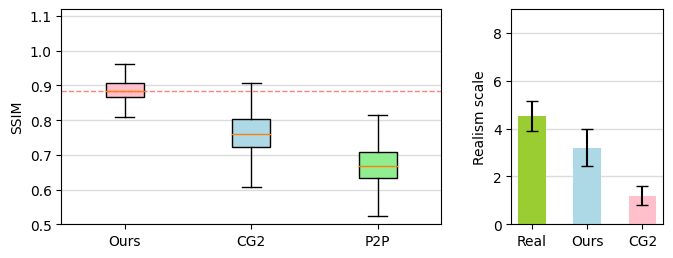

In [83]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(7,3), gridspec_kw={'width_ratios': [2.5, 1]})
fig.tight_layout(pad=2.0)

# rectangular box plot
bplot1 = ax1.boxplot(ssim,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=mylbs,
                     showfliers=False)  # will be used to label x-ticks
ax1.set_ylabel('SSIM')
ax1.grid(axis='y', color='gainsboro', linestyle='solid', linewidth=1)
ax1.set_axisbelow(True)
ax1.axhline(y=0.883, linewidth=1, linestyle='dashed', color='r', alpha=0.5)
ax1.set_ylim([0.5, 1.12])

fruits = ['Real', 'Ours', 'CG2']
counts = [4.53, 3.2, 1.2]
bar_colors = ['yellowgreen', 'lightblue', 'pink']
error = [0.64, 0.77, 0.41]
ax2.bar(fruits, counts, color=bar_colors, yerr=error, align='center', capsize=4, width=0.5, alpha=1)
ax2.set_ylabel('Realism scale')
ax2.grid(axis='y', color='gainsboro', linestyle='solid', linewidth=1)
ax2.set_axisbelow(True)
ax2.set_ylim([0, 9])

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
k = 0
for bplot in (bplot1, k):
    if k==1:
        break
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
    k += 1

# # adding horizontal grid lines
# for ax in [ax1]:
#     ax.yaxis.grid(True)
#     #ax.set_xlabel('Three separate samples')
#     ax.set_ylabel('SSIM')
#     ax.grid(axis='y', color='red', linestyle='dashed', linewidth=3)
#     ax.set_axisbelow(True)

plt.savefig("boxplot.pdf", bbox_inches="tight", pad_inches=0.02)
plt.show()

In [56]:
def min_max_scaler(x_data, new_min, new_max):
    data_min = np.min(x_data)
    data_max = np.max(x_data)
    data_std = (x_data - data_min) / (data_max - data_min)
    data_scaled = data_std * (new_max - new_min) + new_min
    return data_scaled

In [72]:
df = pd.DataFrame(data = np.concatenate(
    [
        min_max_scaler(myssim1, 2, 6).reshape(-1,1), 
        min_max_scaler(myssim2, 2, 6).reshape(-1,1),
        min_max_scaler(myssim3, 2, 6).reshape(-1,1),
    ], axis=1
), columns = ["myssim1", "myssim3", "myssim2"])
df

,myssim1,myssim3,myssim2
0,5.219376,4.803363,4.440885
1,5.197778,4.708560,4.487759
2,4.968068,4.636637,4.491568
3,5.042725,4.671905,4.506518
4,4.930018,4.710029,4.546471
...,...,...,...
4262,2.818370,4.809800,3.154761
4263,2.810923,4.836106,3.293846
4264,2.731959,4.895765,3.274332
4265,2.659540,4.919573,3.321738


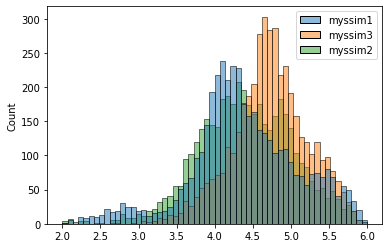

In [73]:
sns.histplot(df)

In [ ]:
np.min(myssim1), np.max(myssim1), np.min(myssim2), np.max(myssim2)

In [61]:
def chiSquare_test(data_experimental, data_theorical, alpha=0.05):
    """Function that execute the chi Square Test. In this case the theorical data is required to test the null hypothesis of 'experimental data follow the theorical data frequencies or distribution' and finally returns a boolean for the null hypothesis with the statistical value of the test. This methods is based in scipy chisquare method but its applied by hand.
    Args:
        data_experimental (Array): An 1D array of data containing the values to be tested.
        data_teorical (Array): An 1D array of data containing the expected values to be compared.
        alpha (Float): A decimal value meaning the significance level, default is 0.05 for 5%.
    """
    terms = ((data_experimental - data_theorical)**2 + 1e-8) / (data_theorical + 1e-8)
    statistic = np.sum(terms)
    p_value = stats.chi2.sf(statistic, data_theorical.shape[0] - 1)
    if p_value < alpha:
        return False, statistic, p_value
    else: 
        return True, statistic, p_value

In [27]:
stats.chisquare(myssim1, myssim2), stats.chisquare(myssim2, myssim1)

(Power_divergenceResult(statistic=338.365972804117, pvalue=1.0),
 Power_divergenceResult(statistic=241.63630026781016, pvalue=1.0))

In [28]:
stats.kstest(myssim1, myssim2), stats.kstest(myssim2, myssim1)

(KstestResult(statistic=0.980782751347551, pvalue=0.0),
 KstestResult(statistic=0.980782751347551, pvalue=0.0))

In [29]:
chiSquare_test(myssim1, myssim2), chiSquare_test(myssim2, myssim1)

((True, 338.3660317507095, 1.0), (True, 241.63634579438144, 1.0))

In [31]:
res = mannwhitneyu(myssim1, myssim2,)
res

MannwhitneyuResult(statistic=5524.0, pvalue=0.0)

In [32]:
stats.kruskal(myssim1, myssim2)

KruskalResult(statistic=6391.985836138967, pvalue=0.0)

In [18]:
stats.levene(myssim1, myssim2, center='mean'), stats.levene(myssim1, myssim2, center='median')

(LeveneResult(statistic=1031.3395163768184, pvalue=1.0047412162403752e-213),
 LeveneResult(statistic=1034.510341679099, pvalue=2.439386136980693e-214))

In [ ]:
np.histogram(myssim1, bins='auto')

In [ ]:
np.histogram(myssim2, bins='auto')

In [ ]:
ms1 = []
for i in myssim1:
    ms1.append(round(i,1))

In [ ]:
ms2 = []
for i in myssim2:
    ms2.append(round(i,2))

In [ ]:
res = mannwhitneyu(ms1, ms2)
res

In [ ]:
myssim1.shape, myssim2.shape

In [ ]:
from scipy.stats import mannwhitneyu
mann_u=mannwhitneyu([1,2,3,4],[5,6,7,8])
mann_u

In [77]:
s03 = [0.6689,0.5990375,0.529175,0.4593125,0.38945,0.3195875,0.249725,0.1798625,0.11]
s02 = [0.7611,0.6934625,0.625825,0.5581875,0.49055,0.4229125,0.355275,0.2876375,0.22]
s01 = [0.8855,0.8585625,0.831625,0.8046875,0.77775,0.7508125,0.723875,0.6969375,0.67]

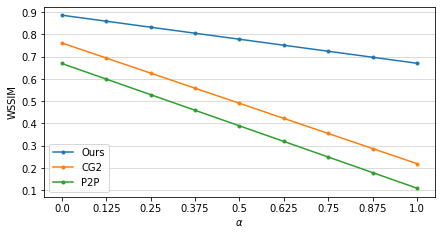

In [121]:
plt.figure(figsize=(7,3.5))
plt.plot(s01, marker=".", label="Ours")
plt.plot(s02, marker=".", label="CG2")
plt.plot(s03, marker=".", label="P2P")
plt.legend()
plt.xlabel(r'$\alpha$')
plt.ylabel('WSSIM')
plt.xticks(np.arange(8.1) ,np.arange(0,1.01,0.125))
plt.grid(axis='y', color='lightgray')
plt.savefig("wssim.pdf", bbox_inches="tight", pad_inches=0.02)
plt.show()

In [54]:
myssim1 = [4,5,3,4,4,4,5,5,4,5,5,5,5,5,5]
myssim1 = np.array(myssim1)
print(np.mean(myssim1))
print(myssim1.shape)

4.533333333333333
(15,)


In [53]:
myssim2 = [3,5,4,3,3,4,4,3,2,3,2,3,3,3,3]
myssim2 = np.array(myssim2)
print(np.mean(myssim2))
print(myssim2.shape)

3.2
(15,)


In [55]:
myssim3 = [1,1,1,2,1,1,1,1,2,2,1,1,1,1,1]
myssim3 = np.array(myssim3)
print(np.mean(myssim3))
print(myssim3.shape)

1.2
(15,)


In [57]:
df = pd.DataFrame(data = np.concatenate(
    [
        min_max_scaler(myssim1, 2, 6).reshape(-1,1), 
        min_max_scaler(myssim2, 2, 6).reshape(-1,1),
        min_max_scaler(myssim3, 2, 6).reshape(-1,1),
    ], axis=1
), columns = ["myssim1", "myssim3", "myssim2"])
df

,myssim1,myssim3,myssim2
0,4.0,3.333333,2.0
1,6.0,6.000000,2.0
2,2.0,4.666667,2.0
3,4.0,3.333333,6.0
4,4.0,3.333333,2.0
5,4.0,4.666667,2.0
6,6.0,4.666667,2.0
7,6.0,3.333333,2.0
8,4.0,2.000000,6.0
9,6.0,3.333333,6.0


<AxesSubplot: ylabel='Count'>

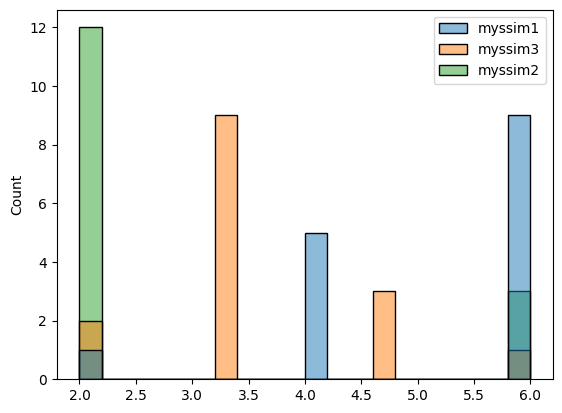

In [60]:
sns.histplot(df, bins=20)

In [64]:
chiSquare_test(myssim1, myssim2), chiSquare_test(myssim2, myssim1)

((True, 15.999999985750003, 0.3133742784066321),
 (True, 8.883333348080557, 0.838450815218132))

In [65]:
stats.kstest(myssim1, myssim2), stats.kstest(myssim2, myssim1)

(KstestResult(statistic=0.6666666666666666, pvalue=0.0018373939965002021, statistic_location=3, statistic_sign=-1),
 KstestResult(statistic=0.6666666666666666, pvalue=0.0018373939965002021, statistic_location=3, statistic_sign=1))

In [66]:
res = mannwhitneyu(myssim1, myssim2,)
res

MannwhitneyuResult(statistic=199.5, pvalue=0.00016594670849415228)

In [67]:
stats.kruskal(myssim1, myssim2)

KruskalResult(statistic=14.346470588235302, pvalue=0.00015206449081849475)

In [68]:
stats.levene(myssim1, myssim2, center='mean'), stats.levene(myssim1, myssim2, center='median')

(LeveneResult(statistic=1.0955628577552677e-30, pvalue=1.0),
 LeveneResult(statistic=0.0, pvalue=1.0))

In [69]:
chiSquare_test(myssim1, myssim3), chiSquare_test(myssim3, myssim1)

((False, 167.49999850250003, 2.189166818258897e-28),
 (False, 37.48333328604723, 0.0006230835470688924))

In [70]:
stats.kstest(myssim1, myssim3), stats.kstest(myssim3, myssim1)

(KstestResult(statistic=1.0, pvalue=1.2893450075787698e-08, statistic_location=2, statistic_sign=-1),
 KstestResult(statistic=1.0, pvalue=1.2893450075787698e-08, statistic_location=2, statistic_sign=1))

In [71]:
res = mannwhitneyu(myssim1, myssim3,)
res

MannwhitneyuResult(statistic=225.0, pvalue=1.0339021675000716e-06)

In [72]:
stats.kruskal(myssim1, myssim3)

KruskalResult(statistic=24.077490774907755, pvalue=9.25356754596904e-07)

In [73]:
stats.levene(myssim1, myssim3, center='mean'), stats.levene(myssim1, myssim3, center='median')

(LeveneResult(statistic=6.388732394366197, pvalue=0.017409509935313792),
 LeveneResult(statistic=1.8360655737704912, pvalue=0.18624485634058166))

In [74]:
chiSquare_test(myssim2, myssim3), chiSquare_test(myssim3, myssim2)

((False, 72.99999941000002, 5.496310678371282e-10),
 (True, 20.449999990391664, 0.11658028728995194))

In [75]:
stats.kstest(myssim2, myssim3), stats.kstest(myssim3, myssim2)

(KstestResult(statistic=0.8666666666666667, pvalue=5.608650782967649e-06, statistic_location=2, statistic_sign=-1),
 KstestResult(statistic=0.8666666666666667, pvalue=5.608650782967649e-06, statistic_location=2, statistic_sign=1))

In [76]:
res = mannwhitneyu(myssim2, myssim3,)
res

MannwhitneyuResult(statistic=222.0, pvalue=1.992106363435786e-06)

In [77]:
stats.kruskal(myssim2, myssim3)

KruskalResult(statistic=22.81047970479706, pvalue=1.787881366607946e-06)

In [79]:
stats.levene(myssim2, myssim3, center='mean'), stats.levene(myssim2, myssim3, center='median')

(LeveneResult(statistic=2.652631578947366, pvalue=0.11457992110337362),
 LeveneResult(statistic=1.8360655737704916, pvalue=0.18624485634058166))